In [1]:
model = "lstm"
card_type = "Diamonds"

In [2]:
# Parameters
card_type = "Hearts"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
all_cards = ['Spades','Diamonds','Hearts','Clubs']
n_outputs = 8
n_features = 8*4
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
def replace_with_dummies(df):
    df = pd.merge(dummies,df,left_on='index',right_on="Spades",how="right").drop(columns=["Spades"])
    df = pd.merge(dummies,df,left_on='index',right_on="Diamonds",how="right",suffixes=("_Diamonds","")).drop(columns=["Diamonds","index_Diamonds"])
    df = pd.merge(dummies,df,left_on='index',right_on="Hearts",how="right",suffixes=("_Hearts","")).drop(columns=["Hearts","index_Hearts"])
    return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])

    

In [7]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [8]:
test_chance = replace_with_dummies(test_chance)
train_chance = replace_with_dummies(train_chance)

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_75770/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'4', '5', '6', '0', '7', '2', '3', '1'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_75770/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'4', '5', '6', '0', '7', '2', '3', '1'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])


In [9]:
# make the samples ready to tsfresh
spades_test_chance = test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
29119,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,1
29120,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,1
29121,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,1
29122,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,1
29123,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,1


In [10]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:20,  3.61s/it]

Rolling:   5%|▌         | 2/40 [00:03<00:59,  1.57s/it]

Rolling:  15%|█▌        | 6/40 [00:05<00:21,  1.55it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:20,  1.64it/s]

Rolling:  20%|██        | 8/40 [00:06<00:17,  1.80it/s]

Rolling:  22%|██▎       | 9/40 [00:06<00:16,  1.94it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:14,  2.03it/s]

Rolling:  28%|██▊       | 11/40 [00:07<00:13,  2.10it/s]

Rolling:  30%|███       | 12/40 [00:07<00:13,  2.09it/s]

Rolling:  32%|███▎      | 13/40 [00:08<00:11,  2.45it/s]

Rolling:  35%|███▌      | 14/40 [00:08<00:11,  2.26it/s]

Rolling:  38%|███▊      | 15/40 [00:08<00:09,  2.58it/s]

Rolling:  40%|████      | 16/40 [00:09<00:08,  2.86it/s]

Rolling:  42%|████▎     | 17/40 [00:09<00:09,  2.37it/s]

Rolling:  45%|████▌     | 18/40 [00:09<00:08,  2.71it/s]

Rolling:  48%|████▊     | 19/40 [00:10<00:07,  2.97it/s]

Rolling:  50%|█████     | 20/40 [00:10<00:08,  2.27it/s]

Rolling:  52%|█████▎    | 21/40 [00:11<00:07,  2.61it/s]

Rolling:  55%|█████▌    | 22/40 [00:11<00:06,  2.88it/s]

Rolling:  57%|█████▊    | 23/40 [00:12<00:07,  2.14it/s]

Rolling:  60%|██████    | 24/40 [00:12<00:06,  2.51it/s]

Rolling:  62%|██████▎   | 25/40 [00:12<00:05,  2.82it/s]

Rolling:  65%|██████▌   | 26/40 [00:12<00:04,  3.08it/s]

Rolling:  68%|██████▊   | 27/40 [00:13<00:03,  3.31it/s]

Rolling:  70%|███████   | 28/40 [00:14<00:05,  2.10it/s]

Rolling:  72%|███████▎  | 29/40 [00:14<00:04,  2.44it/s]

Rolling:  75%|███████▌  | 30/40 [00:14<00:03,  2.74it/s]

Rolling:  78%|███████▊  | 31/40 [00:14<00:02,  3.05it/s]

Rolling:  80%|████████  | 32/40 [00:15<00:02,  3.24it/s]

Rolling:  82%|████████▎ | 33/40 [00:15<00:02,  3.44it/s]

Rolling:  85%|████████▌ | 34/40 [00:16<00:02,  2.04it/s]

Rolling:  88%|████████▊ | 35/40 [00:16<00:02,  2.41it/s]

Rolling:  90%|█████████ | 36/40 [00:16<00:01,  2.75it/s]

Rolling:  92%|█████████▎| 37/40 [00:16<00:00,  3.07it/s]

Rolling:  95%|█████████▌| 38/40 [00:17<00:00,  3.35it/s]

Rolling:  98%|█████████▊| 39/40 [00:17<00:00,  3.60it/s]

Rolling: 100%|██████████| 40/40 [00:17<00:00,  3.89it/s]

Rolling: 100%|██████████| 40/40 [00:17<00:00,  2.27it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:08<05:46,  8.89s/it]

Rolling:   5%|▌         | 2/40 [00:10<02:58,  4.71s/it]

Rolling:   8%|▊         | 3/40 [00:14<02:34,  4.18s/it]

Rolling:  10%|█         | 4/40 [00:15<01:54,  3.17s/it]

Rolling:  12%|█▎        | 5/40 [00:18<01:47,  3.07s/it]

Rolling:  15%|█▌        | 6/40 [00:20<01:27,  2.58s/it]

Rolling:  18%|█▊        | 7/40 [00:21<01:14,  2.27s/it]

Rolling:  20%|██        | 8/40 [00:24<01:20,  2.50s/it]

Rolling:  22%|██▎       | 9/40 [00:26<01:08,  2.22s/it]

Rolling:  25%|██▌       | 10/40 [00:28<01:00,  2.02s/it]

Rolling:  28%|██▊       | 11/40 [00:29<00:55,  1.91s/it]

Rolling:  30%|███       | 12/40 [00:31<00:51,  1.85s/it]

Rolling:  32%|███▎      | 13/40 [00:34<00:58,  2.18s/it]

Rolling:  35%|███▌      | 14/40 [00:35<00:48,  1.87s/it]

Rolling:  38%|███▊      | 15/40 [00:36<00:41,  1.68s/it]

Rolling:  40%|████      | 16/40 [00:38<00:36,  1.54s/it]

Rolling:  42%|████▎     | 17/40 [00:39<00:34,  1.49s/it]

Rolling:  45%|████▌     | 18/40 [00:43<00:47,  2.17s/it]

Rolling:  48%|████▊     | 19/40 [00:44<00:40,  1.91s/it]

Rolling:  50%|█████     | 20/40 [00:45<00:34,  1.72s/it]

Rolling:  52%|█████▎    | 21/40 [00:47<00:30,  1.61s/it]

Rolling:  55%|█████▌    | 22/40 [00:48<00:27,  1.53s/it]

Rolling:  57%|█████▊    | 23/40 [00:49<00:24,  1.47s/it]

Rolling:  60%|██████    | 24/40 [00:51<00:22,  1.42s/it]

Rolling:  62%|██████▎   | 25/40 [00:55<00:35,  2.37s/it]

Rolling:  65%|██████▌   | 26/40 [00:57<00:29,  2.07s/it]

Rolling:  68%|██████▊   | 27/40 [00:58<00:23,  1.84s/it]

Rolling:  70%|███████   | 28/40 [00:59<00:20,  1.73s/it]

Rolling:  72%|███████▎  | 29/40 [01:01<00:17,  1.58s/it]

Rolling:  75%|███████▌  | 30/40 [01:02<00:15,  1.57s/it]

Rolling:  78%|███████▊  | 31/40 [01:03<00:13,  1.50s/it]

Rolling:  80%|████████  | 32/40 [01:05<00:11,  1.48s/it]

Rolling:  82%|████████▎ | 33/40 [01:06<00:10,  1.49s/it]

Rolling:  85%|████████▌ | 34/40 [01:12<00:16,  2.78s/it]

Rolling:  88%|████████▊ | 35/40 [01:13<00:11,  2.33s/it]

Rolling:  90%|█████████ | 36/40 [01:15<00:07,  1.99s/it]

Rolling:  92%|█████████▎| 37/40 [01:16<00:05,  1.73s/it]

Rolling:  95%|█████████▌| 38/40 [01:17<00:03,  1.55s/it]

Rolling:  98%|█████████▊| 39/40 [01:18<00:01,  1.41s/it]

Rolling: 100%|██████████| 40/40 [01:19<00:00,  1.24s/it]

Rolling: 100%|██████████| 40/40 [01:19<00:00,  1.98s/it]

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
33509995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,"(1, 2017-12-07 00:00:00.035928)"
33509996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,"(1, 2017-12-07 00:00:00.035928)"


In [11]:
test_labeling_df = test_chance.drop(columns=["Date"])
train_labeling_df = train_chance.drop(columns=["Date"])

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,7_Diamonds,0,1,2,3,4,5,6,7,lottoryNumber
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35944
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,35945
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35946
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,35947
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35948


In [12]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date']).values

    return lottey_num_predicting,final_label,sample

In [13]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [14]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [15]:
test_y = pd.DataFrame(test_y[:-1])
last_sample = test_x[-1]

test_x = test_x[:-1]
train_y = pd.DataFrame(train_y)

In [16]:
test_x = np.stack(test_x)
train_x = np.stack(train_x)

In [17]:
test_x = test_x[:,:,:-1]
train_x = train_x[:,:,:-1]
test_y = test_y.iloc[:,:-1]
train_y = train_y.iloc[:,:-1]

In [18]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [19]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 32)
Train shape (27925, 1200, 32)


In [20]:
test_y.iloc[:,:8].shape

(8509, 8)

In [21]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()
print("==========================")
for layer in model.layers:
    print(layer.input_shape)

2022-08-14 23:24:07.550620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               53200     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 64,108


Trainable params: 64,108


Non-trainable params: 0


_________________________________________________________________


(None, 1200, 32)
(None, 100)
(None, 100)
(None, 100)


In [22]:
card_type_index = all_cards.index(card_type)
start_index = card_type_index*8
end_index = (card_type_index+1)*8

test_y = test_y.iloc[:,start_index:end_index]
train_y = train_y.iloc[:,start_index:end_index]

In [23]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any().any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any().any()

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
#  
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 26:39 - loss: 2.0898 - accuracy: 0.0625

  2/437 [..............................] - ETA: 5:41 - loss: 2.0905 - accuracy: 0.0938 

  3/437 [..............................] - ETA: 5:28 - loss: 2.0871 - accuracy: 0.1042

  4/437 [..............................] - ETA: 5:33 - loss: 2.0846 - accuracy: 0.1094

  5/437 [..............................] - ETA: 5:36 - loss: 2.0840 - accuracy: 0.1000

  6/437 [..............................] - ETA: 5:46 - loss: 2.0830 - accuracy: 0.1042

  7/437 [..............................] - ETA: 5:48 - loss: 2.0839 - accuracy: 0.1071

  8/437 [..............................] - ETA: 5:52 - loss: 2.0850 - accuracy: 0.1016

  9/437 [..............................] - ETA: 6:01 - loss: 2.0851 - accuracy: 0.1059

 10/437 [..............................] - ETA: 6:00 - loss: 2.0864 - accuracy: 0.1031

 11/437 [..............................] - ETA: 6:01 - loss: 2.0862 - accuracy: 0.1037

 12/437 [..............................] - ETA: 6:02 - loss: 2.0861 - accuracy: 0.1055

 13/437 [..............................] - ETA: 6:04 - loss: 2.0862 - accuracy: 0.1034

 14/437 [..............................] - ETA: 6:05 - loss: 2.0868 - accuracy: 0.1071

 15/437 [>.............................] - ETA: 6:06 - loss: 2.0860 - accuracy: 0.1073

 16/437 [>.............................] - ETA: 6:07 - loss: 2.0862 - accuracy: 0.1084

 17/437 [>.............................] - ETA: 6:08 - loss: 2.0853 - accuracy: 0.1149

 18/437 [>.............................] - ETA: 6:10 - loss: 2.0854 - accuracy: 0.1155

 19/437 [>.............................] - ETA: 6:15 - loss: 2.0854 - accuracy: 0.1160

 20/437 [>.............................] - ETA: 6:18 - loss: 2.0861 - accuracy: 0.1156

 21/437 [>.............................] - ETA: 6:25 - loss: 2.0852 - accuracy: 0.1198

 22/437 [>.............................] - ETA: 6:29 - loss: 2.0854 - accuracy: 0.1165

 23/437 [>.............................] - ETA: 6:31 - loss: 2.0851 - accuracy: 0.1175

 24/437 [>.............................] - ETA: 6:32 - loss: 2.0853 - accuracy: 0.1191

 25/437 [>.............................] - ETA: 6:33 - loss: 2.0848 - accuracy: 0.1200

 26/437 [>.............................] - ETA: 6:34 - loss: 2.0848 - accuracy: 0.1172

 27/437 [>.............................] - ETA: 6:39 - loss: 2.0846 - accuracy: 0.1169

 28/437 [>.............................] - ETA: 6:38 - loss: 2.0848 - accuracy: 0.1161

 29/437 [>.............................] - ETA: 6:37 - loss: 2.0844 - accuracy: 0.1158

 30/437 [=>............................] - ETA: 6:36 - loss: 2.0842 - accuracy: 0.1167

 31/437 [=>............................] - ETA: 6:35 - loss: 2.0843 - accuracy: 0.1164

 32/437 [=>............................] - ETA: 6:47 - loss: 2.0847 - accuracy: 0.1162

 33/437 [=>............................] - ETA: 6:58 - loss: 2.0847 - accuracy: 0.1155

 34/437 [=>............................] - ETA: 7:09 - loss: 2.0847 - accuracy: 0.1153

 35/437 [=>............................] - ETA: 7:06 - loss: 2.0845 - accuracy: 0.1174

 36/437 [=>............................] - ETA: 7:10 - loss: 2.0843 - accuracy: 0.1185

 37/437 [=>............................] - ETA: 7:07 - loss: 2.0839 - accuracy: 0.1191

 38/437 [=>............................] - ETA: 7:04 - loss: 2.0838 - accuracy: 0.1192

 39/437 [=>............................] - ETA: 7:00 - loss: 2.0838 - accuracy: 0.1186

 40/437 [=>............................] - ETA: 7:13 - loss: 2.0840 - accuracy: 0.1180

 41/437 [=>............................] - ETA: 7:09 - loss: 2.0841 - accuracy: 0.1170

 42/437 [=>............................] - ETA: 7:05 - loss: 2.0839 - accuracy: 0.1187

 43/437 [=>............................] - ETA: 7:01 - loss: 2.0836 - accuracy: 0.1192

 44/437 [==>...........................] - ETA: 6:57 - loss: 2.0839 - accuracy: 0.1190

 45/437 [==>...........................] - ETA: 6:53 - loss: 2.0841 - accuracy: 0.1184

 46/437 [==>...........................] - ETA: 6:50 - loss: 2.0842 - accuracy: 0.1175

 47/437 [==>...........................] - ETA: 6:48 - loss: 2.0845 - accuracy: 0.1174

 48/437 [==>...........................] - ETA: 6:45 - loss: 2.0844 - accuracy: 0.1188

 49/437 [==>...........................] - ETA: 6:41 - loss: 2.0843 - accuracy: 0.1189

 50/437 [==>...........................] - ETA: 6:38 - loss: 2.0842 - accuracy: 0.1200

 51/437 [==>...........................] - ETA: 6:34 - loss: 2.0841 - accuracy: 0.1207

 52/437 [==>...........................] - ETA: 6:32 - loss: 2.0840 - accuracy: 0.1223

 53/437 [==>...........................] - ETA: 6:28 - loss: 2.0840 - accuracy: 0.1229

 54/437 [==>...........................] - ETA: 6:25 - loss: 2.0839 - accuracy: 0.1236

 55/437 [==>...........................] - ETA: 6:23 - loss: 2.0839 - accuracy: 0.1233

 56/437 [==>...........................] - ETA: 6:21 - loss: 2.0837 - accuracy: 0.1233

 57/437 [==>...........................] - ETA: 6:26 - loss: 2.0838 - accuracy: 0.1228

 58/437 [==>...........................] - ETA: 6:25 - loss: 2.0839 - accuracy: 0.1231

 59/437 [===>..........................] - ETA: 6:22 - loss: 2.0838 - accuracy: 0.1239

 60/437 [===>..........................] - ETA: 6:19 - loss: 2.0837 - accuracy: 0.1247

 61/437 [===>..........................] - ETA: 6:16 - loss: 2.0836 - accuracy: 0.1240

 62/437 [===>..........................] - ETA: 6:13 - loss: 2.0836 - accuracy: 0.1242

 63/437 [===>..........................] - ETA: 6:13 - loss: 2.0836 - accuracy: 0.1245

 64/437 [===>..........................] - ETA: 6:12 - loss: 2.0835 - accuracy: 0.1255

 65/437 [===>..........................] - ETA: 6:09 - loss: 2.0835 - accuracy: 0.1257

 66/437 [===>..........................] - ETA: 6:06 - loss: 2.0834 - accuracy: 0.1264

 67/437 [===>..........................] - ETA: 6:03 - loss: 2.0833 - accuracy: 0.1269

 68/437 [===>..........................] - ETA: 6:02 - loss: 2.0831 - accuracy: 0.1278

 69/437 [===>..........................] - ETA: 5:59 - loss: 2.0834 - accuracy: 0.1277

 70/437 [===>..........................] - ETA: 5:57 - loss: 2.0833 - accuracy: 0.1275

 71/437 [===>..........................] - ETA: 5:56 - loss: 2.0831 - accuracy: 0.1272

 72/437 [===>..........................] - ETA: 5:54 - loss: 2.0832 - accuracy: 0.1276

 73/437 [====>.........................] - ETA: 5:51 - loss: 2.0830 - accuracy: 0.1282

 74/437 [====>.........................] - ETA: 5:49 - loss: 2.0830 - accuracy: 0.1282

 75/437 [====>.........................] - ETA: 5:47 - loss: 2.0831 - accuracy: 0.1273

 76/437 [====>.........................] - ETA: 5:45 - loss: 2.0830 - accuracy: 0.1279

 77/437 [====>.........................] - ETA: 5:43 - loss: 2.0828 - accuracy: 0.1282

 78/437 [====>.........................] - ETA: 5:41 - loss: 2.0830 - accuracy: 0.1276

 79/437 [====>.........................] - ETA: 5:42 - loss: 2.0829 - accuracy: 0.1278

 80/437 [====>.........................] - ETA: 5:40 - loss: 2.0830 - accuracy: 0.1273

 81/437 [====>.........................] - ETA: 5:38 - loss: 2.0832 - accuracy: 0.1269

 82/437 [====>.........................] - ETA: 5:36 - loss: 2.0833 - accuracy: 0.1267

 83/437 [====>.........................] - ETA: 5:37 - loss: 2.0833 - accuracy: 0.1263

 84/437 [====>.........................] - ETA: 5:35 - loss: 2.0831 - accuracy: 0.1272

 85/437 [====>.........................] - ETA: 5:34 - loss: 2.0832 - accuracy: 0.1274

 86/437 [====>.........................] - ETA: 5:32 - loss: 2.0829 - accuracy: 0.1288

 87/437 [====>.........................] - ETA: 5:31 - loss: 2.0827 - accuracy: 0.1288

 88/437 [=====>........................] - ETA: 5:29 - loss: 2.0828 - accuracy: 0.1294

 89/437 [=====>........................] - ETA: 5:27 - loss: 2.0829 - accuracy: 0.1290

 90/437 [=====>........................] - ETA: 5:26 - loss: 2.0829 - accuracy: 0.1288

 91/437 [=====>........................] - ETA: 5:24 - loss: 2.0829 - accuracy: 0.1283

 92/437 [=====>........................] - ETA: 5:23 - loss: 2.0827 - accuracy: 0.1287

 93/437 [=====>........................] - ETA: 5:21 - loss: 2.0826 - accuracy: 0.1287

 94/437 [=====>........................] - ETA: 5:20 - loss: 2.0823 - accuracy: 0.1293

 95/437 [=====>........................] - ETA: 5:20 - loss: 2.0825 - accuracy: 0.1288

 96/437 [=====>........................] - ETA: 5:18 - loss: 2.0825 - accuracy: 0.1284

 97/437 [=====>........................] - ETA: 5:18 - loss: 2.0824 - accuracy: 0.1285

 98/437 [=====>........................] - ETA: 5:16 - loss: 2.0823 - accuracy: 0.1282

 99/437 [=====>........................] - ETA: 5:15 - loss: 2.0824 - accuracy: 0.1282

100/437 [=====>........................] - ETA: 5:15 - loss: 2.0825 - accuracy: 0.1281

101/437 [=====>........................] - ETA: 5:14 - loss: 2.0825 - accuracy: 0.1276

102/437 [======>.......................] - ETA: 5:14 - loss: 2.0826 - accuracy: 0.1270

103/437 [======>.......................] - ETA: 5:12 - loss: 2.0828 - accuracy: 0.1267

104/437 [======>.......................] - ETA: 5:11 - loss: 2.0827 - accuracy: 0.1268

105/437 [======>.......................] - ETA: 5:09 - loss: 2.0827 - accuracy: 0.1265

106/437 [======>.......................] - ETA: 5:08 - loss: 2.0828 - accuracy: 0.1262

107/437 [======>.......................] - ETA: 5:07 - loss: 2.0828 - accuracy: 0.1260

108/437 [======>.......................] - ETA: 5:06 - loss: 2.0826 - accuracy: 0.1267

109/437 [======>.......................] - ETA: 5:05 - loss: 2.0828 - accuracy: 0.1270

110/437 [======>.......................] - ETA: 5:04 - loss: 2.0826 - accuracy: 0.1270

111/437 [======>.......................] - ETA: 5:02 - loss: 2.0827 - accuracy: 0.1267

112/437 [======>.......................] - ETA: 5:01 - loss: 2.0828 - accuracy: 0.1264

113/437 [======>.......................] - ETA: 5:00 - loss: 2.0827 - accuracy: 0.1262

114/437 [======>.......................] - ETA: 4:58 - loss: 2.0827 - accuracy: 0.1264

115/437 [======>.......................] - ETA: 5:00 - loss: 2.0827 - accuracy: 0.1266

116/437 [======>.......................] - ETA: 4:59 - loss: 2.0826 - accuracy: 0.1263

117/437 [=======>......................] - ETA: 4:57 - loss: 2.0828 - accuracy: 0.1258

118/437 [=======>......................] - ETA: 4:57 - loss: 2.0828 - accuracy: 0.1258

119/437 [=======>......................] - ETA: 4:56 - loss: 2.0828 - accuracy: 0.1261

120/437 [=======>......................] - ETA: 4:54 - loss: 2.0828 - accuracy: 0.1259

121/437 [=======>......................] - ETA: 4:53 - loss: 2.0827 - accuracy: 0.1256

122/437 [=======>......................] - ETA: 4:52 - loss: 2.0827 - accuracy: 0.1259

123/437 [=======>......................] - ETA: 4:53 - loss: 2.0827 - accuracy: 0.1267

124/437 [=======>......................] - ETA: 4:52 - loss: 2.0827 - accuracy: 0.1263

125/437 [=======>......................] - ETA: 4:52 - loss: 2.0828 - accuracy: 0.1259

126/437 [=======>......................] - ETA: 4:51 - loss: 2.0828 - accuracy: 0.1257

127/437 [=======>......................] - ETA: 4:51 - loss: 2.0828 - accuracy: 0.1262

128/437 [=======>......................] - ETA: 4:49 - loss: 2.0828 - accuracy: 0.1261

129/437 [=======>......................] - ETA: 4:48 - loss: 2.0828 - accuracy: 0.1261

130/437 [=======>......................] - ETA: 4:46 - loss: 2.0827 - accuracy: 0.1261

131/437 [=======>......................] - ETA: 4:44 - loss: 2.0827 - accuracy: 0.1263

132/437 [========>.....................] - ETA: 4:44 - loss: 2.0826 - accuracy: 0.1262

133/437 [========>.....................] - ETA: 4:43 - loss: 2.0826 - accuracy: 0.1262

134/437 [========>.....................] - ETA: 4:42 - loss: 2.0827 - accuracy: 0.1260

135/437 [========>.....................] - ETA: 4:41 - loss: 2.0827 - accuracy: 0.1258

136/437 [========>.....................] - ETA: 4:41 - loss: 2.0827 - accuracy: 0.1258

137/437 [========>.....................] - ETA: 4:40 - loss: 2.0827 - accuracy: 0.1258

138/437 [========>.....................] - ETA: 4:38 - loss: 2.0826 - accuracy: 0.1267

139/437 [========>.....................] - ETA: 4:38 - loss: 2.0825 - accuracy: 0.1272

140/437 [========>.....................] - ETA: 4:37 - loss: 2.0825 - accuracy: 0.1272

141/437 [========>.....................] - ETA: 4:36 - loss: 2.0825 - accuracy: 0.1269

142/437 [========>.....................] - ETA: 4:35 - loss: 2.0825 - accuracy: 0.1269

143/437 [========>.....................] - ETA: 4:34 - loss: 2.0825 - accuracy: 0.1267

144/437 [========>.....................] - ETA: 4:34 - loss: 2.0825 - accuracy: 0.1267

145/437 [========>.....................] - ETA: 4:32 - loss: 2.0825 - accuracy: 0.1265

146/437 [=========>....................] - ETA: 4:31 - loss: 2.0826 - accuracy: 0.1259

147/437 [=========>....................] - ETA: 4:30 - loss: 2.0825 - accuracy: 0.1260

148/437 [=========>....................] - ETA: 4:28 - loss: 2.0825 - accuracy: 0.1261

149/437 [=========>....................] - ETA: 4:27 - loss: 2.0826 - accuracy: 0.1260

150/437 [=========>....................] - ETA: 4:25 - loss: 2.0826 - accuracy: 0.1258

151/437 [=========>....................] - ETA: 4:24 - loss: 2.0825 - accuracy: 0.1260

152/437 [=========>....................] - ETA: 4:23 - loss: 2.0825 - accuracy: 0.1258

153/437 [=========>....................] - ETA: 4:22 - loss: 2.0824 - accuracy: 0.1260

154/437 [=========>....................] - ETA: 4:21 - loss: 2.0823 - accuracy: 0.1261

155/437 [=========>....................] - ETA: 4:19 - loss: 2.0824 - accuracy: 0.1262

156/437 [=========>....................] - ETA: 4:18 - loss: 2.0824 - accuracy: 0.1258

157/437 [=========>....................] - ETA: 4:17 - loss: 2.0824 - accuracy: 0.1258

158/437 [=========>....................] - ETA: 4:16 - loss: 2.0825 - accuracy: 0.1257

159/437 [=========>....................] - ETA: 4:15 - loss: 2.0825 - accuracy: 0.1254

160/437 [=========>....................] - ETA: 4:13 - loss: 2.0824 - accuracy: 0.1253

161/437 [==========>...................] - ETA: 4:12 - loss: 2.0825 - accuracy: 0.1248

162/437 [==========>...................] - ETA: 4:12 - loss: 2.0825 - accuracy: 0.1247

163/437 [==========>...................] - ETA: 4:10 - loss: 2.0824 - accuracy: 0.1246

164/437 [==========>...................] - ETA: 4:09 - loss: 2.0825 - accuracy: 0.1243

165/437 [==========>...................] - ETA: 4:08 - loss: 2.0825 - accuracy: 0.1245

166/437 [==========>...................] - ETA: 4:07 - loss: 2.0824 - accuracy: 0.1248

167/437 [==========>...................] - ETA: 4:06 - loss: 2.0823 - accuracy: 0.1245

168/437 [==========>...................] - ETA: 4:05 - loss: 2.0824 - accuracy: 0.1242

169/437 [==========>...................] - ETA: 4:04 - loss: 2.0823 - accuracy: 0.1243

170/437 [==========>...................] - ETA: 4:03 - loss: 2.0824 - accuracy: 0.1240

171/437 [==========>...................] - ETA: 4:02 - loss: 2.0824 - accuracy: 0.1243

172/437 [==========>...................] - ETA: 4:01 - loss: 2.0823 - accuracy: 0.1247

173/437 [==========>...................] - ETA: 4:00 - loss: 2.0822 - accuracy: 0.1248

174/437 [==========>...................] - ETA: 3:58 - loss: 2.0822 - accuracy: 0.1246

175/437 [===========>..................] - ETA: 3:57 - loss: 2.0822 - accuracy: 0.1250

176/437 [===========>..................] - ETA: 3:56 - loss: 2.0822 - accuracy: 0.1250

177/437 [===========>..................] - ETA: 3:55 - loss: 2.0822 - accuracy: 0.1249

178/437 [===========>..................] - ETA: 3:54 - loss: 2.0822 - accuracy: 0.1251

179/437 [===========>..................] - ETA: 3:53 - loss: 2.0823 - accuracy: 0.1247

180/437 [===========>..................] - ETA: 3:52 - loss: 2.0822 - accuracy: 0.1251

181/437 [===========>..................] - ETA: 3:51 - loss: 2.0822 - accuracy: 0.1250

182/437 [===========>..................] - ETA: 3:50 - loss: 2.0822 - accuracy: 0.1251

183/437 [===========>..................] - ETA: 3:49 - loss: 2.0821 - accuracy: 0.1254

184/437 [===========>..................] - ETA: 3:47 - loss: 2.0821 - accuracy: 0.1255

185/437 [===========>..................] - ETA: 3:46 - loss: 2.0820 - accuracy: 0.1254

186/437 [===========>..................] - ETA: 3:46 - loss: 2.0820 - accuracy: 0.1253

187/437 [===========>..................] - ETA: 3:44 - loss: 2.0818 - accuracy: 0.1258

188/437 [===========>..................] - ETA: 3:43 - loss: 2.0819 - accuracy: 0.1255

189/437 [===========>..................] - ETA: 3:42 - loss: 2.0818 - accuracy: 0.1257

190/437 [============>.................] - ETA: 3:41 - loss: 2.0818 - accuracy: 0.1257

191/437 [============>.................] - ETA: 3:40 - loss: 2.0818 - accuracy: 0.1253

192/437 [============>.................] - ETA: 3:39 - loss: 2.0818 - accuracy: 0.1252

193/437 [============>.................] - ETA: 3:38 - loss: 2.0818 - accuracy: 0.1253

194/437 [============>.................] - ETA: 3:37 - loss: 2.0817 - accuracy: 0.1256

195/437 [============>.................] - ETA: 3:36 - loss: 2.0818 - accuracy: 0.1253

196/437 [============>.................] - ETA: 3:35 - loss: 2.0817 - accuracy: 0.1251

197/437 [============>.................] - ETA: 3:34 - loss: 2.0818 - accuracy: 0.1251

198/437 [============>.................] - ETA: 3:33 - loss: 2.0819 - accuracy: 0.1249

199/437 [============>.................] - ETA: 3:31 - loss: 2.0819 - accuracy: 0.1253

200/437 [============>.................] - ETA: 3:30 - loss: 2.0819 - accuracy: 0.1252

201/437 [============>.................] - ETA: 3:30 - loss: 2.0818 - accuracy: 0.1252

202/437 [============>.................] - ETA: 3:29 - loss: 2.0818 - accuracy: 0.1254

203/437 [============>.................] - ETA: 3:28 - loss: 2.0818 - accuracy: 0.1255

204/437 [=============>................] - ETA: 3:27 - loss: 2.0818 - accuracy: 0.1256

205/437 [=============>................] - ETA: 3:26 - loss: 2.0819 - accuracy: 0.1255

206/437 [=============>................] - ETA: 3:25 - loss: 2.0819 - accuracy: 0.1253

207/437 [=============>................] - ETA: 3:24 - loss: 2.0819 - accuracy: 0.1250

208/437 [=============>................] - ETA: 3:23 - loss: 2.0819 - accuracy: 0.1248

209/437 [=============>................] - ETA: 3:22 - loss: 2.0819 - accuracy: 0.1251

210/437 [=============>................] - ETA: 3:21 - loss: 2.0819 - accuracy: 0.1251

211/437 [=============>................] - ETA: 3:20 - loss: 2.0820 - accuracy: 0.1250

212/437 [=============>................] - ETA: 3:19 - loss: 2.0819 - accuracy: 0.1252

213/437 [=============>................] - ETA: 3:18 - loss: 2.0820 - accuracy: 0.1251

214/437 [=============>................] - ETA: 3:17 - loss: 2.0819 - accuracy: 0.1252

215/437 [=============>................] - ETA: 3:16 - loss: 2.0819 - accuracy: 0.1252

216/437 [=============>................] - ETA: 3:15 - loss: 2.0820 - accuracy: 0.1249

217/437 [=============>................] - ETA: 3:14 - loss: 2.0819 - accuracy: 0.1251

218/437 [=============>................] - ETA: 3:13 - loss: 2.0819 - accuracy: 0.1250

219/437 [==============>...............] - ETA: 3:12 - loss: 2.0819 - accuracy: 0.1249

220/437 [==============>...............] - ETA: 3:12 - loss: 2.0819 - accuracy: 0.1249

221/437 [==============>...............] - ETA: 3:11 - loss: 2.0819 - accuracy: 0.1249

222/437 [==============>...............] - ETA: 3:10 - loss: 2.0819 - accuracy: 0.1249

223/437 [==============>...............] - ETA: 3:09 - loss: 2.0819 - accuracy: 0.1250

224/437 [==============>...............] - ETA: 3:08 - loss: 2.0819 - accuracy: 0.1250

225/437 [==============>...............] - ETA: 3:07 - loss: 2.0819 - accuracy: 0.1251

226/437 [==============>...............] - ETA: 3:06 - loss: 2.0819 - accuracy: 0.1252

227/437 [==============>...............] - ETA: 3:05 - loss: 2.0819 - accuracy: 0.1252

228/437 [==============>...............] - ETA: 3:05 - loss: 2.0819 - accuracy: 0.1251

229/437 [==============>...............] - ETA: 3:04 - loss: 2.0819 - accuracy: 0.1252

230/437 [==============>...............] - ETA: 3:03 - loss: 2.0819 - accuracy: 0.1249

231/437 [==============>...............] - ETA: 3:02 - loss: 2.0819 - accuracy: 0.1249

232/437 [==============>...............] - ETA: 3:01 - loss: 2.0820 - accuracy: 0.1247

233/437 [==============>...............] - ETA: 3:00 - loss: 2.0819 - accuracy: 0.1249

234/437 [===============>..............] - ETA: 2:59 - loss: 2.0819 - accuracy: 0.1249

235/437 [===============>..............] - ETA: 2:58 - loss: 2.0820 - accuracy: 0.1245

236/437 [===============>..............] - ETA: 2:57 - loss: 2.0820 - accuracy: 0.1245

237/437 [===============>..............] - ETA: 2:56 - loss: 2.0821 - accuracy: 0.1241

238/437 [===============>..............] - ETA: 2:55 - loss: 2.0821 - accuracy: 0.1241

239/437 [===============>..............] - ETA: 2:54 - loss: 2.0821 - accuracy: 0.1243

240/437 [===============>..............] - ETA: 2:53 - loss: 2.0821 - accuracy: 0.1242

241/437 [===============>..............] - ETA: 2:52 - loss: 2.0821 - accuracy: 0.1241

242/437 [===============>..............] - ETA: 2:51 - loss: 2.0820 - accuracy: 0.1243

243/437 [===============>..............] - ETA: 2:50 - loss: 2.0820 - accuracy: 0.1241

244/437 [===============>..............] - ETA: 2:49 - loss: 2.0820 - accuracy: 0.1241

245/437 [===============>..............] - ETA: 2:48 - loss: 2.0820 - accuracy: 0.1242

246/437 [===============>..............] - ETA: 2:47 - loss: 2.0820 - accuracy: 0.1242

247/437 [===============>..............] - ETA: 2:46 - loss: 2.0821 - accuracy: 0.1239

248/437 [================>.............] - ETA: 2:45 - loss: 2.0822 - accuracy: 0.1236

249/437 [================>.............] - ETA: 2:44 - loss: 2.0822 - accuracy: 0.1236

250/437 [================>.............] - ETA: 2:43 - loss: 2.0822 - accuracy: 0.1234

251/437 [================>.............] - ETA: 2:42 - loss: 2.0822 - accuracy: 0.1234

252/437 [================>.............] - ETA: 2:41 - loss: 2.0822 - accuracy: 0.1234

253/437 [================>.............] - ETA: 2:40 - loss: 2.0822 - accuracy: 0.1235

254/437 [================>.............] - ETA: 2:39 - loss: 2.0822 - accuracy: 0.1233

255/437 [================>.............] - ETA: 2:39 - loss: 2.0822 - accuracy: 0.1232

256/437 [================>.............] - ETA: 2:38 - loss: 2.0822 - accuracy: 0.1230

257/437 [================>.............] - ETA: 2:37 - loss: 2.0822 - accuracy: 0.1229

258/437 [================>.............] - ETA: 2:36 - loss: 2.0821 - accuracy: 0.1231

259/437 [================>.............] - ETA: 2:36 - loss: 2.0821 - accuracy: 0.1229

260/437 [================>.............] - ETA: 2:35 - loss: 2.0821 - accuracy: 0.1231

261/437 [================>.............] - ETA: 2:34 - loss: 2.0821 - accuracy: 0.1231

262/437 [================>.............] - ETA: 2:33 - loss: 2.0821 - accuracy: 0.1230

263/437 [=================>............] - ETA: 2:32 - loss: 2.0821 - accuracy: 0.1231

264/437 [=================>............] - ETA: 2:31 - loss: 2.0821 - accuracy: 0.1231

265/437 [=================>............] - ETA: 2:30 - loss: 2.0821 - accuracy: 0.1228

266/437 [=================>............] - ETA: 2:29 - loss: 2.0821 - accuracy: 0.1227

267/437 [=================>............] - ETA: 2:28 - loss: 2.0821 - accuracy: 0.1225

268/437 [=================>............] - ETA: 2:27 - loss: 2.0820 - accuracy: 0.1226

269/437 [=================>............] - ETA: 2:26 - loss: 2.0820 - accuracy: 0.1226

270/437 [=================>............] - ETA: 2:26 - loss: 2.0820 - accuracy: 0.1226

271/437 [=================>............] - ETA: 2:25 - loss: 2.0821 - accuracy: 0.1223

272/437 [=================>............] - ETA: 2:24 - loss: 2.0821 - accuracy: 0.1222

273/437 [=================>............] - ETA: 2:23 - loss: 2.0821 - accuracy: 0.1223

274/437 [=================>............] - ETA: 2:22 - loss: 2.0821 - accuracy: 0.1224

275/437 [=================>............] - ETA: 2:21 - loss: 2.0820 - accuracy: 0.1226

276/437 [=================>............] - ETA: 2:20 - loss: 2.0821 - accuracy: 0.1226

277/437 [==================>...........] - ETA: 2:20 - loss: 2.0821 - accuracy: 0.1226

278/437 [==================>...........] - ETA: 2:19 - loss: 2.0820 - accuracy: 0.1225

279/437 [==================>...........] - ETA: 2:18 - loss: 2.0821 - accuracy: 0.1224

280/437 [==================>...........] - ETA: 2:17 - loss: 2.0821 - accuracy: 0.1222

281/437 [==================>...........] - ETA: 2:16 - loss: 2.0820 - accuracy: 0.1222

282/437 [==================>...........] - ETA: 2:15 - loss: 2.0820 - accuracy: 0.1224

283/437 [==================>...........] - ETA: 2:14 - loss: 2.0820 - accuracy: 0.1223

284/437 [==================>...........] - ETA: 2:13 - loss: 2.0820 - accuracy: 0.1225

285/437 [==================>...........] - ETA: 2:12 - loss: 2.0820 - accuracy: 0.1225

286/437 [==================>...........] - ETA: 2:11 - loss: 2.0820 - accuracy: 0.1224

287/437 [==================>...........] - ETA: 2:10 - loss: 2.0820 - accuracy: 0.1222

288/437 [==================>...........] - ETA: 2:09 - loss: 2.0821 - accuracy: 0.1221

289/437 [==================>...........] - ETA: 2:09 - loss: 2.0821 - accuracy: 0.1219

290/437 [==================>...........] - ETA: 2:08 - loss: 2.0821 - accuracy: 0.1216

291/437 [==================>...........] - ETA: 2:07 - loss: 2.0821 - accuracy: 0.1215

292/437 [===================>..........] - ETA: 2:06 - loss: 2.0821 - accuracy: 0.1215

293/437 [===================>..........] - ETA: 2:05 - loss: 2.0821 - accuracy: 0.1215

294/437 [===================>..........] - ETA: 2:04 - loss: 2.0821 - accuracy: 0.1216

295/437 [===================>..........] - ETA: 2:03 - loss: 2.0821 - accuracy: 0.1216

296/437 [===================>..........] - ETA: 2:02 - loss: 2.0821 - accuracy: 0.1217

297/437 [===================>..........] - ETA: 2:01 - loss: 2.0821 - accuracy: 0.1218

298/437 [===================>..........] - ETA: 2:00 - loss: 2.0821 - accuracy: 0.1219

299/437 [===================>..........] - ETA: 1:59 - loss: 2.0821 - accuracy: 0.1218

300/437 [===================>..........] - ETA: 1:59 - loss: 2.0821 - accuracy: 0.1218

301/437 [===================>..........] - ETA: 1:58 - loss: 2.0821 - accuracy: 0.1219

302/437 [===================>..........] - ETA: 1:57 - loss: 2.0820 - accuracy: 0.1221

303/437 [===================>..........] - ETA: 1:56 - loss: 2.0820 - accuracy: 0.1219

304/437 [===================>..........] - ETA: 1:55 - loss: 2.0820 - accuracy: 0.1219

305/437 [===================>..........] - ETA: 1:54 - loss: 2.0820 - accuracy: 0.1219

306/437 [====================>.........] - ETA: 1:53 - loss: 2.0820 - accuracy: 0.1220

307/437 [====================>.........] - ETA: 1:52 - loss: 2.0820 - accuracy: 0.1221

308/437 [====================>.........] - ETA: 1:52 - loss: 2.0820 - accuracy: 0.1222

309/437 [====================>.........] - ETA: 1:51 - loss: 2.0820 - accuracy: 0.1223

310/437 [====================>.........] - ETA: 1:50 - loss: 2.0820 - accuracy: 0.1222

311/437 [====================>.........] - ETA: 1:49 - loss: 2.0820 - accuracy: 0.1221

312/437 [====================>.........] - ETA: 1:48 - loss: 2.0820 - accuracy: 0.1221

313/437 [====================>.........] - ETA: 1:47 - loss: 2.0820 - accuracy: 0.1220

314/437 [====================>.........] - ETA: 1:46 - loss: 2.0820 - accuracy: 0.1222

315/437 [====================>.........] - ETA: 1:45 - loss: 2.0820 - accuracy: 0.1220

316/437 [====================>.........] - ETA: 1:45 - loss: 2.0820 - accuracy: 0.1220

317/437 [====================>.........] - ETA: 1:44 - loss: 2.0820 - accuracy: 0.1222

318/437 [====================>.........] - ETA: 1:43 - loss: 2.0820 - accuracy: 0.1225

319/437 [====================>.........] - ETA: 1:42 - loss: 2.0819 - accuracy: 0.1226

320/437 [====================>.........] - ETA: 1:41 - loss: 2.0819 - accuracy: 0.1225

321/437 [=====================>........] - ETA: 1:40 - loss: 2.0819 - accuracy: 0.1224

322/437 [=====================>........] - ETA: 1:39 - loss: 2.0819 - accuracy: 0.1226

323/437 [=====================>........] - ETA: 1:38 - loss: 2.0819 - accuracy: 0.1227

324/437 [=====================>........] - ETA: 1:37 - loss: 2.0819 - accuracy: 0.1227

325/437 [=====================>........] - ETA: 1:37 - loss: 2.0820 - accuracy: 0.1226

326/437 [=====================>........] - ETA: 1:36 - loss: 2.0820 - accuracy: 0.1227

327/437 [=====================>........] - ETA: 1:35 - loss: 2.0820 - accuracy: 0.1227

328/437 [=====================>........] - ETA: 1:34 - loss: 2.0820 - accuracy: 0.1227

329/437 [=====================>........] - ETA: 1:33 - loss: 2.0820 - accuracy: 0.1227

330/437 [=====================>........] - ETA: 1:33 - loss: 2.0820 - accuracy: 0.1227

331/437 [=====================>........] - ETA: 1:32 - loss: 2.0820 - accuracy: 0.1225

332/437 [=====================>........] - ETA: 1:31 - loss: 2.0821 - accuracy: 0.1224

333/437 [=====================>........] - ETA: 1:30 - loss: 2.0821 - accuracy: 0.1224

334/437 [=====================>........] - ETA: 1:29 - loss: 2.0821 - accuracy: 0.1223

335/437 [=====================>........] - ETA: 1:28 - loss: 2.0821 - accuracy: 0.1221

336/437 [======================>.......] - ETA: 1:28 - loss: 2.0821 - accuracy: 0.1221

337/437 [======================>.......] - ETA: 1:27 - loss: 2.0821 - accuracy: 0.1221

338/437 [======================>.......] - ETA: 1:26 - loss: 2.0821 - accuracy: 0.1220

339/437 [======================>.......] - ETA: 1:25 - loss: 2.0821 - accuracy: 0.1222

340/437 [======================>.......] - ETA: 1:24 - loss: 2.0821 - accuracy: 0.1221

341/437 [======================>.......] - ETA: 1:23 - loss: 2.0820 - accuracy: 0.1223

342/437 [======================>.......] - ETA: 1:22 - loss: 2.0820 - accuracy: 0.1222

343/437 [======================>.......] - ETA: 1:21 - loss: 2.0820 - accuracy: 0.1223

344/437 [======================>.......] - ETA: 1:20 - loss: 2.0820 - accuracy: 0.1224

345/437 [======================>.......] - ETA: 1:20 - loss: 2.0820 - accuracy: 0.1224

346/437 [======================>.......] - ETA: 1:19 - loss: 2.0820 - accuracy: 0.1225

347/437 [======================>.......] - ETA: 1:18 - loss: 2.0819 - accuracy: 0.1225

348/437 [======================>.......] - ETA: 1:17 - loss: 2.0820 - accuracy: 0.1224

349/437 [======================>.......] - ETA: 1:16 - loss: 2.0820 - accuracy: 0.1223

350/437 [=======================>......] - ETA: 1:15 - loss: 2.0820 - accuracy: 0.1224

351/437 [=======================>......] - ETA: 1:14 - loss: 2.0820 - accuracy: 0.1223

352/437 [=======================>......] - ETA: 1:13 - loss: 2.0820 - accuracy: 0.1224

353/437 [=======================>......] - ETA: 1:13 - loss: 2.0819 - accuracy: 0.1224

354/437 [=======================>......] - ETA: 1:12 - loss: 2.0819 - accuracy: 0.1225

355/437 [=======================>......] - ETA: 1:11 - loss: 2.0819 - accuracy: 0.1227

356/437 [=======================>......] - ETA: 1:10 - loss: 2.0819 - accuracy: 0.1228

357/437 [=======================>......] - ETA: 1:09 - loss: 2.0819 - accuracy: 0.1230

358/437 [=======================>......] - ETA: 1:08 - loss: 2.0818 - accuracy: 0.1231

359/437 [=======================>......] - ETA: 1:07 - loss: 2.0818 - accuracy: 0.1231

360/437 [=======================>......] - ETA: 1:06 - loss: 2.0818 - accuracy: 0.1232

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0818 - accuracy: 0.1232

362/437 [=======================>......] - ETA: 1:05 - loss: 2.0818 - accuracy: 0.1232

363/437 [=======================>......] - ETA: 1:04 - loss: 2.0818 - accuracy: 0.1233

364/437 [=======================>......] - ETA: 1:03 - loss: 2.0818 - accuracy: 0.1233

365/437 [========================>.....] - ETA: 1:02 - loss: 2.0817 - accuracy: 0.1233

366/437 [========================>.....] - ETA: 1:01 - loss: 2.0817 - accuracy: 0.1232

367/437 [========================>.....] - ETA: 1:00 - loss: 2.0817 - accuracy: 0.1234

368/437 [========================>.....] - ETA: 59s - loss: 2.0817 - accuracy: 0.1233 

369/437 [========================>.....] - ETA: 58s - loss: 2.0817 - accuracy: 0.1233

370/437 [========================>.....] - ETA: 57s - loss: 2.0817 - accuracy: 0.1235

371/437 [========================>.....] - ETA: 57s - loss: 2.0817 - accuracy: 0.1235

372/437 [========================>.....] - ETA: 56s - loss: 2.0817 - accuracy: 0.1237

373/437 [========================>.....] - ETA: 55s - loss: 2.0817 - accuracy: 0.1238

374/437 [========================>.....] - ETA: 54s - loss: 2.0817 - accuracy: 0.1237

375/437 [========================>.....] - ETA: 53s - loss: 2.0817 - accuracy: 0.1236

376/437 [========================>.....] - ETA: 52s - loss: 2.0817 - accuracy: 0.1236

377/437 [========================>.....] - ETA: 51s - loss: 2.0817 - accuracy: 0.1234

378/437 [========================>.....] - ETA: 51s - loss: 2.0817 - accuracy: 0.1236

379/437 [=========================>....] - ETA: 50s - loss: 2.0817 - accuracy: 0.1238

380/437 [=========================>....] - ETA: 49s - loss: 2.0817 - accuracy: 0.1239

381/437 [=========================>....] - ETA: 48s - loss: 2.0817 - accuracy: 0.1239

382/437 [=========================>....] - ETA: 47s - loss: 2.0816 - accuracy: 0.1240

383/437 [=========================>....] - ETA: 46s - loss: 2.0817 - accuracy: 0.1240

384/437 [=========================>....] - ETA: 45s - loss: 2.0817 - accuracy: 0.1242

385/437 [=========================>....] - ETA: 45s - loss: 2.0817 - accuracy: 0.1241

386/437 [=========================>....] - ETA: 44s - loss: 2.0816 - accuracy: 0.1243

387/437 [=========================>....] - ETA: 43s - loss: 2.0816 - accuracy: 0.1244

388/437 [=========================>....] - ETA: 42s - loss: 2.0816 - accuracy: 0.1244

389/437 [=========================>....] - ETA: 41s - loss: 2.0816 - accuracy: 0.1244

390/437 [=========================>....] - ETA: 40s - loss: 2.0816 - accuracy: 0.1246

391/437 [=========================>....] - ETA: 39s - loss: 2.0816 - accuracy: 0.1248

392/437 [=========================>....] - ETA: 38s - loss: 2.0816 - accuracy: 0.1247

393/437 [=========================>....] - ETA: 38s - loss: 2.0816 - accuracy: 0.1245

394/437 [==========================>...] - ETA: 37s - loss: 2.0816 - accuracy: 0.1246

395/437 [==========================>...] - ETA: 36s - loss: 2.0816 - accuracy: 0.1247

396/437 [==========================>...] - ETA: 35s - loss: 2.0816 - accuracy: 0.1247

397/437 [==========================>...] - ETA: 34s - loss: 2.0816 - accuracy: 0.1246

398/437 [==========================>...] - ETA: 33s - loss: 2.0816 - accuracy: 0.1247

399/437 [==========================>...] - ETA: 32s - loss: 2.0816 - accuracy: 0.1247

400/437 [==========================>...] - ETA: 31s - loss: 2.0816 - accuracy: 0.1246

401/437 [==========================>...] - ETA: 31s - loss: 2.0817 - accuracy: 0.1246

402/437 [==========================>...] - ETA: 30s - loss: 2.0817 - accuracy: 0.1246

403/437 [==========================>...] - ETA: 29s - loss: 2.0817 - accuracy: 0.1246

404/437 [==========================>...] - ETA: 28s - loss: 2.0817 - accuracy: 0.1246

405/437 [==========================>...] - ETA: 27s - loss: 2.0817 - accuracy: 0.1247

406/437 [==========================>...] - ETA: 26s - loss: 2.0816 - accuracy: 0.1247

407/437 [==========================>...] - ETA: 26s - loss: 2.0817 - accuracy: 0.1247

408/437 [===========================>..] - ETA: 25s - loss: 2.0817 - accuracy: 0.1246

409/437 [===========================>..] - ETA: 24s - loss: 2.0817 - accuracy: 0.1246

410/437 [===========================>..] - ETA: 23s - loss: 2.0817 - accuracy: 0.1244

411/437 [===========================>..] - ETA: 22s - loss: 2.0817 - accuracy: 0.1243

412/437 [===========================>..] - ETA: 21s - loss: 2.0817 - accuracy: 0.1241

413/437 [===========================>..] - ETA: 20s - loss: 2.0817 - accuracy: 0.1242

414/437 [===========================>..] - ETA: 19s - loss: 2.0817 - accuracy: 0.1241

415/437 [===========================>..] - ETA: 19s - loss: 2.0817 - accuracy: 0.1241

416/437 [===========================>..] - ETA: 18s - loss: 2.0817 - accuracy: 0.1241

417/437 [===========================>..] - ETA: 17s - loss: 2.0817 - accuracy: 0.1241

418/437 [===========================>..] - ETA: 16s - loss: 2.0818 - accuracy: 0.1239

419/437 [===========================>..] - ETA: 15s - loss: 2.0818 - accuracy: 0.1239

420/437 [===========================>..] - ETA: 14s - loss: 2.0818 - accuracy: 0.1238

421/437 [===========================>..] - ETA: 13s - loss: 2.0818 - accuracy: 0.1237

422/437 [===========================>..] - ETA: 13s - loss: 2.0818 - accuracy: 0.1237

423/437 [============================>.] - ETA: 12s - loss: 2.0818 - accuracy: 0.1236

424/437 [============================>.] - ETA: 11s - loss: 2.0818 - accuracy: 0.1237

425/437 [============================>.] - ETA: 10s - loss: 2.0818 - accuracy: 0.1237

426/437 [============================>.] - ETA: 9s - loss: 2.0818 - accuracy: 0.1236 

427/437 [============================>.] - ETA: 8s - loss: 2.0818 - accuracy: 0.1238

428/437 [============================>.] - ETA: 7s - loss: 2.0818 - accuracy: 0.1238

429/437 [============================>.] - ETA: 6s - loss: 2.0818 - accuracy: 0.1237

430/437 [============================>.] - ETA: 6s - loss: 2.0818 - accuracy: 0.1238

431/437 [============================>.] - ETA: 5s - loss: 2.0818 - accuracy: 0.1237

432/437 [============================>.] - ETA: 4s - loss: 2.0818 - accuracy: 0.1236

433/437 [============================>.] - ETA: 3s - loss: 2.0818 - accuracy: 0.1236

434/437 [============================>.] - ETA: 2s - loss: 2.0818 - accuracy: 0.1236

435/437 [============================>.] - ETA: 1s - loss: 2.0818 - accuracy: 0.1236

436/437 [============================>.] - ETA: 0s - loss: 2.0818 - accuracy: 0.1237

437/437 [==============================] - ETA: 0s - loss: 2.0818 - accuracy: 0.1237

437/437 [==============================] - 424s 963ms/step - loss: 2.0818 - accuracy: 0.1237 - val_loss: 2.0803 - val_accuracy: 0.1275


Epoch 2/300


  1/437 [..............................] - ETA: 5:59 - loss: 2.0813 - accuracy: 0.1406

  2/437 [..............................] - ETA: 5:34 - loss: 2.0814 - accuracy: 0.1484

  3/437 [..............................] - ETA: 5:39 - loss: 2.0818 - accuracy: 0.1406

  4/437 [..............................] - ETA: 6:38 - loss: 2.0816 - accuracy: 0.1367

  5/437 [..............................] - ETA: 6:22 - loss: 2.0791 - accuracy: 0.1281

  6/437 [..............................] - ETA: 6:11 - loss: 2.0789 - accuracy: 0.1224

  7/437 [..............................] - ETA: 6:04 - loss: 2.0790 - accuracy: 0.1250

  8/437 [..............................] - ETA: 7:11 - loss: 2.0787 - accuracy: 0.1270

  9/437 [..............................] - ETA: 6:59 - loss: 2.0784 - accuracy: 0.1372

 10/437 [..............................] - ETA: 6:48 - loss: 2.0779 - accuracy: 0.1453

 11/437 [..............................] - ETA: 6:46 - loss: 2.0785 - accuracy: 0.1463

 12/437 [..............................] - ETA: 6:37 - loss: 2.0793 - accuracy: 0.1419

 13/437 [..............................] - ETA: 6:31 - loss: 2.0799 - accuracy: 0.1430

 14/437 [..............................] - ETA: 6:25 - loss: 2.0795 - accuracy: 0.1429

 15/437 [>.............................] - ETA: 6:19 - loss: 2.0796 - accuracy: 0.1417

 16/437 [>.............................] - ETA: 6:14 - loss: 2.0800 - accuracy: 0.1406

 17/437 [>.............................] - ETA: 6:16 - loss: 2.0803 - accuracy: 0.1379

 18/437 [>.............................] - ETA: 6:11 - loss: 2.0810 - accuracy: 0.1363

 19/437 [>.............................] - ETA: 6:13 - loss: 2.0812 - accuracy: 0.1349

 20/437 [>.............................] - ETA: 6:11 - loss: 2.0817 - accuracy: 0.1320

 21/437 [>.............................] - ETA: 6:08 - loss: 2.0813 - accuracy: 0.1339

 22/437 [>.............................] - ETA: 6:04 - loss: 2.0810 - accuracy: 0.1371

 23/437 [>.............................] - ETA: 6:00 - loss: 2.0809 - accuracy: 0.1379

 24/437 [>.............................] - ETA: 5:57 - loss: 2.0809 - accuracy: 0.1341

 25/437 [>.............................] - ETA: 6:01 - loss: 2.0804 - accuracy: 0.1381

 26/437 [>.............................] - ETA: 5:58 - loss: 2.0801 - accuracy: 0.1400

 27/437 [>.............................] - ETA: 6:04 - loss: 2.0803 - accuracy: 0.1406

 28/437 [>.............................] - ETA: 6:01 - loss: 2.0800 - accuracy: 0.1412

 29/437 [>.............................] - ETA: 5:57 - loss: 2.0798 - accuracy: 0.1412

 30/437 [=>............................] - ETA: 5:58 - loss: 2.0799 - accuracy: 0.1411

 31/437 [=>............................] - ETA: 5:55 - loss: 2.0797 - accuracy: 0.1431

 32/437 [=>............................] - ETA: 5:53 - loss: 2.0795 - accuracy: 0.1426

 33/437 [=>............................] - ETA: 5:52 - loss: 2.0795 - accuracy: 0.1416

 34/437 [=>............................] - ETA: 5:54 - loss: 2.0796 - accuracy: 0.1406

 35/437 [=>............................] - ETA: 5:51 - loss: 2.0794 - accuracy: 0.1388

 36/437 [=>............................] - ETA: 5:49 - loss: 2.0795 - accuracy: 0.1398

 37/437 [=>............................] - ETA: 5:49 - loss: 2.0794 - accuracy: 0.1389

 38/437 [=>............................] - ETA: 5:49 - loss: 2.0796 - accuracy: 0.1386

 39/437 [=>............................] - ETA: 5:47 - loss: 2.0795 - accuracy: 0.1394

 40/437 [=>............................] - ETA: 5:44 - loss: 2.0793 - accuracy: 0.1430

 41/437 [=>............................] - ETA: 5:42 - loss: 2.0792 - accuracy: 0.1421

 42/437 [=>............................] - ETA: 5:43 - loss: 2.0792 - accuracy: 0.1429

 43/437 [=>............................] - ETA: 5:40 - loss: 2.0792 - accuracy: 0.1421

 44/437 [==>...........................] - ETA: 5:38 - loss: 2.0792 - accuracy: 0.1417

 45/437 [==>...........................] - ETA: 5:36 - loss: 2.0793 - accuracy: 0.1413

 46/437 [==>...........................] - ETA: 5:34 - loss: 2.0797 - accuracy: 0.1399

 47/437 [==>...........................] - ETA: 5:32 - loss: 2.0800 - accuracy: 0.1390

 48/437 [==>...........................] - ETA: 5:33 - loss: 2.0799 - accuracy: 0.1387

 49/437 [==>...........................] - ETA: 5:37 - loss: 2.0798 - accuracy: 0.1393

 50/437 [==>...........................] - ETA: 5:40 - loss: 2.0799 - accuracy: 0.1403

 51/437 [==>...........................] - ETA: 5:39 - loss: 2.0800 - accuracy: 0.1391

 52/437 [==>...........................] - ETA: 5:39 - loss: 2.0798 - accuracy: 0.1397

 53/437 [==>...........................] - ETA: 5:37 - loss: 2.0800 - accuracy: 0.1389

 54/437 [==>...........................] - ETA: 5:39 - loss: 2.0801 - accuracy: 0.1383

 55/437 [==>...........................] - ETA: 5:38 - loss: 2.0801 - accuracy: 0.1378

 56/437 [==>...........................] - ETA: 5:36 - loss: 2.0803 - accuracy: 0.1370

 57/437 [==>...........................] - ETA: 5:36 - loss: 2.0803 - accuracy: 0.1368

 58/437 [==>...........................] - ETA: 5:35 - loss: 2.0801 - accuracy: 0.1374

 59/437 [===>..........................] - ETA: 5:33 - loss: 2.0801 - accuracy: 0.1374

 60/437 [===>..........................] - ETA: 5:31 - loss: 2.0800 - accuracy: 0.1378

 61/437 [===>..........................] - ETA: 5:29 - loss: 2.0798 - accuracy: 0.1386

 62/437 [===>..........................] - ETA: 5:27 - loss: 2.0798 - accuracy: 0.1389

 63/437 [===>..........................] - ETA: 5:30 - loss: 2.0797 - accuracy: 0.1396

 64/437 [===>..........................] - ETA: 5:29 - loss: 2.0796 - accuracy: 0.1406

 65/437 [===>..........................] - ETA: 5:27 - loss: 2.0796 - accuracy: 0.1399

 66/437 [===>..........................] - ETA: 5:26 - loss: 2.0794 - accuracy: 0.1406

 67/437 [===>..........................] - ETA: 5:25 - loss: 2.0793 - accuracy: 0.1416

 68/437 [===>..........................] - ETA: 5:24 - loss: 2.0792 - accuracy: 0.1427

 69/437 [===>..........................] - ETA: 5:22 - loss: 2.0793 - accuracy: 0.1431

 70/437 [===>..........................] - ETA: 5:21 - loss: 2.0793 - accuracy: 0.1433

 71/437 [===>..........................] - ETA: 5:20 - loss: 2.0792 - accuracy: 0.1433

 72/437 [===>..........................] - ETA: 5:18 - loss: 2.0791 - accuracy: 0.1428

 73/437 [====>.........................] - ETA: 5:17 - loss: 2.0791 - accuracy: 0.1423

 74/437 [====>.........................] - ETA: 5:15 - loss: 2.0792 - accuracy: 0.1425

 75/437 [====>.........................] - ETA: 5:14 - loss: 2.0792 - accuracy: 0.1419

 76/437 [====>.........................] - ETA: 5:13 - loss: 2.0792 - accuracy: 0.1412

 77/437 [====>.........................] - ETA: 5:11 - loss: 2.0791 - accuracy: 0.1427

 78/437 [====>.........................] - ETA: 5:10 - loss: 2.0791 - accuracy: 0.1422

 79/437 [====>.........................] - ETA: 5:09 - loss: 2.0790 - accuracy: 0.1428

 80/437 [====>.........................] - ETA: 5:07 - loss: 2.0792 - accuracy: 0.1418

 81/437 [====>.........................] - ETA: 5:06 - loss: 2.0794 - accuracy: 0.1410

 82/437 [====>.........................] - ETA: 5:08 - loss: 2.0794 - accuracy: 0.1408

 83/437 [====>.........................] - ETA: 5:07 - loss: 2.0793 - accuracy: 0.1418

 84/437 [====>.........................] - ETA: 5:06 - loss: 2.0793 - accuracy: 0.1412

 85/437 [====>.........................] - ETA: 5:05 - loss: 2.0793 - accuracy: 0.1419

 86/437 [====>.........................] - ETA: 5:04 - loss: 2.0795 - accuracy: 0.1408

 87/437 [====>.........................] - ETA: 5:03 - loss: 2.0794 - accuracy: 0.1413

 88/437 [=====>........................] - ETA: 5:02 - loss: 2.0793 - accuracy: 0.1422

 89/437 [=====>........................] - ETA: 5:00 - loss: 2.0793 - accuracy: 0.1417

 90/437 [=====>........................] - ETA: 4:59 - loss: 2.0792 - accuracy: 0.1418

 91/437 [=====>........................] - ETA: 5:00 - loss: 2.0792 - accuracy: 0.1415

 92/437 [=====>........................] - ETA: 4:59 - loss: 2.0792 - accuracy: 0.1416

 93/437 [=====>........................] - ETA: 4:57 - loss: 2.0793 - accuracy: 0.1416

 94/437 [=====>........................] - ETA: 4:56 - loss: 2.0793 - accuracy: 0.1410

 95/437 [=====>........................] - ETA: 4:55 - loss: 2.0792 - accuracy: 0.1410

 96/437 [=====>........................] - ETA: 4:54 - loss: 2.0792 - accuracy: 0.1411

 97/437 [=====>........................] - ETA: 4:53 - loss: 2.0792 - accuracy: 0.1409

 98/437 [=====>........................] - ETA: 4:52 - loss: 2.0793 - accuracy: 0.1403

 99/437 [=====>........................] - ETA: 4:51 - loss: 2.0793 - accuracy: 0.1405

100/437 [=====>........................] - ETA: 4:50 - loss: 2.0792 - accuracy: 0.1406

101/437 [=====>........................] - ETA: 4:49 - loss: 2.0793 - accuracy: 0.1402

102/437 [======>.......................] - ETA: 4:48 - loss: 2.0793 - accuracy: 0.1402

103/437 [======>.......................] - ETA: 4:47 - loss: 2.0792 - accuracy: 0.1400

104/437 [======>.......................] - ETA: 4:47 - loss: 2.0793 - accuracy: 0.1397

105/437 [======>.......................] - ETA: 4:46 - loss: 2.0793 - accuracy: 0.1393

106/437 [======>.......................] - ETA: 4:45 - loss: 2.0793 - accuracy: 0.1390

107/437 [======>.......................] - ETA: 4:44 - loss: 2.0792 - accuracy: 0.1390

108/437 [======>.......................] - ETA: 4:43 - loss: 2.0792 - accuracy: 0.1390

109/437 [======>.......................] - ETA: 4:43 - loss: 2.0792 - accuracy: 0.1393

110/437 [======>.......................] - ETA: 4:43 - loss: 2.0791 - accuracy: 0.1392

111/437 [======>.......................] - ETA: 4:42 - loss: 2.0791 - accuracy: 0.1391

112/437 [======>.......................] - ETA: 4:41 - loss: 2.0792 - accuracy: 0.1384

113/437 [======>.......................] - ETA: 4:42 - loss: 2.0791 - accuracy: 0.1386

114/437 [======>.......................] - ETA: 4:41 - loss: 2.0792 - accuracy: 0.1386

115/437 [======>.......................] - ETA: 4:40 - loss: 2.0792 - accuracy: 0.1382

116/437 [======>.......................] - ETA: 4:39 - loss: 2.0791 - accuracy: 0.1382

117/437 [=======>......................] - ETA: 4:38 - loss: 2.0791 - accuracy: 0.1376

118/437 [=======>......................] - ETA: 4:38 - loss: 2.0791 - accuracy: 0.1373

119/437 [=======>......................] - ETA: 4:37 - loss: 2.0793 - accuracy: 0.1369

120/437 [=======>......................] - ETA: 4:36 - loss: 2.0795 - accuracy: 0.1362

121/437 [=======>......................] - ETA: 4:35 - loss: 2.0796 - accuracy: 0.1358

122/437 [=======>......................] - ETA: 4:34 - loss: 2.0797 - accuracy: 0.1356

123/437 [=======>......................] - ETA: 4:34 - loss: 2.0797 - accuracy: 0.1350

124/437 [=======>......................] - ETA: 4:33 - loss: 2.0798 - accuracy: 0.1348

125/437 [=======>......................] - ETA: 4:31 - loss: 2.0799 - accuracy: 0.1343

126/437 [=======>......................] - ETA: 4:30 - loss: 2.0798 - accuracy: 0.1341

127/437 [=======>......................] - ETA: 4:29 - loss: 2.0799 - accuracy: 0.1335

128/437 [=======>......................] - ETA: 4:28 - loss: 2.0799 - accuracy: 0.1340

129/437 [=======>......................] - ETA: 4:27 - loss: 2.0798 - accuracy: 0.1337

130/437 [=======>......................] - ETA: 4:26 - loss: 2.0798 - accuracy: 0.1337

131/437 [=======>......................] - ETA: 4:25 - loss: 2.0797 - accuracy: 0.1341

132/437 [========>.....................] - ETA: 4:23 - loss: 2.0796 - accuracy: 0.1347

133/437 [========>.....................] - ETA: 4:22 - loss: 2.0795 - accuracy: 0.1345

134/437 [========>.....................] - ETA: 4:21 - loss: 2.0796 - accuracy: 0.1344

135/437 [========>.....................] - ETA: 4:20 - loss: 2.0796 - accuracy: 0.1339

136/437 [========>.....................] - ETA: 4:19 - loss: 2.0795 - accuracy: 0.1342

137/437 [========>.....................] - ETA: 4:18 - loss: 2.0795 - accuracy: 0.1342

138/437 [========>.....................] - ETA: 4:17 - loss: 2.0795 - accuracy: 0.1343

139/437 [========>.....................] - ETA: 4:16 - loss: 2.0794 - accuracy: 0.1337

140/437 [========>.....................] - ETA: 4:14 - loss: 2.0794 - accuracy: 0.1338

141/437 [========>.....................] - ETA: 4:13 - loss: 2.0795 - accuracy: 0.1335

142/437 [========>.....................] - ETA: 4:12 - loss: 2.0795 - accuracy: 0.1331

143/437 [========>.....................] - ETA: 4:11 - loss: 2.0795 - accuracy: 0.1332

144/437 [========>.....................] - ETA: 4:10 - loss: 2.0796 - accuracy: 0.1328

145/437 [========>.....................] - ETA: 4:08 - loss: 2.0798 - accuracy: 0.1324

146/437 [=========>....................] - ETA: 4:07 - loss: 2.0797 - accuracy: 0.1329

147/437 [=========>....................] - ETA: 4:06 - loss: 2.0797 - accuracy: 0.1331

148/437 [=========>....................] - ETA: 4:05 - loss: 2.0797 - accuracy: 0.1331

149/437 [=========>....................] - ETA: 4:04 - loss: 2.0797 - accuracy: 0.1331

150/437 [=========>....................] - ETA: 4:03 - loss: 2.0797 - accuracy: 0.1327

151/437 [=========>....................] - ETA: 4:02 - loss: 2.0797 - accuracy: 0.1325

152/437 [=========>....................] - ETA: 4:02 - loss: 2.0797 - accuracy: 0.1324

153/437 [=========>....................] - ETA: 4:00 - loss: 2.0797 - accuracy: 0.1323

154/437 [=========>....................] - ETA: 4:00 - loss: 2.0796 - accuracy: 0.1320

155/437 [=========>....................] - ETA: 3:58 - loss: 2.0796 - accuracy: 0.1324

156/437 [=========>....................] - ETA: 3:57 - loss: 2.0796 - accuracy: 0.1325

157/437 [=========>....................] - ETA: 3:56 - loss: 2.0796 - accuracy: 0.1326

158/437 [=========>....................] - ETA: 3:55 - loss: 2.0795 - accuracy: 0.1324

159/437 [=========>....................] - ETA: 3:54 - loss: 2.0795 - accuracy: 0.1322

160/437 [=========>....................] - ETA: 3:53 - loss: 2.0796 - accuracy: 0.1320

161/437 [==========>...................] - ETA: 3:52 - loss: 2.0796 - accuracy: 0.1324

162/437 [==========>...................] - ETA: 3:51 - loss: 2.0796 - accuracy: 0.1324

163/437 [==========>...................] - ETA: 3:50 - loss: 2.0797 - accuracy: 0.1324

164/437 [==========>...................] - ETA: 3:51 - loss: 2.0796 - accuracy: 0.1326

165/437 [==========>...................] - ETA: 3:50 - loss: 2.0797 - accuracy: 0.1323

166/437 [==========>...................] - ETA: 3:49 - loss: 2.0797 - accuracy: 0.1322

167/437 [==========>...................] - ETA: 3:48 - loss: 2.0797 - accuracy: 0.1322

168/437 [==========>...................] - ETA: 3:47 - loss: 2.0797 - accuracy: 0.1322

169/437 [==========>...................] - ETA: 3:46 - loss: 2.0797 - accuracy: 0.1320

170/437 [==========>...................] - ETA: 3:45 - loss: 2.0796 - accuracy: 0.1324

171/437 [==========>...................] - ETA: 3:44 - loss: 2.0796 - accuracy: 0.1322

172/437 [==========>...................] - ETA: 3:43 - loss: 2.0796 - accuracy: 0.1323

173/437 [==========>...................] - ETA: 3:42 - loss: 2.0796 - accuracy: 0.1323

174/437 [==========>...................] - ETA: 3:41 - loss: 2.0797 - accuracy: 0.1320

175/437 [===========>..................] - ETA: 3:40 - loss: 2.0797 - accuracy: 0.1321

176/437 [===========>..................] - ETA: 3:39 - loss: 2.0797 - accuracy: 0.1323

177/437 [===========>..................] - ETA: 3:38 - loss: 2.0797 - accuracy: 0.1322

178/437 [===========>..................] - ETA: 3:38 - loss: 2.0796 - accuracy: 0.1325

179/437 [===========>..................] - ETA: 3:37 - loss: 2.0796 - accuracy: 0.1323

180/437 [===========>..................] - ETA: 3:36 - loss: 2.0796 - accuracy: 0.1325

181/437 [===========>..................] - ETA: 3:35 - loss: 2.0797 - accuracy: 0.1321

182/437 [===========>..................] - ETA: 3:34 - loss: 2.0797 - accuracy: 0.1324

183/437 [===========>..................] - ETA: 3:33 - loss: 2.0797 - accuracy: 0.1322

184/437 [===========>..................] - ETA: 3:32 - loss: 2.0796 - accuracy: 0.1323

185/437 [===========>..................] - ETA: 3:32 - loss: 2.0797 - accuracy: 0.1321

186/437 [===========>..................] - ETA: 3:31 - loss: 2.0797 - accuracy: 0.1319

187/437 [===========>..................] - ETA: 3:30 - loss: 2.0797 - accuracy: 0.1319

188/437 [===========>..................] - ETA: 3:29 - loss: 2.0796 - accuracy: 0.1321

189/437 [===========>..................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1323

190/437 [============>.................] - ETA: 3:27 - loss: 2.0796 - accuracy: 0.1324

191/437 [============>.................] - ETA: 3:26 - loss: 2.0796 - accuracy: 0.1323

192/437 [============>.................] - ETA: 3:25 - loss: 2.0796 - accuracy: 0.1322

193/437 [============>.................] - ETA: 3:25 - loss: 2.0796 - accuracy: 0.1323

194/437 [============>.................] - ETA: 3:25 - loss: 2.0796 - accuracy: 0.1322

195/437 [============>.................] - ETA: 3:24 - loss: 2.0796 - accuracy: 0.1321

196/437 [============>.................] - ETA: 3:23 - loss: 2.0795 - accuracy: 0.1325

197/437 [============>.................] - ETA: 3:22 - loss: 2.0795 - accuracy: 0.1326

198/437 [============>.................] - ETA: 3:21 - loss: 2.0795 - accuracy: 0.1327

199/437 [============>.................] - ETA: 3:21 - loss: 2.0795 - accuracy: 0.1330

200/437 [============>.................] - ETA: 3:20 - loss: 2.0795 - accuracy: 0.1330

201/437 [============>.................] - ETA: 3:19 - loss: 2.0794 - accuracy: 0.1335

202/437 [============>.................] - ETA: 3:18 - loss: 2.0794 - accuracy: 0.1339

203/437 [============>.................] - ETA: 3:17 - loss: 2.0793 - accuracy: 0.1339

204/437 [=============>................] - ETA: 3:16 - loss: 2.0793 - accuracy: 0.1337

205/437 [=============>................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1338

206/437 [=============>................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1338

207/437 [=============>................] - ETA: 3:13 - loss: 2.0793 - accuracy: 0.1339

208/437 [=============>................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1336

209/437 [=============>................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1337

210/437 [=============>................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1334

211/437 [=============>................] - ETA: 3:10 - loss: 2.0794 - accuracy: 0.1336

212/437 [=============>................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1334

213/437 [=============>................] - ETA: 3:08 - loss: 2.0793 - accuracy: 0.1333

214/437 [=============>................] - ETA: 3:07 - loss: 2.0794 - accuracy: 0.1333

215/437 [=============>................] - ETA: 3:06 - loss: 2.0794 - accuracy: 0.1330

216/437 [=============>................] - ETA: 3:05 - loss: 2.0794 - accuracy: 0.1331

217/437 [=============>................] - ETA: 3:04 - loss: 2.0794 - accuracy: 0.1329

218/437 [=============>................] - ETA: 3:04 - loss: 2.0794 - accuracy: 0.1328

219/437 [==============>...............] - ETA: 3:03 - loss: 2.0794 - accuracy: 0.1328

220/437 [==============>...............] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1330

221/437 [==============>...............] - ETA: 3:01 - loss: 2.0793 - accuracy: 0.1332

222/437 [==============>...............] - ETA: 3:00 - loss: 2.0794 - accuracy: 0.1330

223/437 [==============>...............] - ETA: 3:00 - loss: 2.0794 - accuracy: 0.1330

224/437 [==============>...............] - ETA: 2:59 - loss: 2.0794 - accuracy: 0.1330

225/437 [==============>...............] - ETA: 2:59 - loss: 2.0793 - accuracy: 0.1335

226/437 [==============>...............] - ETA: 2:58 - loss: 2.0794 - accuracy: 0.1334

227/437 [==============>...............] - ETA: 2:57 - loss: 2.0794 - accuracy: 0.1333

228/437 [==============>...............] - ETA: 2:56 - loss: 2.0794 - accuracy: 0.1332

229/437 [==============>...............] - ETA: 2:55 - loss: 2.0794 - accuracy: 0.1332

230/437 [==============>...............] - ETA: 2:55 - loss: 2.0794 - accuracy: 0.1332

231/437 [==============>...............] - ETA: 2:54 - loss: 2.0793 - accuracy: 0.1333

232/437 [==============>...............] - ETA: 2:53 - loss: 2.0793 - accuracy: 0.1331

233/437 [==============>...............] - ETA: 2:52 - loss: 2.0793 - accuracy: 0.1334

234/437 [===============>..............] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1331

235/437 [===============>..............] - ETA: 2:51 - loss: 2.0793 - accuracy: 0.1332

236/437 [===============>..............] - ETA: 2:50 - loss: 2.0793 - accuracy: 0.1331

237/437 [===============>..............] - ETA: 2:49 - loss: 2.0793 - accuracy: 0.1330

238/437 [===============>..............] - ETA: 2:48 - loss: 2.0793 - accuracy: 0.1331

239/437 [===============>..............] - ETA: 2:48 - loss: 2.0793 - accuracy: 0.1330

240/437 [===============>..............] - ETA: 2:47 - loss: 2.0792 - accuracy: 0.1334

241/437 [===============>..............] - ETA: 2:47 - loss: 2.0792 - accuracy: 0.1333

242/437 [===============>..............] - ETA: 2:46 - loss: 2.0792 - accuracy: 0.1332

243/437 [===============>..............] - ETA: 2:45 - loss: 2.0792 - accuracy: 0.1333

244/437 [===============>..............] - ETA: 2:44 - loss: 2.0792 - accuracy: 0.1336

245/437 [===============>..............] - ETA: 2:44 - loss: 2.0792 - accuracy: 0.1336

246/437 [===============>..............] - ETA: 2:43 - loss: 2.0792 - accuracy: 0.1335

247/437 [===============>..............] - ETA: 2:42 - loss: 2.0792 - accuracy: 0.1338

248/437 [================>.............] - ETA: 2:41 - loss: 2.0792 - accuracy: 0.1338

249/437 [================>.............] - ETA: 2:40 - loss: 2.0792 - accuracy: 0.1337

250/437 [================>.............] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1336

251/437 [================>.............] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1338

252/437 [================>.............] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1340

253/437 [================>.............] - ETA: 2:37 - loss: 2.0793 - accuracy: 0.1338

254/437 [================>.............] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1335

255/437 [================>.............] - ETA: 2:35 - loss: 2.0793 - accuracy: 0.1335

256/437 [================>.............] - ETA: 2:34 - loss: 2.0793 - accuracy: 0.1335

257/437 [================>.............] - ETA: 2:33 - loss: 2.0793 - accuracy: 0.1338

258/437 [================>.............] - ETA: 2:32 - loss: 2.0793 - accuracy: 0.1337

259/437 [================>.............] - ETA: 2:32 - loss: 2.0793 - accuracy: 0.1334

260/437 [================>.............] - ETA: 2:31 - loss: 2.0793 - accuracy: 0.1332

261/437 [================>.............] - ETA: 2:30 - loss: 2.0793 - accuracy: 0.1331

262/437 [================>.............] - ETA: 2:29 - loss: 2.0793 - accuracy: 0.1331

263/437 [=================>............] - ETA: 2:28 - loss: 2.0793 - accuracy: 0.1330

264/437 [=================>............] - ETA: 2:27 - loss: 2.0792 - accuracy: 0.1330

265/437 [=================>............] - ETA: 2:26 - loss: 2.0793 - accuracy: 0.1329

266/437 [=================>............] - ETA: 2:25 - loss: 2.0792 - accuracy: 0.1329

267/437 [=================>............] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1330

268/437 [=================>............] - ETA: 2:24 - loss: 2.0793 - accuracy: 0.1332

269/437 [=================>............] - ETA: 2:23 - loss: 2.0792 - accuracy: 0.1332

270/437 [=================>............] - ETA: 2:22 - loss: 2.0792 - accuracy: 0.1333

271/437 [=================>............] - ETA: 2:21 - loss: 2.0792 - accuracy: 0.1334

272/437 [=================>............] - ETA: 2:20 - loss: 2.0792 - accuracy: 0.1332

273/437 [=================>............] - ETA: 2:19 - loss: 2.0792 - accuracy: 0.1331

274/437 [=================>............] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1333

275/437 [=================>............] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1334

276/437 [=================>............] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1332

277/437 [==================>...........] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1332

278/437 [==================>...........] - ETA: 2:15 - loss: 2.0792 - accuracy: 0.1333

279/437 [==================>...........] - ETA: 2:14 - loss: 2.0791 - accuracy: 0.1333

280/437 [==================>...........] - ETA: 2:13 - loss: 2.0791 - accuracy: 0.1332

281/437 [==================>...........] - ETA: 2:12 - loss: 2.0791 - accuracy: 0.1331

282/437 [==================>...........] - ETA: 2:11 - loss: 2.0791 - accuracy: 0.1331

283/437 [==================>...........] - ETA: 2:11 - loss: 2.0791 - accuracy: 0.1332

284/437 [==================>...........] - ETA: 2:10 - loss: 2.0791 - accuracy: 0.1332

285/437 [==================>...........] - ETA: 2:09 - loss: 2.0791 - accuracy: 0.1332

286/437 [==================>...........] - ETA: 2:08 - loss: 2.0791 - accuracy: 0.1332

287/437 [==================>...........] - ETA: 2:07 - loss: 2.0791 - accuracy: 0.1331

288/437 [==================>...........] - ETA: 2:06 - loss: 2.0791 - accuracy: 0.1329

289/437 [==================>...........] - ETA: 2:06 - loss: 2.0791 - accuracy: 0.1329

290/437 [==================>...........] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1328

291/437 [==================>...........] - ETA: 2:04 - loss: 2.0792 - accuracy: 0.1328

292/437 [===================>..........] - ETA: 2:03 - loss: 2.0792 - accuracy: 0.1327

293/437 [===================>..........] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1327

294/437 [===================>..........] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1327

295/437 [===================>..........] - ETA: 2:00 - loss: 2.0792 - accuracy: 0.1328

296/437 [===================>..........] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1327

297/437 [===================>..........] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1329

298/437 [===================>..........] - ETA: 1:58 - loss: 2.0792 - accuracy: 0.1329

299/437 [===================>..........] - ETA: 1:57 - loss: 2.0792 - accuracy: 0.1328

300/437 [===================>..........] - ETA: 1:56 - loss: 2.0792 - accuracy: 0.1328

301/437 [===================>..........] - ETA: 1:56 - loss: 2.0792 - accuracy: 0.1326

302/437 [===================>..........] - ETA: 1:55 - loss: 2.0792 - accuracy: 0.1326

303/437 [===================>..........] - ETA: 1:54 - loss: 2.0792 - accuracy: 0.1326

304/437 [===================>..........] - ETA: 1:53 - loss: 2.0792 - accuracy: 0.1327

305/437 [===================>..........] - ETA: 1:53 - loss: 2.0792 - accuracy: 0.1326

306/437 [====================>.........] - ETA: 1:52 - loss: 2.0792 - accuracy: 0.1325

307/437 [====================>.........] - ETA: 1:51 - loss: 2.0792 - accuracy: 0.1326

308/437 [====================>.........] - ETA: 1:50 - loss: 2.0792 - accuracy: 0.1326

309/437 [====================>.........] - ETA: 1:49 - loss: 2.0793 - accuracy: 0.1323

310/437 [====================>.........] - ETA: 1:48 - loss: 2.0793 - accuracy: 0.1325

311/437 [====================>.........] - ETA: 1:48 - loss: 2.0793 - accuracy: 0.1325

312/437 [====================>.........] - ETA: 1:47 - loss: 2.0793 - accuracy: 0.1324

313/437 [====================>.........] - ETA: 1:46 - loss: 2.0793 - accuracy: 0.1321

314/437 [====================>.........] - ETA: 1:45 - loss: 2.0793 - accuracy: 0.1324

315/437 [====================>.........] - ETA: 1:44 - loss: 2.0793 - accuracy: 0.1323

316/437 [====================>.........] - ETA: 1:43 - loss: 2.0793 - accuracy: 0.1326

317/437 [====================>.........] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1323

318/437 [====================>.........] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1324

319/437 [====================>.........] - ETA: 1:41 - loss: 2.0793 - accuracy: 0.1324

320/437 [====================>.........] - ETA: 1:40 - loss: 2.0793 - accuracy: 0.1323

321/437 [=====================>........] - ETA: 1:39 - loss: 2.0793 - accuracy: 0.1324

322/437 [=====================>........] - ETA: 1:38 - loss: 2.0792 - accuracy: 0.1325

323/437 [=====================>........] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1324

324/437 [=====================>........] - ETA: 1:36 - loss: 2.0793 - accuracy: 0.1322

325/437 [=====================>........] - ETA: 1:36 - loss: 2.0793 - accuracy: 0.1322

326/437 [=====================>........] - ETA: 1:35 - loss: 2.0793 - accuracy: 0.1322

327/437 [=====================>........] - ETA: 1:34 - loss: 2.0793 - accuracy: 0.1320

328/437 [=====================>........] - ETA: 1:33 - loss: 2.0793 - accuracy: 0.1320

329/437 [=====================>........] - ETA: 1:32 - loss: 2.0793 - accuracy: 0.1321

330/437 [=====================>........] - ETA: 1:31 - loss: 2.0793 - accuracy: 0.1322

331/437 [=====================>........] - ETA: 1:30 - loss: 2.0793 - accuracy: 0.1324

332/437 [=====================>........] - ETA: 1:30 - loss: 2.0793 - accuracy: 0.1324

333/437 [=====================>........] - ETA: 1:29 - loss: 2.0793 - accuracy: 0.1323

334/437 [=====================>........] - ETA: 1:28 - loss: 2.0793 - accuracy: 0.1324

335/437 [=====================>........] - ETA: 1:27 - loss: 2.0793 - accuracy: 0.1323

336/437 [======================>.......] - ETA: 1:26 - loss: 2.0793 - accuracy: 0.1322

337/437 [======================>.......] - ETA: 1:25 - loss: 2.0793 - accuracy: 0.1323

338/437 [======================>.......] - ETA: 1:24 - loss: 2.0793 - accuracy: 0.1322

339/437 [======================>.......] - ETA: 1:24 - loss: 2.0793 - accuracy: 0.1321

340/437 [======================>.......] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1320

341/437 [======================>.......] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1321

342/437 [======================>.......] - ETA: 1:21 - loss: 2.0795 - accuracy: 0.1319

343/437 [======================>.......] - ETA: 1:20 - loss: 2.0795 - accuracy: 0.1319

344/437 [======================>.......] - ETA: 1:19 - loss: 2.0795 - accuracy: 0.1321

345/437 [======================>.......] - ETA: 1:18 - loss: 2.0795 - accuracy: 0.1321

346/437 [======================>.......] - ETA: 1:18 - loss: 2.0795 - accuracy: 0.1321

347/437 [======================>.......] - ETA: 1:17 - loss: 2.0795 - accuracy: 0.1320

348/437 [======================>.......] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1318

349/437 [======================>.......] - ETA: 1:15 - loss: 2.0795 - accuracy: 0.1319

350/437 [=======================>......] - ETA: 1:14 - loss: 2.0795 - accuracy: 0.1319

351/437 [=======================>......] - ETA: 1:13 - loss: 2.0795 - accuracy: 0.1319

352/437 [=======================>......] - ETA: 1:12 - loss: 2.0794 - accuracy: 0.1319

353/437 [=======================>......] - ETA: 1:11 - loss: 2.0794 - accuracy: 0.1319

354/437 [=======================>......] - ETA: 1:10 - loss: 2.0794 - accuracy: 0.1319

355/437 [=======================>......] - ETA: 1:10 - loss: 2.0794 - accuracy: 0.1319

356/437 [=======================>......] - ETA: 1:09 - loss: 2.0794 - accuracy: 0.1318

357/437 [=======================>......] - ETA: 1:08 - loss: 2.0794 - accuracy: 0.1318

358/437 [=======================>......] - ETA: 1:07 - loss: 2.0794 - accuracy: 0.1317

359/437 [=======================>......] - ETA: 1:06 - loss: 2.0794 - accuracy: 0.1319

360/437 [=======================>......] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1320

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1320

362/437 [=======================>......] - ETA: 1:04 - loss: 2.0794 - accuracy: 0.1319

363/437 [=======================>......] - ETA: 1:03 - loss: 2.0794 - accuracy: 0.1319

364/437 [=======================>......] - ETA: 1:02 - loss: 2.0793 - accuracy: 0.1320

365/437 [========================>.....] - ETA: 1:01 - loss: 2.0793 - accuracy: 0.1320

366/437 [========================>.....] - ETA: 1:00 - loss: 2.0794 - accuracy: 0.1320

367/437 [========================>.....] - ETA: 59s - loss: 2.0794 - accuracy: 0.1319 

368/437 [========================>.....] - ETA: 58s - loss: 2.0794 - accuracy: 0.1320

369/437 [========================>.....] - ETA: 58s - loss: 2.0794 - accuracy: 0.1320

370/437 [========================>.....] - ETA: 57s - loss: 2.0793 - accuracy: 0.1321

371/437 [========================>.....] - ETA: 56s - loss: 2.0793 - accuracy: 0.1323

372/437 [========================>.....] - ETA: 55s - loss: 2.0793 - accuracy: 0.1322

373/437 [========================>.....] - ETA: 54s - loss: 2.0793 - accuracy: 0.1321

374/437 [========================>.....] - ETA: 53s - loss: 2.0793 - accuracy: 0.1321

375/437 [========================>.....] - ETA: 52s - loss: 2.0793 - accuracy: 0.1320

376/437 [========================>.....] - ETA: 52s - loss: 2.0793 - accuracy: 0.1321

377/437 [========================>.....] - ETA: 51s - loss: 2.0793 - accuracy: 0.1320

378/437 [========================>.....] - ETA: 50s - loss: 2.0793 - accuracy: 0.1320

379/437 [=========================>....] - ETA: 49s - loss: 2.0793 - accuracy: 0.1320

380/437 [=========================>....] - ETA: 48s - loss: 2.0793 - accuracy: 0.1322

381/437 [=========================>....] - ETA: 47s - loss: 2.0793 - accuracy: 0.1321

382/437 [=========================>....] - ETA: 46s - loss: 2.0793 - accuracy: 0.1322

383/437 [=========================>....] - ETA: 46s - loss: 2.0793 - accuracy: 0.1322

384/437 [=========================>....] - ETA: 45s - loss: 2.0793 - accuracy: 0.1322

385/437 [=========================>....] - ETA: 44s - loss: 2.0793 - accuracy: 0.1321

386/437 [=========================>....] - ETA: 43s - loss: 2.0793 - accuracy: 0.1322

387/437 [=========================>....] - ETA: 42s - loss: 2.0792 - accuracy: 0.1323

388/437 [=========================>....] - ETA: 41s - loss: 2.0793 - accuracy: 0.1322

389/437 [=========================>....] - ETA: 41s - loss: 2.0793 - accuracy: 0.1323

390/437 [=========================>....] - ETA: 40s - loss: 2.0792 - accuracy: 0.1325

391/437 [=========================>....] - ETA: 39s - loss: 2.0793 - accuracy: 0.1324

392/437 [=========================>....] - ETA: 38s - loss: 2.0793 - accuracy: 0.1323

393/437 [=========================>....] - ETA: 37s - loss: 2.0793 - accuracy: 0.1323

394/437 [==========================>...] - ETA: 36s - loss: 2.0793 - accuracy: 0.1323

395/437 [==========================>...] - ETA: 35s - loss: 2.0793 - accuracy: 0.1322

396/437 [==========================>...] - ETA: 35s - loss: 2.0793 - accuracy: 0.1321

397/437 [==========================>...] - ETA: 34s - loss: 2.0793 - accuracy: 0.1324

398/437 [==========================>...] - ETA: 33s - loss: 2.0793 - accuracy: 0.1324

399/437 [==========================>...] - ETA: 32s - loss: 2.0793 - accuracy: 0.1324

400/437 [==========================>...] - ETA: 31s - loss: 2.0793 - accuracy: 0.1326

401/437 [==========================>...] - ETA: 30s - loss: 2.0792 - accuracy: 0.1327

402/437 [==========================>...] - ETA: 30s - loss: 2.0792 - accuracy: 0.1327

403/437 [==========================>...] - ETA: 29s - loss: 2.0792 - accuracy: 0.1327

404/437 [==========================>...] - ETA: 28s - loss: 2.0792 - accuracy: 0.1328

405/437 [==========================>...] - ETA: 27s - loss: 2.0792 - accuracy: 0.1328

406/437 [==========================>...] - ETA: 26s - loss: 2.0792 - accuracy: 0.1328

407/437 [==========================>...] - ETA: 25s - loss: 2.0792 - accuracy: 0.1328

408/437 [===========================>..] - ETA: 24s - loss: 2.0792 - accuracy: 0.1327

409/437 [===========================>..] - ETA: 23s - loss: 2.0792 - accuracy: 0.1328

410/437 [===========================>..] - ETA: 23s - loss: 2.0793 - accuracy: 0.1326

411/437 [===========================>..] - ETA: 22s - loss: 2.0792 - accuracy: 0.1326

412/437 [===========================>..] - ETA: 21s - loss: 2.0792 - accuracy: 0.1327

413/437 [===========================>..] - ETA: 20s - loss: 2.0792 - accuracy: 0.1327

414/437 [===========================>..] - ETA: 19s - loss: 2.0793 - accuracy: 0.1326

415/437 [===========================>..] - ETA: 18s - loss: 2.0793 - accuracy: 0.1326

416/437 [===========================>..] - ETA: 17s - loss: 2.0793 - accuracy: 0.1325

417/437 [===========================>..] - ETA: 17s - loss: 2.0793 - accuracy: 0.1324

418/437 [===========================>..] - ETA: 16s - loss: 2.0793 - accuracy: 0.1326

419/437 [===========================>..] - ETA: 15s - loss: 2.0793 - accuracy: 0.1326

420/437 [===========================>..] - ETA: 14s - loss: 2.0793 - accuracy: 0.1326

421/437 [===========================>..] - ETA: 13s - loss: 2.0793 - accuracy: 0.1326

422/437 [===========================>..] - ETA: 12s - loss: 2.0793 - accuracy: 0.1324

423/437 [============================>.] - ETA: 11s - loss: 2.0793 - accuracy: 0.1324

424/437 [============================>.] - ETA: 11s - loss: 2.0793 - accuracy: 0.1323

425/437 [============================>.] - ETA: 10s - loss: 2.0793 - accuracy: 0.1322

426/437 [============================>.] - ETA: 9s - loss: 2.0793 - accuracy: 0.1324 

427/437 [============================>.] - ETA: 8s - loss: 2.0793 - accuracy: 0.1322

428/437 [============================>.] - ETA: 7s - loss: 2.0793 - accuracy: 0.1322

429/437 [============================>.] - ETA: 6s - loss: 2.0793 - accuracy: 0.1321

430/437 [============================>.] - ETA: 5s - loss: 2.0793 - accuracy: 0.1321

431/437 [============================>.] - ETA: 5s - loss: 2.0793 - accuracy: 0.1321

432/437 [============================>.] - ETA: 4s - loss: 2.0794 - accuracy: 0.1319

433/437 [============================>.] - ETA: 3s - loss: 2.0794 - accuracy: 0.1319

434/437 [============================>.] - ETA: 2s - loss: 2.0794 - accuracy: 0.1318

435/437 [============================>.] - ETA: 1s - loss: 2.0793 - accuracy: 0.1319

436/437 [============================>.] - ETA: 0s - loss: 2.0794 - accuracy: 0.1318

437/437 [==============================] - ETA: 0s - loss: 2.0794 - accuracy: 0.1318

437/437 [==============================] - 409s 937ms/step - loss: 2.0794 - accuracy: 0.1318 - val_loss: 2.0801 - val_accuracy: 0.1225


Epoch 3/300


  1/437 [..............................] - ETA: 5:17 - loss: 2.0851 - accuracy: 0.0625

  2/437 [..............................] - ETA: 5:03 - loss: 2.0806 - accuracy: 0.1094

  3/437 [..............................] - ETA: 5:02 - loss: 2.0772 - accuracy: 0.1510

  4/437 [..............................] - ETA: 5:05 - loss: 2.0785 - accuracy: 0.1367

  5/437 [..............................] - ETA: 5:32 - loss: 2.0784 - accuracy: 0.1281

  6/437 [..............................] - ETA: 5:27 - loss: 2.0764 - accuracy: 0.1406

  7/437 [..............................] - ETA: 5:26 - loss: 2.0768 - accuracy: 0.1451

  8/437 [..............................] - ETA: 5:37 - loss: 2.0782 - accuracy: 0.1406

  9/437 [..............................] - ETA: 5:35 - loss: 2.0777 - accuracy: 0.1458

 10/437 [..............................] - ETA: 5:32 - loss: 2.0767 - accuracy: 0.1516

 11/437 [..............................] - ETA: 5:30 - loss: 2.0766 - accuracy: 0.1577

 12/437 [..............................] - ETA: 5:42 - loss: 2.0772 - accuracy: 0.1562

 13/437 [..............................] - ETA: 5:46 - loss: 2.0767 - accuracy: 0.1538

 14/437 [..............................] - ETA: 5:51 - loss: 2.0759 - accuracy: 0.1585

 15/437 [>.............................] - ETA: 5:48 - loss: 2.0758 - accuracy: 0.1583

 16/437 [>.............................] - ETA: 5:47 - loss: 2.0756 - accuracy: 0.1572

 17/437 [>.............................] - ETA: 5:44 - loss: 2.0759 - accuracy: 0.1590

 18/437 [>.............................] - ETA: 5:43 - loss: 2.0759 - accuracy: 0.1589

 19/437 [>.............................] - ETA: 5:41 - loss: 2.0761 - accuracy: 0.1579

 20/437 [>.............................] - ETA: 5:39 - loss: 2.0760 - accuracy: 0.1555

 21/437 [>.............................] - ETA: 5:38 - loss: 2.0762 - accuracy: 0.1540

 22/437 [>.............................] - ETA: 5:37 - loss: 2.0763 - accuracy: 0.1534

 23/437 [>.............................] - ETA: 5:36 - loss: 2.0767 - accuracy: 0.1535

 24/437 [>.............................] - ETA: 5:35 - loss: 2.0762 - accuracy: 0.1562

 25/437 [>.............................] - ETA: 5:53 - loss: 2.0761 - accuracy: 0.1556

 26/437 [>.............................] - ETA: 5:51 - loss: 2.0762 - accuracy: 0.1532

 27/437 [>.............................] - ETA: 5:49 - loss: 2.0765 - accuracy: 0.1516

 28/437 [>.............................] - ETA: 5:48 - loss: 2.0765 - accuracy: 0.1490

 29/437 [>.............................] - ETA: 5:46 - loss: 2.0768 - accuracy: 0.1455

 30/437 [=>............................] - ETA: 5:45 - loss: 2.0767 - accuracy: 0.1448

 31/437 [=>............................] - ETA: 5:46 - loss: 2.0767 - accuracy: 0.1442

 32/437 [=>............................] - ETA: 5:45 - loss: 2.0765 - accuracy: 0.1445

 33/437 [=>............................] - ETA: 5:43 - loss: 2.0763 - accuracy: 0.1449

 34/437 [=>............................] - ETA: 5:42 - loss: 2.0765 - accuracy: 0.1434

 35/437 [=>............................] - ETA: 5:40 - loss: 2.0761 - accuracy: 0.1460

 36/437 [=>............................] - ETA: 5:48 - loss: 2.0764 - accuracy: 0.1450

 37/437 [=>............................] - ETA: 5:46 - loss: 2.0767 - accuracy: 0.1419

 38/437 [=>............................] - ETA: 5:45 - loss: 2.0769 - accuracy: 0.1423

 39/437 [=>............................] - ETA: 5:43 - loss: 2.0769 - accuracy: 0.1434

 40/437 [=>............................] - ETA: 5:42 - loss: 2.0768 - accuracy: 0.1437

 41/437 [=>............................] - ETA: 5:43 - loss: 2.0766 - accuracy: 0.1441

 42/437 [=>............................] - ETA: 5:47 - loss: 2.0766 - accuracy: 0.1443

 43/437 [=>............................] - ETA: 5:45 - loss: 2.0766 - accuracy: 0.1453

 44/437 [==>...........................] - ETA: 5:49 - loss: 2.0764 - accuracy: 0.1491

 45/437 [==>...........................] - ETA: 5:47 - loss: 2.0765 - accuracy: 0.1497

 46/437 [==>...........................] - ETA: 5:46 - loss: 2.0764 - accuracy: 0.1505

 47/437 [==>...........................] - ETA: 5:45 - loss: 2.0765 - accuracy: 0.1513

 48/437 [==>...........................] - ETA: 5:43 - loss: 2.0764 - accuracy: 0.1497

 49/437 [==>...........................] - ETA: 5:42 - loss: 2.0764 - accuracy: 0.1502

 50/437 [==>...........................] - ETA: 5:40 - loss: 2.0765 - accuracy: 0.1500

 51/437 [==>...........................] - ETA: 5:39 - loss: 2.0764 - accuracy: 0.1495

 52/437 [==>...........................] - ETA: 5:37 - loss: 2.0768 - accuracy: 0.1493

 53/437 [==>...........................] - ETA: 5:36 - loss: 2.0768 - accuracy: 0.1489

 54/437 [==>...........................] - ETA: 5:34 - loss: 2.0768 - accuracy: 0.1490

 55/437 [==>...........................] - ETA: 5:33 - loss: 2.0766 - accuracy: 0.1503

 56/437 [==>...........................] - ETA: 5:31 - loss: 2.0767 - accuracy: 0.1496

 57/437 [==>...........................] - ETA: 5:30 - loss: 2.0769 - accuracy: 0.1480

 58/437 [==>...........................] - ETA: 5:29 - loss: 2.0768 - accuracy: 0.1482

 59/437 [===>..........................] - ETA: 5:27 - loss: 2.0768 - accuracy: 0.1472

 60/437 [===>..........................] - ETA: 5:28 - loss: 2.0768 - accuracy: 0.1474

 61/437 [===>..........................] - ETA: 5:26 - loss: 2.0766 - accuracy: 0.1481

 62/437 [===>..........................] - ETA: 5:24 - loss: 2.0764 - accuracy: 0.1484

 63/437 [===>..........................] - ETA: 5:23 - loss: 2.0766 - accuracy: 0.1483

 64/437 [===>..........................] - ETA: 5:21 - loss: 2.0766 - accuracy: 0.1479

 65/437 [===>..........................] - ETA: 5:19 - loss: 2.0768 - accuracy: 0.1471

 66/437 [===>..........................] - ETA: 5:18 - loss: 2.0768 - accuracy: 0.1480

 67/437 [===>..........................] - ETA: 5:16 - loss: 2.0769 - accuracy: 0.1469

 68/437 [===>..........................] - ETA: 5:15 - loss: 2.0770 - accuracy: 0.1461

 69/437 [===>..........................] - ETA: 5:13 - loss: 2.0770 - accuracy: 0.1463

 70/437 [===>..........................] - ETA: 5:12 - loss: 2.0771 - accuracy: 0.1462

 71/437 [===>..........................] - ETA: 5:11 - loss: 2.0773 - accuracy: 0.1452

 72/437 [===>..........................] - ETA: 5:09 - loss: 2.0773 - accuracy: 0.1450

 73/437 [====>.........................] - ETA: 5:08 - loss: 2.0773 - accuracy: 0.1447

 74/437 [====>.........................] - ETA: 5:07 - loss: 2.0772 - accuracy: 0.1448

 75/437 [====>.........................] - ETA: 5:05 - loss: 2.0771 - accuracy: 0.1452

 76/437 [====>.........................] - ETA: 5:03 - loss: 2.0771 - accuracy: 0.1443

 77/437 [====>.........................] - ETA: 5:02 - loss: 2.0772 - accuracy: 0.1441

 78/437 [====>.........................] - ETA: 5:00 - loss: 2.0773 - accuracy: 0.1430

 79/437 [====>.........................] - ETA: 4:59 - loss: 2.0772 - accuracy: 0.1428

 80/437 [====>.........................] - ETA: 4:58 - loss: 2.0772 - accuracy: 0.1436

 81/437 [====>.........................] - ETA: 4:57 - loss: 2.0770 - accuracy: 0.1445

 82/437 [====>.........................] - ETA: 4:55 - loss: 2.0770 - accuracy: 0.1437

 83/437 [====>.........................] - ETA: 4:54 - loss: 2.0769 - accuracy: 0.1442

 84/437 [====>.........................] - ETA: 4:52 - loss: 2.0770 - accuracy: 0.1440

 85/437 [====>.........................] - ETA: 4:51 - loss: 2.0771 - accuracy: 0.1436

 86/437 [====>.........................] - ETA: 4:50 - loss: 2.0770 - accuracy: 0.1434

 87/437 [====>.........................] - ETA: 4:48 - loss: 2.0771 - accuracy: 0.1439

 88/437 [=====>........................] - ETA: 4:47 - loss: 2.0771 - accuracy: 0.1438

 89/437 [=====>........................] - ETA: 4:46 - loss: 2.0772 - accuracy: 0.1434

 90/437 [=====>........................] - ETA: 4:44 - loss: 2.0773 - accuracy: 0.1425

 91/437 [=====>........................] - ETA: 4:43 - loss: 2.0773 - accuracy: 0.1429

 92/437 [=====>........................] - ETA: 4:43 - loss: 2.0772 - accuracy: 0.1432

 93/437 [=====>........................] - ETA: 4:43 - loss: 2.0772 - accuracy: 0.1433

 94/437 [=====>........................] - ETA: 4:42 - loss: 2.0772 - accuracy: 0.1435

 95/437 [=====>........................] - ETA: 4:42 - loss: 2.0773 - accuracy: 0.1431

 96/437 [=====>........................] - ETA: 4:41 - loss: 2.0772 - accuracy: 0.1432

 97/437 [=====>........................] - ETA: 4:39 - loss: 2.0772 - accuracy: 0.1430

 98/437 [=====>........................] - ETA: 4:39 - loss: 2.0771 - accuracy: 0.1433

 99/437 [=====>........................] - ETA: 4:37 - loss: 2.0772 - accuracy: 0.1428

100/437 [=====>........................] - ETA: 4:38 - loss: 2.0773 - accuracy: 0.1428

101/437 [=====>........................] - ETA: 4:37 - loss: 2.0772 - accuracy: 0.1436

102/437 [======>.......................] - ETA: 4:36 - loss: 2.0773 - accuracy: 0.1431

103/437 [======>.......................] - ETA: 4:35 - loss: 2.0772 - accuracy: 0.1427

104/437 [======>.......................] - ETA: 4:34 - loss: 2.0772 - accuracy: 0.1423

105/437 [======>.......................] - ETA: 4:33 - loss: 2.0771 - accuracy: 0.1424

106/437 [======>.......................] - ETA: 4:31 - loss: 2.0773 - accuracy: 0.1428

107/437 [======>.......................] - ETA: 4:30 - loss: 2.0773 - accuracy: 0.1425

108/437 [======>.......................] - ETA: 4:29 - loss: 2.0773 - accuracy: 0.1419

109/437 [======>.......................] - ETA: 4:27 - loss: 2.0773 - accuracy: 0.1416

110/437 [======>.......................] - ETA: 4:27 - loss: 2.0773 - accuracy: 0.1418

111/437 [======>.......................] - ETA: 4:25 - loss: 2.0774 - accuracy: 0.1412

112/437 [======>.......................] - ETA: 4:24 - loss: 2.0772 - accuracy: 0.1417

113/437 [======>.......................] - ETA: 4:23 - loss: 2.0772 - accuracy: 0.1420

114/437 [======>.......................] - ETA: 4:22 - loss: 2.0773 - accuracy: 0.1421

115/437 [======>.......................] - ETA: 4:21 - loss: 2.0773 - accuracy: 0.1418

116/437 [======>.......................] - ETA: 4:20 - loss: 2.0774 - accuracy: 0.1414

117/437 [=======>......................] - ETA: 4:19 - loss: 2.0775 - accuracy: 0.1410

118/437 [=======>......................] - ETA: 4:18 - loss: 2.0774 - accuracy: 0.1405

119/437 [=======>......................] - ETA: 4:17 - loss: 2.0775 - accuracy: 0.1400

120/437 [=======>......................] - ETA: 4:15 - loss: 2.0775 - accuracy: 0.1397

121/437 [=======>......................] - ETA: 4:15 - loss: 2.0775 - accuracy: 0.1396

122/437 [=======>......................] - ETA: 4:14 - loss: 2.0775 - accuracy: 0.1395

123/437 [=======>......................] - ETA: 4:13 - loss: 2.0774 - accuracy: 0.1397

124/437 [=======>......................] - ETA: 4:12 - loss: 2.0774 - accuracy: 0.1394

125/437 [=======>......................] - ETA: 4:11 - loss: 2.0775 - accuracy: 0.1394

126/437 [=======>......................] - ETA: 4:10 - loss: 2.0777 - accuracy: 0.1391

127/437 [=======>......................] - ETA: 4:09 - loss: 2.0776 - accuracy: 0.1389

128/437 [=======>......................] - ETA: 4:08 - loss: 2.0775 - accuracy: 0.1392

129/437 [=======>......................] - ETA: 4:07 - loss: 2.0776 - accuracy: 0.1393

130/437 [=======>......................] - ETA: 4:06 - loss: 2.0776 - accuracy: 0.1398

131/437 [=======>......................] - ETA: 4:05 - loss: 2.0775 - accuracy: 0.1397

132/437 [========>.....................] - ETA: 4:04 - loss: 2.0777 - accuracy: 0.1391

133/437 [========>.....................] - ETA: 4:04 - loss: 2.0777 - accuracy: 0.1391

134/437 [========>.....................] - ETA: 4:03 - loss: 2.0778 - accuracy: 0.1386

135/437 [========>.....................] - ETA: 4:03 - loss: 2.0777 - accuracy: 0.1389

136/437 [========>.....................] - ETA: 4:02 - loss: 2.0778 - accuracy: 0.1387

137/437 [========>.....................] - ETA: 4:02 - loss: 2.0779 - accuracy: 0.1382

138/437 [========>.....................] - ETA: 4:01 - loss: 2.0779 - accuracy: 0.1382

139/437 [========>.....................] - ETA: 4:01 - loss: 2.0779 - accuracy: 0.1382

140/437 [========>.....................] - ETA: 4:00 - loss: 2.0779 - accuracy: 0.1383

141/437 [========>.....................] - ETA: 3:59 - loss: 2.0779 - accuracy: 0.1384

142/437 [========>.....................] - ETA: 3:58 - loss: 2.0781 - accuracy: 0.1383

143/437 [========>.....................] - ETA: 3:57 - loss: 2.0781 - accuracy: 0.1380

144/437 [========>.....................] - ETA: 3:56 - loss: 2.0781 - accuracy: 0.1381

145/437 [========>.....................] - ETA: 3:57 - loss: 2.0781 - accuracy: 0.1383

146/437 [=========>....................] - ETA: 3:56 - loss: 2.0781 - accuracy: 0.1379

147/437 [=========>....................] - ETA: 3:55 - loss: 2.0781 - accuracy: 0.1376

148/437 [=========>....................] - ETA: 3:54 - loss: 2.0782 - accuracy: 0.1372

149/437 [=========>....................] - ETA: 3:53 - loss: 2.0783 - accuracy: 0.1373

150/437 [=========>....................] - ETA: 3:53 - loss: 2.0782 - accuracy: 0.1373

151/437 [=========>....................] - ETA: 3:52 - loss: 2.0782 - accuracy: 0.1372

152/437 [=========>....................] - ETA: 3:51 - loss: 2.0782 - accuracy: 0.1371

153/437 [=========>....................] - ETA: 3:52 - loss: 2.0781 - accuracy: 0.1378

154/437 [=========>....................] - ETA: 3:51 - loss: 2.0781 - accuracy: 0.1383

155/437 [=========>....................] - ETA: 3:50 - loss: 2.0781 - accuracy: 0.1390

156/437 [=========>....................] - ETA: 3:49 - loss: 2.0781 - accuracy: 0.1388

157/437 [=========>....................] - ETA: 3:48 - loss: 2.0781 - accuracy: 0.1393

158/437 [=========>....................] - ETA: 3:48 - loss: 2.0780 - accuracy: 0.1394

159/437 [=========>....................] - ETA: 3:47 - loss: 2.0780 - accuracy: 0.1394

160/437 [=========>....................] - ETA: 3:47 - loss: 2.0781 - accuracy: 0.1392

161/437 [==========>...................] - ETA: 3:46 - loss: 2.0781 - accuracy: 0.1391

162/437 [==========>...................] - ETA: 3:45 - loss: 2.0780 - accuracy: 0.1395

163/437 [==========>...................] - ETA: 3:44 - loss: 2.0780 - accuracy: 0.1392

164/437 [==========>...................] - ETA: 3:43 - loss: 2.0780 - accuracy: 0.1394

165/437 [==========>...................] - ETA: 3:42 - loss: 2.0781 - accuracy: 0.1393

166/437 [==========>...................] - ETA: 3:41 - loss: 2.0780 - accuracy: 0.1393

167/437 [==========>...................] - ETA: 3:40 - loss: 2.0781 - accuracy: 0.1388

168/437 [==========>...................] - ETA: 3:40 - loss: 2.0781 - accuracy: 0.1388

169/437 [==========>...................] - ETA: 3:39 - loss: 2.0780 - accuracy: 0.1389

170/437 [==========>...................] - ETA: 3:38 - loss: 2.0780 - accuracy: 0.1392

171/437 [==========>...................] - ETA: 3:37 - loss: 2.0780 - accuracy: 0.1390

172/437 [==========>...................] - ETA: 3:37 - loss: 2.0780 - accuracy: 0.1391

173/437 [==========>...................] - ETA: 3:36 - loss: 2.0779 - accuracy: 0.1392

174/437 [==========>...................] - ETA: 3:35 - loss: 2.0779 - accuracy: 0.1393

175/437 [===========>..................] - ETA: 3:34 - loss: 2.0779 - accuracy: 0.1388

176/437 [===========>..................] - ETA: 3:34 - loss: 2.0780 - accuracy: 0.1387

177/437 [===========>..................] - ETA: 3:34 - loss: 2.0779 - accuracy: 0.1384

178/437 [===========>..................] - ETA: 3:35 - loss: 2.0779 - accuracy: 0.1385

179/437 [===========>..................] - ETA: 3:35 - loss: 2.0780 - accuracy: 0.1385

180/437 [===========>..................] - ETA: 3:34 - loss: 2.0780 - accuracy: 0.1385

181/437 [===========>..................] - ETA: 3:33 - loss: 2.0780 - accuracy: 0.1383

182/437 [===========>..................] - ETA: 3:32 - loss: 2.0780 - accuracy: 0.1385

183/437 [===========>..................] - ETA: 3:31 - loss: 2.0781 - accuracy: 0.1383

184/437 [===========>..................] - ETA: 3:30 - loss: 2.0781 - accuracy: 0.1384

185/437 [===========>..................] - ETA: 3:29 - loss: 2.0782 - accuracy: 0.1383

186/437 [===========>..................] - ETA: 3:29 - loss: 2.0781 - accuracy: 0.1383

187/437 [===========>..................] - ETA: 3:28 - loss: 2.0781 - accuracy: 0.1380

188/437 [===========>..................] - ETA: 3:28 - loss: 2.0781 - accuracy: 0.1378

189/437 [===========>..................] - ETA: 3:27 - loss: 2.0782 - accuracy: 0.1376

190/437 [============>.................] - ETA: 3:26 - loss: 2.0782 - accuracy: 0.1376

191/437 [============>.................] - ETA: 3:25 - loss: 2.0782 - accuracy: 0.1373

192/437 [============>.................] - ETA: 3:24 - loss: 2.0782 - accuracy: 0.1373

193/437 [============>.................] - ETA: 3:24 - loss: 2.0782 - accuracy: 0.1373

194/437 [============>.................] - ETA: 3:23 - loss: 2.0782 - accuracy: 0.1372

195/437 [============>.................] - ETA: 3:22 - loss: 2.0781 - accuracy: 0.1377

196/437 [============>.................] - ETA: 3:21 - loss: 2.0781 - accuracy: 0.1377

197/437 [============>.................] - ETA: 3:20 - loss: 2.0781 - accuracy: 0.1377

198/437 [============>.................] - ETA: 3:20 - loss: 2.0781 - accuracy: 0.1377

199/437 [============>.................] - ETA: 3:19 - loss: 2.0781 - accuracy: 0.1379

200/437 [============>.................] - ETA: 3:18 - loss: 2.0781 - accuracy: 0.1380

201/437 [============>.................] - ETA: 3:18 - loss: 2.0781 - accuracy: 0.1378

202/437 [============>.................] - ETA: 3:17 - loss: 2.0781 - accuracy: 0.1378

203/437 [============>.................] - ETA: 3:16 - loss: 2.0781 - accuracy: 0.1379

204/437 [=============>................] - ETA: 3:15 - loss: 2.0781 - accuracy: 0.1380

205/437 [=============>................] - ETA: 3:14 - loss: 2.0780 - accuracy: 0.1378

206/437 [=============>................] - ETA: 3:13 - loss: 2.0780 - accuracy: 0.1380

207/437 [=============>................] - ETA: 3:13 - loss: 2.0779 - accuracy: 0.1381

208/437 [=============>................] - ETA: 3:12 - loss: 2.0779 - accuracy: 0.1381

209/437 [=============>................] - ETA: 3:11 - loss: 2.0779 - accuracy: 0.1382

210/437 [=============>................] - ETA: 3:11 - loss: 2.0780 - accuracy: 0.1382

211/437 [=============>................] - ETA: 3:10 - loss: 2.0780 - accuracy: 0.1379

212/437 [=============>................] - ETA: 3:10 - loss: 2.0780 - accuracy: 0.1375

213/437 [=============>................] - ETA: 3:09 - loss: 2.0781 - accuracy: 0.1371

214/437 [=============>................] - ETA: 3:08 - loss: 2.0781 - accuracy: 0.1373

215/437 [=============>................] - ETA: 3:07 - loss: 2.0781 - accuracy: 0.1374

216/437 [=============>................] - ETA: 3:06 - loss: 2.0781 - accuracy: 0.1374

217/437 [=============>................] - ETA: 3:06 - loss: 2.0780 - accuracy: 0.1375

218/437 [=============>................] - ETA: 3:05 - loss: 2.0781 - accuracy: 0.1374

219/437 [==============>...............] - ETA: 3:05 - loss: 2.0781 - accuracy: 0.1372

220/437 [==============>...............] - ETA: 3:04 - loss: 2.0781 - accuracy: 0.1374

221/437 [==============>...............] - ETA: 3:03 - loss: 2.0782 - accuracy: 0.1373

222/437 [==============>...............] - ETA: 3:02 - loss: 2.0782 - accuracy: 0.1373

223/437 [==============>...............] - ETA: 3:02 - loss: 2.0782 - accuracy: 0.1376

224/437 [==============>...............] - ETA: 3:01 - loss: 2.0783 - accuracy: 0.1377

225/437 [==============>...............] - ETA: 3:00 - loss: 2.0783 - accuracy: 0.1375

226/437 [==============>...............] - ETA: 2:59 - loss: 2.0783 - accuracy: 0.1375

227/437 [==============>...............] - ETA: 2:58 - loss: 2.0782 - accuracy: 0.1374

228/437 [==============>...............] - ETA: 2:57 - loss: 2.0782 - accuracy: 0.1375

229/437 [==============>...............] - ETA: 2:56 - loss: 2.0782 - accuracy: 0.1376

230/437 [==============>...............] - ETA: 2:55 - loss: 2.0782 - accuracy: 0.1374

231/437 [==============>...............] - ETA: 2:54 - loss: 2.0782 - accuracy: 0.1378

232/437 [==============>...............] - ETA: 2:53 - loss: 2.0782 - accuracy: 0.1377

233/437 [==============>...............] - ETA: 2:52 - loss: 2.0782 - accuracy: 0.1375

234/437 [===============>..............] - ETA: 2:51 - loss: 2.0782 - accuracy: 0.1374

235/437 [===============>..............] - ETA: 2:50 - loss: 2.0782 - accuracy: 0.1375

236/437 [===============>..............] - ETA: 2:49 - loss: 2.0781 - accuracy: 0.1378

237/437 [===============>..............] - ETA: 2:48 - loss: 2.0781 - accuracy: 0.1377

238/437 [===============>..............] - ETA: 2:47 - loss: 2.0781 - accuracy: 0.1380

239/437 [===============>..............] - ETA: 2:46 - loss: 2.0781 - accuracy: 0.1380

240/437 [===============>..............] - ETA: 2:46 - loss: 2.0781 - accuracy: 0.1380

241/437 [===============>..............] - ETA: 2:45 - loss: 2.0781 - accuracy: 0.1383

242/437 [===============>..............] - ETA: 2:44 - loss: 2.0781 - accuracy: 0.1383

243/437 [===============>..............] - ETA: 2:43 - loss: 2.0781 - accuracy: 0.1382

244/437 [===============>..............] - ETA: 2:42 - loss: 2.0780 - accuracy: 0.1382

245/437 [===============>..............] - ETA: 2:41 - loss: 2.0780 - accuracy: 0.1383

246/437 [===============>..............] - ETA: 2:40 - loss: 2.0781 - accuracy: 0.1382

247/437 [===============>..............] - ETA: 2:39 - loss: 2.0781 - accuracy: 0.1382

248/437 [================>.............] - ETA: 2:38 - loss: 2.0781 - accuracy: 0.1382

249/437 [================>.............] - ETA: 2:37 - loss: 2.0781 - accuracy: 0.1384

250/437 [================>.............] - ETA: 2:36 - loss: 2.0782 - accuracy: 0.1384

251/437 [================>.............] - ETA: 2:35 - loss: 2.0781 - accuracy: 0.1384

252/437 [================>.............] - ETA: 2:34 - loss: 2.0781 - accuracy: 0.1383

253/437 [================>.............] - ETA: 2:33 - loss: 2.0781 - accuracy: 0.1387

254/437 [================>.............] - ETA: 2:32 - loss: 2.0781 - accuracy: 0.1390

255/437 [================>.............] - ETA: 2:31 - loss: 2.0781 - accuracy: 0.1389

256/437 [================>.............] - ETA: 2:31 - loss: 2.0782 - accuracy: 0.1387

257/437 [================>.............] - ETA: 2:30 - loss: 2.0781 - accuracy: 0.1386

258/437 [================>.............] - ETA: 2:29 - loss: 2.0782 - accuracy: 0.1384

259/437 [================>.............] - ETA: 2:28 - loss: 2.0783 - accuracy: 0.1382

260/437 [================>.............] - ETA: 2:28 - loss: 2.0783 - accuracy: 0.1380

261/437 [================>.............] - ETA: 2:27 - loss: 2.0783 - accuracy: 0.1380

262/437 [================>.............] - ETA: 2:26 - loss: 2.0783 - accuracy: 0.1381

263/437 [=================>............] - ETA: 2:25 - loss: 2.0783 - accuracy: 0.1379

264/437 [=================>............] - ETA: 2:25 - loss: 2.0784 - accuracy: 0.1377

265/437 [=================>............] - ETA: 2:24 - loss: 2.0784 - accuracy: 0.1376

266/437 [=================>............] - ETA: 2:23 - loss: 2.0784 - accuracy: 0.1376

267/437 [=================>............] - ETA: 2:22 - loss: 2.0784 - accuracy: 0.1375

268/437 [=================>............] - ETA: 2:22 - loss: 2.0784 - accuracy: 0.1376

269/437 [=================>............] - ETA: 2:21 - loss: 2.0784 - accuracy: 0.1375

270/437 [=================>............] - ETA: 2:20 - loss: 2.0784 - accuracy: 0.1376

271/437 [=================>............] - ETA: 2:19 - loss: 2.0784 - accuracy: 0.1375

272/437 [=================>............] - ETA: 2:18 - loss: 2.0784 - accuracy: 0.1376

273/437 [=================>............] - ETA: 2:17 - loss: 2.0785 - accuracy: 0.1378

274/437 [=================>............] - ETA: 2:16 - loss: 2.0785 - accuracy: 0.1378

275/437 [=================>............] - ETA: 2:15 - loss: 2.0785 - accuracy: 0.1378

276/437 [=================>............] - ETA: 2:15 - loss: 2.0785 - accuracy: 0.1378

277/437 [==================>...........] - ETA: 2:14 - loss: 2.0785 - accuracy: 0.1377

278/437 [==================>...........] - ETA: 2:13 - loss: 2.0785 - accuracy: 0.1376

279/437 [==================>...........] - ETA: 2:12 - loss: 2.0786 - accuracy: 0.1378

280/437 [==================>...........] - ETA: 2:11 - loss: 2.0785 - accuracy: 0.1378

281/437 [==================>...........] - ETA: 2:10 - loss: 2.0785 - accuracy: 0.1374

282/437 [==================>...........] - ETA: 2:10 - loss: 2.0785 - accuracy: 0.1372

283/437 [==================>...........] - ETA: 2:09 - loss: 2.0786 - accuracy: 0.1372

284/437 [==================>...........] - ETA: 2:08 - loss: 2.0785 - accuracy: 0.1374

285/437 [==================>...........] - ETA: 2:07 - loss: 2.0785 - accuracy: 0.1374

286/437 [==================>...........] - ETA: 2:07 - loss: 2.0785 - accuracy: 0.1374

287/437 [==================>...........] - ETA: 2:06 - loss: 2.0785 - accuracy: 0.1373

288/437 [==================>...........] - ETA: 2:05 - loss: 2.0785 - accuracy: 0.1370

289/437 [==================>...........] - ETA: 2:04 - loss: 2.0785 - accuracy: 0.1371

290/437 [==================>...........] - ETA: 2:03 - loss: 2.0785 - accuracy: 0.1369

291/437 [==================>...........] - ETA: 2:02 - loss: 2.0785 - accuracy: 0.1369

292/437 [===================>..........] - ETA: 2:01 - loss: 2.0786 - accuracy: 0.1369

293/437 [===================>..........] - ETA: 2:00 - loss: 2.0786 - accuracy: 0.1368

294/437 [===================>..........] - ETA: 2:00 - loss: 2.0785 - accuracy: 0.1368

295/437 [===================>..........] - ETA: 1:59 - loss: 2.0785 - accuracy: 0.1369

296/437 [===================>..........] - ETA: 1:58 - loss: 2.0786 - accuracy: 0.1367

297/437 [===================>..........] - ETA: 1:57 - loss: 2.0786 - accuracy: 0.1367

298/437 [===================>..........] - ETA: 1:56 - loss: 2.0785 - accuracy: 0.1368

299/437 [===================>..........] - ETA: 1:55 - loss: 2.0786 - accuracy: 0.1368

300/437 [===================>..........] - ETA: 1:54 - loss: 2.0786 - accuracy: 0.1367

301/437 [===================>..........] - ETA: 1:53 - loss: 2.0786 - accuracy: 0.1367

302/437 [===================>..........] - ETA: 1:52 - loss: 2.0786 - accuracy: 0.1365

303/437 [===================>..........] - ETA: 1:52 - loss: 2.0787 - accuracy: 0.1364

304/437 [===================>..........] - ETA: 1:51 - loss: 2.0786 - accuracy: 0.1367

305/437 [===================>..........] - ETA: 1:50 - loss: 2.0787 - accuracy: 0.1366

306/437 [====================>.........] - ETA: 1:49 - loss: 2.0787 - accuracy: 0.1366

307/437 [====================>.........] - ETA: 1:48 - loss: 2.0787 - accuracy: 0.1367

308/437 [====================>.........] - ETA: 1:47 - loss: 2.0787 - accuracy: 0.1366

309/437 [====================>.........] - ETA: 1:46 - loss: 2.0787 - accuracy: 0.1365

310/437 [====================>.........] - ETA: 1:45 - loss: 2.0787 - accuracy: 0.1365

311/437 [====================>.........] - ETA: 1:45 - loss: 2.0787 - accuracy: 0.1367

312/437 [====================>.........] - ETA: 1:44 - loss: 2.0787 - accuracy: 0.1364

313/437 [====================>.........] - ETA: 1:43 - loss: 2.0787 - accuracy: 0.1365

314/437 [====================>.........] - ETA: 1:42 - loss: 2.0787 - accuracy: 0.1365

315/437 [====================>.........] - ETA: 1:41 - loss: 2.0787 - accuracy: 0.1365

316/437 [====================>.........] - ETA: 1:40 - loss: 2.0787 - accuracy: 0.1364

317/437 [====================>.........] - ETA: 1:39 - loss: 2.0787 - accuracy: 0.1365

318/437 [====================>.........] - ETA: 1:38 - loss: 2.0787 - accuracy: 0.1366

319/437 [====================>.........] - ETA: 1:38 - loss: 2.0787 - accuracy: 0.1365

320/437 [====================>.........] - ETA: 1:37 - loss: 2.0787 - accuracy: 0.1364

321/437 [=====================>........] - ETA: 1:36 - loss: 2.0787 - accuracy: 0.1365

322/437 [=====================>........] - ETA: 1:35 - loss: 2.0787 - accuracy: 0.1367

323/437 [=====================>........] - ETA: 1:34 - loss: 2.0787 - accuracy: 0.1366

324/437 [=====================>........] - ETA: 1:34 - loss: 2.0787 - accuracy: 0.1366

325/437 [=====================>........] - ETA: 1:33 - loss: 2.0787 - accuracy: 0.1366

326/437 [=====================>........] - ETA: 1:32 - loss: 2.0787 - accuracy: 0.1365

327/437 [=====================>........] - ETA: 1:31 - loss: 2.0786 - accuracy: 0.1366

328/437 [=====================>........] - ETA: 1:30 - loss: 2.0786 - accuracy: 0.1366

329/437 [=====================>........] - ETA: 1:29 - loss: 2.0786 - accuracy: 0.1368

330/437 [=====================>........] - ETA: 1:28 - loss: 2.0786 - accuracy: 0.1366

331/437 [=====================>........] - ETA: 1:27 - loss: 2.0786 - accuracy: 0.1368

332/437 [=====================>........] - ETA: 1:27 - loss: 2.0786 - accuracy: 0.1367

333/437 [=====================>........] - ETA: 1:26 - loss: 2.0787 - accuracy: 0.1364

334/437 [=====================>........] - ETA: 1:25 - loss: 2.0787 - accuracy: 0.1364

335/437 [=====================>........] - ETA: 1:24 - loss: 2.0787 - accuracy: 0.1363

336/437 [======================>.......] - ETA: 1:23 - loss: 2.0787 - accuracy: 0.1363

337/437 [======================>.......] - ETA: 1:22 - loss: 2.0787 - accuracy: 0.1363

338/437 [======================>.......] - ETA: 1:22 - loss: 2.0787 - accuracy: 0.1362

339/437 [======================>.......] - ETA: 1:21 - loss: 2.0787 - accuracy: 0.1362

340/437 [======================>.......] - ETA: 1:20 - loss: 2.0787 - accuracy: 0.1362

341/437 [======================>.......] - ETA: 1:19 - loss: 2.0788 - accuracy: 0.1360

342/437 [======================>.......] - ETA: 1:18 - loss: 2.0788 - accuracy: 0.1360

343/437 [======================>.......] - ETA: 1:17 - loss: 2.0788 - accuracy: 0.1360

344/437 [======================>.......] - ETA: 1:17 - loss: 2.0787 - accuracy: 0.1363

345/437 [======================>.......] - ETA: 1:16 - loss: 2.0787 - accuracy: 0.1363

346/437 [======================>.......] - ETA: 1:15 - loss: 2.0788 - accuracy: 0.1363

347/437 [======================>.......] - ETA: 1:14 - loss: 2.0788 - accuracy: 0.1362

348/437 [======================>.......] - ETA: 1:13 - loss: 2.0788 - accuracy: 0.1361

349/437 [======================>.......] - ETA: 1:12 - loss: 2.0788 - accuracy: 0.1359

350/437 [=======================>......] - ETA: 1:12 - loss: 2.0788 - accuracy: 0.1360

351/437 [=======================>......] - ETA: 1:11 - loss: 2.0788 - accuracy: 0.1362

352/437 [=======================>......] - ETA: 1:10 - loss: 2.0787 - accuracy: 0.1363

353/437 [=======================>......] - ETA: 1:09 - loss: 2.0787 - accuracy: 0.1363

354/437 [=======================>......] - ETA: 1:08 - loss: 2.0788 - accuracy: 0.1363

355/437 [=======================>......] - ETA: 1:08 - loss: 2.0787 - accuracy: 0.1363

356/437 [=======================>......] - ETA: 1:07 - loss: 2.0788 - accuracy: 0.1361

357/437 [=======================>......] - ETA: 1:06 - loss: 2.0788 - accuracy: 0.1358

358/437 [=======================>......] - ETA: 1:05 - loss: 2.0788 - accuracy: 0.1360

359/437 [=======================>......] - ETA: 1:04 - loss: 2.0788 - accuracy: 0.1359

360/437 [=======================>......] - ETA: 1:04 - loss: 2.0788 - accuracy: 0.1359

361/437 [=======================>......] - ETA: 1:03 - loss: 2.0788 - accuracy: 0.1359

362/437 [=======================>......] - ETA: 1:02 - loss: 2.0788 - accuracy: 0.1358

363/437 [=======================>......] - ETA: 1:01 - loss: 2.0788 - accuracy: 0.1357

364/437 [=======================>......] - ETA: 1:00 - loss: 2.0788 - accuracy: 0.1357

365/437 [========================>.....] - ETA: 59s - loss: 2.0789 - accuracy: 0.1356 

366/437 [========================>.....] - ETA: 59s - loss: 2.0789 - accuracy: 0.1356

367/437 [========================>.....] - ETA: 58s - loss: 2.0789 - accuracy: 0.1356

368/437 [========================>.....] - ETA: 57s - loss: 2.0788 - accuracy: 0.1357

369/437 [========================>.....] - ETA: 56s - loss: 2.0788 - accuracy: 0.1358

370/437 [========================>.....] - ETA: 55s - loss: 2.0789 - accuracy: 0.1358

371/437 [========================>.....] - ETA: 54s - loss: 2.0788 - accuracy: 0.1359

372/437 [========================>.....] - ETA: 53s - loss: 2.0788 - accuracy: 0.1359

373/437 [========================>.....] - ETA: 53s - loss: 2.0788 - accuracy: 0.1360

374/437 [========================>.....] - ETA: 52s - loss: 2.0789 - accuracy: 0.1360

375/437 [========================>.....] - ETA: 51s - loss: 2.0789 - accuracy: 0.1361

376/437 [========================>.....] - ETA: 50s - loss: 2.0789 - accuracy: 0.1359

377/437 [========================>.....] - ETA: 49s - loss: 2.0789 - accuracy: 0.1358

378/437 [========================>.....] - ETA: 48s - loss: 2.0789 - accuracy: 0.1357

379/437 [=========================>....] - ETA: 48s - loss: 2.0789 - accuracy: 0.1357

380/437 [=========================>....] - ETA: 47s - loss: 2.0789 - accuracy: 0.1357

381/437 [=========================>....] - ETA: 46s - loss: 2.0789 - accuracy: 0.1358

382/437 [=========================>....] - ETA: 45s - loss: 2.0789 - accuracy: 0.1357

383/437 [=========================>....] - ETA: 44s - loss: 2.0789 - accuracy: 0.1356

384/437 [=========================>....] - ETA: 43s - loss: 2.0789 - accuracy: 0.1356

385/437 [=========================>....] - ETA: 42s - loss: 2.0789 - accuracy: 0.1357

386/437 [=========================>....] - ETA: 42s - loss: 2.0789 - accuracy: 0.1357

387/437 [=========================>....] - ETA: 41s - loss: 2.0789 - accuracy: 0.1357

388/437 [=========================>....] - ETA: 40s - loss: 2.0789 - accuracy: 0.1358

389/437 [=========================>....] - ETA: 39s - loss: 2.0789 - accuracy: 0.1358

390/437 [=========================>....] - ETA: 38s - loss: 2.0789 - accuracy: 0.1358

391/437 [=========================>....] - ETA: 37s - loss: 2.0790 - accuracy: 0.1357

392/437 [=========================>....] - ETA: 37s - loss: 2.0790 - accuracy: 0.1357

393/437 [=========================>....] - ETA: 36s - loss: 2.0789 - accuracy: 0.1358

394/437 [==========================>...] - ETA: 35s - loss: 2.0789 - accuracy: 0.1358

395/437 [==========================>...] - ETA: 34s - loss: 2.0789 - accuracy: 0.1358

396/437 [==========================>...] - ETA: 33s - loss: 2.0790 - accuracy: 0.1356

397/437 [==========================>...] - ETA: 32s - loss: 2.0790 - accuracy: 0.1356

398/437 [==========================>...] - ETA: 32s - loss: 2.0789 - accuracy: 0.1355

399/437 [==========================>...] - ETA: 31s - loss: 2.0789 - accuracy: 0.1356

400/437 [==========================>...] - ETA: 30s - loss: 2.0790 - accuracy: 0.1356

401/437 [==========================>...] - ETA: 29s - loss: 2.0790 - accuracy: 0.1358

402/437 [==========================>...] - ETA: 28s - loss: 2.0790 - accuracy: 0.1356

403/437 [==========================>...] - ETA: 28s - loss: 2.0789 - accuracy: 0.1358

404/437 [==========================>...] - ETA: 27s - loss: 2.0790 - accuracy: 0.1357

405/437 [==========================>...] - ETA: 26s - loss: 2.0790 - accuracy: 0.1355

406/437 [==========================>...] - ETA: 25s - loss: 2.0790 - accuracy: 0.1355

407/437 [==========================>...] - ETA: 24s - loss: 2.0790 - accuracy: 0.1355

408/437 [===========================>..] - ETA: 23s - loss: 2.0790 - accuracy: 0.1355

409/437 [===========================>..] - ETA: 23s - loss: 2.0790 - accuracy: 0.1356

410/437 [===========================>..] - ETA: 22s - loss: 2.0790 - accuracy: 0.1358

411/437 [===========================>..] - ETA: 21s - loss: 2.0790 - accuracy: 0.1356

412/437 [===========================>..] - ETA: 20s - loss: 2.0790 - accuracy: 0.1355

413/437 [===========================>..] - ETA: 19s - loss: 2.0790 - accuracy: 0.1354

414/437 [===========================>..] - ETA: 18s - loss: 2.0790 - accuracy: 0.1353

415/437 [===========================>..] - ETA: 18s - loss: 2.0790 - accuracy: 0.1351

416/437 [===========================>..] - ETA: 17s - loss: 2.0790 - accuracy: 0.1353

417/437 [===========================>..] - ETA: 16s - loss: 2.0790 - accuracy: 0.1352

418/437 [===========================>..] - ETA: 15s - loss: 2.0790 - accuracy: 0.1352

419/437 [===========================>..] - ETA: 14s - loss: 2.0790 - accuracy: 0.1353

420/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1352

421/437 [===========================>..] - ETA: 13s - loss: 2.0791 - accuracy: 0.1351

422/437 [===========================>..] - ETA: 12s - loss: 2.0791 - accuracy: 0.1349

423/437 [============================>.] - ETA: 11s - loss: 2.0791 - accuracy: 0.1350

424/437 [============================>.] - ETA: 10s - loss: 2.0791 - accuracy: 0.1349

425/437 [============================>.] - ETA: 9s - loss: 2.0791 - accuracy: 0.1349 

426/437 [============================>.] - ETA: 9s - loss: 2.0791 - accuracy: 0.1349

427/437 [============================>.] - ETA: 8s - loss: 2.0791 - accuracy: 0.1351

428/437 [============================>.] - ETA: 7s - loss: 2.0791 - accuracy: 0.1352

429/437 [============================>.] - ETA: 6s - loss: 2.0791 - accuracy: 0.1352

430/437 [============================>.] - ETA: 5s - loss: 2.0791 - accuracy: 0.1352

431/437 [============================>.] - ETA: 4s - loss: 2.0791 - accuracy: 0.1352

432/437 [============================>.] - ETA: 4s - loss: 2.0791 - accuracy: 0.1352

433/437 [============================>.] - ETA: 3s - loss: 2.0791 - accuracy: 0.1351

434/437 [============================>.] - ETA: 2s - loss: 2.0791 - accuracy: 0.1350

435/437 [============================>.] - ETA: 1s - loss: 2.0791 - accuracy: 0.1349

436/437 [============================>.] - ETA: 0s - loss: 2.0790 - accuracy: 0.1350

437/437 [==============================] - ETA: 0s - loss: 2.0790 - accuracy: 0.1350

437/437 [==============================] - 397s 909ms/step - loss: 2.0790 - accuracy: 0.1350 - val_loss: 2.0800 - val_accuracy: 0.1280


Epoch 4/300


  1/437 [..............................] - ETA: 5:55 - loss: 2.0676 - accuracy: 0.1562

  2/437 [..............................] - ETA: 5:22 - loss: 2.0724 - accuracy: 0.1406

  3/437 [..............................] - ETA: 5:29 - loss: 2.0742 - accuracy: 0.1406

  4/437 [..............................] - ETA: 6:01 - loss: 2.0756 - accuracy: 0.1406

  5/437 [..............................] - ETA: 5:49 - loss: 2.0756 - accuracy: 0.1437

  6/437 [..............................] - ETA: 5:41 - loss: 2.0758 - accuracy: 0.1406

  7/437 [..............................] - ETA: 5:36 - loss: 2.0759 - accuracy: 0.1362

  8/437 [..............................] - ETA: 5:35 - loss: 2.0772 - accuracy: 0.1309

  9/437 [..............................] - ETA: 5:39 - loss: 2.0775 - accuracy: 0.1215

 10/437 [..............................] - ETA: 5:39 - loss: 2.0782 - accuracy: 0.1219

 11/437 [..............................] - ETA: 6:02 - loss: 2.0776 - accuracy: 0.1264

 12/437 [..............................] - ETA: 5:58 - loss: 2.0783 - accuracy: 0.1237

 13/437 [..............................] - ETA: 6:19 - loss: 2.0781 - accuracy: 0.1226

 14/437 [..............................] - ETA: 6:16 - loss: 2.0781 - accuracy: 0.1183

 15/437 [>.............................] - ETA: 6:13 - loss: 2.0778 - accuracy: 0.1167

 16/437 [>.............................] - ETA: 6:11 - loss: 2.0782 - accuracy: 0.1152

 17/437 [>.............................] - ETA: 6:10 - loss: 2.0775 - accuracy: 0.1195

 18/437 [>.............................] - ETA: 6:08 - loss: 2.0775 - accuracy: 0.1207

 19/437 [>.............................] - ETA: 6:05 - loss: 2.0779 - accuracy: 0.1176

 20/437 [>.............................] - ETA: 6:15 - loss: 2.0776 - accuracy: 0.1148

 21/437 [>.............................] - ETA: 6:11 - loss: 2.0776 - accuracy: 0.1124

 22/437 [>.............................] - ETA: 6:11 - loss: 2.0775 - accuracy: 0.1151

 23/437 [>.............................] - ETA: 6:08 - loss: 2.0773 - accuracy: 0.1182

 24/437 [>.............................] - ETA: 6:06 - loss: 2.0772 - accuracy: 0.1178

 25/437 [>.............................] - ETA: 6:05 - loss: 2.0767 - accuracy: 0.1238

 26/437 [>.............................] - ETA: 6:05 - loss: 2.0764 - accuracy: 0.1268

 27/437 [>.............................] - ETA: 6:04 - loss: 2.0766 - accuracy: 0.1273

 28/437 [>.............................] - ETA: 6:02 - loss: 2.0769 - accuracy: 0.1267

 29/437 [>.............................] - ETA: 6:04 - loss: 2.0768 - accuracy: 0.1266

 30/437 [=>............................] - ETA: 6:01 - loss: 2.0766 - accuracy: 0.1271

 31/437 [=>............................] - ETA: 6:00 - loss: 2.0767 - accuracy: 0.1255

 32/437 [=>............................] - ETA: 6:02 - loss: 2.0767 - accuracy: 0.1294

 33/437 [=>............................] - ETA: 6:00 - loss: 2.0768 - accuracy: 0.1297

 34/437 [=>............................] - ETA: 5:58 - loss: 2.0768 - accuracy: 0.1301

 35/437 [=>............................] - ETA: 5:57 - loss: 2.0767 - accuracy: 0.1295

 36/437 [=>............................] - ETA: 5:55 - loss: 2.0765 - accuracy: 0.1306

 37/437 [=>............................] - ETA: 5:54 - loss: 2.0768 - accuracy: 0.1288

 38/437 [=>............................] - ETA: 5:52 - loss: 2.0770 - accuracy: 0.1283

 39/437 [=>............................] - ETA: 5:53 - loss: 2.0770 - accuracy: 0.1294

 40/437 [=>............................] - ETA: 5:52 - loss: 2.0772 - accuracy: 0.1301

 41/437 [=>............................] - ETA: 5:50 - loss: 2.0771 - accuracy: 0.1303

 42/437 [=>............................] - ETA: 5:48 - loss: 2.0770 - accuracy: 0.1324

 43/437 [=>............................] - ETA: 5:47 - loss: 2.0769 - accuracy: 0.1315

 44/437 [==>...........................] - ETA: 5:45 - loss: 2.0769 - accuracy: 0.1325

 45/437 [==>...........................] - ETA: 5:43 - loss: 2.0768 - accuracy: 0.1333

 46/437 [==>...........................] - ETA: 5:42 - loss: 2.0768 - accuracy: 0.1335

 47/437 [==>...........................] - ETA: 5:40 - loss: 2.0770 - accuracy: 0.1336

 48/437 [==>...........................] - ETA: 5:39 - loss: 2.0775 - accuracy: 0.1325

 49/437 [==>...........................] - ETA: 5:37 - loss: 2.0773 - accuracy: 0.1336

 50/437 [==>...........................] - ETA: 5:39 - loss: 2.0771 - accuracy: 0.1344

 51/437 [==>...........................] - ETA: 5:44 - loss: 2.0768 - accuracy: 0.1336

 52/437 [==>...........................] - ETA: 5:50 - loss: 2.0768 - accuracy: 0.1331

 53/437 [==>...........................] - ETA: 5:53 - loss: 2.0768 - accuracy: 0.1327

 54/437 [==>...........................] - ETA: 5:51 - loss: 2.0772 - accuracy: 0.1317

 55/437 [==>...........................] - ETA: 5:51 - loss: 2.0772 - accuracy: 0.1318

 56/437 [==>...........................] - ETA: 5:49 - loss: 2.0773 - accuracy: 0.1314

 57/437 [==>...........................] - ETA: 5:49 - loss: 2.0775 - accuracy: 0.1316

 58/437 [==>...........................] - ETA: 5:48 - loss: 2.0774 - accuracy: 0.1315

 59/437 [===>..........................] - ETA: 5:51 - loss: 2.0773 - accuracy: 0.1311

 60/437 [===>..........................] - ETA: 5:50 - loss: 2.0771 - accuracy: 0.1320

 61/437 [===>..........................] - ETA: 5:48 - loss: 2.0769 - accuracy: 0.1324

 62/437 [===>..........................] - ETA: 5:46 - loss: 2.0767 - accuracy: 0.1343

 63/437 [===>..........................] - ETA: 5:45 - loss: 2.0769 - accuracy: 0.1342

 64/437 [===>..........................] - ETA: 5:45 - loss: 2.0768 - accuracy: 0.1343

 65/437 [===>..........................] - ETA: 5:44 - loss: 2.0769 - accuracy: 0.1337

 66/437 [===>..........................] - ETA: 5:42 - loss: 2.0769 - accuracy: 0.1330

 67/437 [===>..........................] - ETA: 5:40 - loss: 2.0767 - accuracy: 0.1327

 68/437 [===>..........................] - ETA: 5:39 - loss: 2.0767 - accuracy: 0.1324

 69/437 [===>..........................] - ETA: 5:37 - loss: 2.0769 - accuracy: 0.1318

 70/437 [===>..........................] - ETA: 5:36 - loss: 2.0768 - accuracy: 0.1321

 71/437 [===>..........................] - ETA: 5:35 - loss: 2.0769 - accuracy: 0.1320

 72/437 [===>..........................] - ETA: 5:33 - loss: 2.0771 - accuracy: 0.1322

 73/437 [====>.........................] - ETA: 5:34 - loss: 2.0772 - accuracy: 0.1323

 74/437 [====>.........................] - ETA: 5:32 - loss: 2.0773 - accuracy: 0.1315

 75/437 [====>.........................] - ETA: 5:31 - loss: 2.0768 - accuracy: 0.1329

 76/437 [====>.........................] - ETA: 5:29 - loss: 2.0768 - accuracy: 0.1330

 77/437 [====>.........................] - ETA: 5:28 - loss: 2.0768 - accuracy: 0.1335

 78/437 [====>.........................] - ETA: 5:26 - loss: 2.0768 - accuracy: 0.1338

 79/437 [====>.........................] - ETA: 5:25 - loss: 2.0770 - accuracy: 0.1337

 80/437 [====>.........................] - ETA: 5:23 - loss: 2.0770 - accuracy: 0.1344

 81/437 [====>.........................] - ETA: 5:22 - loss: 2.0770 - accuracy: 0.1346

 82/437 [====>.........................] - ETA: 5:20 - loss: 2.0772 - accuracy: 0.1347

 83/437 [====>.........................] - ETA: 5:19 - loss: 2.0772 - accuracy: 0.1350

 84/437 [====>.........................] - ETA: 5:17 - loss: 2.0773 - accuracy: 0.1349

 85/437 [====>.........................] - ETA: 5:16 - loss: 2.0774 - accuracy: 0.1347

 86/437 [====>.........................] - ETA: 5:16 - loss: 2.0774 - accuracy: 0.1352

 87/437 [====>.........................] - ETA: 5:15 - loss: 2.0774 - accuracy: 0.1352

 88/437 [=====>........................] - ETA: 5:13 - loss: 2.0774 - accuracy: 0.1353

 89/437 [=====>........................] - ETA: 5:12 - loss: 2.0775 - accuracy: 0.1348

 90/437 [=====>........................] - ETA: 5:10 - loss: 2.0774 - accuracy: 0.1345

 91/437 [=====>........................] - ETA: 5:09 - loss: 2.0773 - accuracy: 0.1351

 92/437 [=====>........................] - ETA: 5:08 - loss: 2.0772 - accuracy: 0.1347

 93/437 [=====>........................] - ETA: 5:07 - loss: 2.0772 - accuracy: 0.1346

 94/437 [=====>........................] - ETA: 5:05 - loss: 2.0771 - accuracy: 0.1353

 95/437 [=====>........................] - ETA: 5:05 - loss: 2.0772 - accuracy: 0.1352

 96/437 [=====>........................] - ETA: 5:04 - loss: 2.0773 - accuracy: 0.1349

 97/437 [=====>........................] - ETA: 5:04 - loss: 2.0774 - accuracy: 0.1342

 98/437 [=====>........................] - ETA: 5:03 - loss: 2.0773 - accuracy: 0.1342

 99/437 [=====>........................] - ETA: 5:01 - loss: 2.0772 - accuracy: 0.1342

100/437 [=====>........................] - ETA: 5:00 - loss: 2.0774 - accuracy: 0.1342

101/437 [=====>........................] - ETA: 4:59 - loss: 2.0776 - accuracy: 0.1343

102/437 [======>.......................] - ETA: 4:58 - loss: 2.0779 - accuracy: 0.1339

103/437 [======>.......................] - ETA: 4:57 - loss: 2.0779 - accuracy: 0.1338

104/437 [======>.......................] - ETA: 4:55 - loss: 2.0779 - accuracy: 0.1343

105/437 [======>.......................] - ETA: 4:54 - loss: 2.0780 - accuracy: 0.1344

106/437 [======>.......................] - ETA: 4:53 - loss: 2.0779 - accuracy: 0.1344

107/437 [======>.......................] - ETA: 4:53 - loss: 2.0780 - accuracy: 0.1342

108/437 [======>.......................] - ETA: 4:51 - loss: 2.0779 - accuracy: 0.1344

109/437 [======>.......................] - ETA: 4:50 - loss: 2.0779 - accuracy: 0.1345

110/437 [======>.......................] - ETA: 4:49 - loss: 2.0778 - accuracy: 0.1352

111/437 [======>.......................] - ETA: 4:48 - loss: 2.0779 - accuracy: 0.1351

112/437 [======>.......................] - ETA: 4:46 - loss: 2.0778 - accuracy: 0.1346

113/437 [======>.......................] - ETA: 4:45 - loss: 2.0778 - accuracy: 0.1354

114/437 [======>.......................] - ETA: 4:44 - loss: 2.0778 - accuracy: 0.1356

115/437 [======>.......................] - ETA: 4:43 - loss: 2.0779 - accuracy: 0.1352

116/437 [======>.......................] - ETA: 4:42 - loss: 2.0778 - accuracy: 0.1356

117/437 [=======>......................] - ETA: 4:42 - loss: 2.0778 - accuracy: 0.1360

118/437 [=======>......................] - ETA: 4:41 - loss: 2.0778 - accuracy: 0.1361

119/437 [=======>......................] - ETA: 4:40 - loss: 2.0777 - accuracy: 0.1360

120/437 [=======>......................] - ETA: 4:38 - loss: 2.0778 - accuracy: 0.1361

121/437 [=======>......................] - ETA: 4:37 - loss: 2.0777 - accuracy: 0.1366

122/437 [=======>......................] - ETA: 4:36 - loss: 2.0777 - accuracy: 0.1364

123/437 [=======>......................] - ETA: 4:35 - loss: 2.0777 - accuracy: 0.1362

124/437 [=======>......................] - ETA: 4:34 - loss: 2.0778 - accuracy: 0.1357

125/437 [=======>......................] - ETA: 4:33 - loss: 2.0779 - accuracy: 0.1359

126/437 [=======>......................] - ETA: 4:32 - loss: 2.0778 - accuracy: 0.1358

127/437 [=======>......................] - ETA: 4:31 - loss: 2.0779 - accuracy: 0.1355

128/437 [=======>......................] - ETA: 4:30 - loss: 2.0779 - accuracy: 0.1350

129/437 [=======>......................] - ETA: 4:29 - loss: 2.0778 - accuracy: 0.1352

130/437 [=======>......................] - ETA: 4:28 - loss: 2.0779 - accuracy: 0.1346

131/437 [=======>......................] - ETA: 4:27 - loss: 2.0779 - accuracy: 0.1345

132/437 [========>.....................] - ETA: 4:26 - loss: 2.0779 - accuracy: 0.1348

133/437 [========>.....................] - ETA: 4:26 - loss: 2.0778 - accuracy: 0.1352

134/437 [========>.....................] - ETA: 4:25 - loss: 2.0779 - accuracy: 0.1355

135/437 [========>.....................] - ETA: 4:24 - loss: 2.0778 - accuracy: 0.1361

136/437 [========>.....................] - ETA: 4:23 - loss: 2.0778 - accuracy: 0.1360

137/437 [========>.....................] - ETA: 4:22 - loss: 2.0777 - accuracy: 0.1362

138/437 [========>.....................] - ETA: 4:21 - loss: 2.0778 - accuracy: 0.1360

139/437 [========>.....................] - ETA: 4:20 - loss: 2.0778 - accuracy: 0.1361

140/437 [========>.....................] - ETA: 4:19 - loss: 2.0778 - accuracy: 0.1366

141/437 [========>.....................] - ETA: 4:18 - loss: 2.0777 - accuracy: 0.1367

142/437 [========>.....................] - ETA: 4:16 - loss: 2.0778 - accuracy: 0.1366

143/437 [========>.....................] - ETA: 4:15 - loss: 2.0778 - accuracy: 0.1366

144/437 [========>.....................] - ETA: 4:14 - loss: 2.0779 - accuracy: 0.1363

145/437 [========>.....................] - ETA: 4:13 - loss: 2.0779 - accuracy: 0.1365

146/437 [=========>....................] - ETA: 4:12 - loss: 2.0779 - accuracy: 0.1367

147/437 [=========>....................] - ETA: 4:11 - loss: 2.0779 - accuracy: 0.1363

148/437 [=========>....................] - ETA: 4:10 - loss: 2.0779 - accuracy: 0.1359

149/437 [=========>....................] - ETA: 4:09 - loss: 2.0779 - accuracy: 0.1363

150/437 [=========>....................] - ETA: 4:08 - loss: 2.0778 - accuracy: 0.1370

151/437 [=========>....................] - ETA: 4:07 - loss: 2.0779 - accuracy: 0.1367

152/437 [=========>....................] - ETA: 4:06 - loss: 2.0779 - accuracy: 0.1369

153/437 [=========>....................] - ETA: 4:05 - loss: 2.0779 - accuracy: 0.1368

154/437 [=========>....................] - ETA: 4:04 - loss: 2.0779 - accuracy: 0.1367

155/437 [=========>....................] - ETA: 4:03 - loss: 2.0779 - accuracy: 0.1367

156/437 [=========>....................] - ETA: 4:02 - loss: 2.0779 - accuracy: 0.1370

157/437 [=========>....................] - ETA: 4:01 - loss: 2.0778 - accuracy: 0.1375

158/437 [=========>....................] - ETA: 4:00 - loss: 2.0778 - accuracy: 0.1375

159/437 [=========>....................] - ETA: 4:00 - loss: 2.0778 - accuracy: 0.1377

160/437 [=========>....................] - ETA: 3:58 - loss: 2.0778 - accuracy: 0.1379

161/437 [==========>...................] - ETA: 3:57 - loss: 2.0777 - accuracy: 0.1381

162/437 [==========>...................] - ETA: 3:57 - loss: 2.0778 - accuracy: 0.1380

163/437 [==========>...................] - ETA: 3:56 - loss: 2.0778 - accuracy: 0.1380

164/437 [==========>...................] - ETA: 3:55 - loss: 2.0778 - accuracy: 0.1381

165/437 [==========>...................] - ETA: 3:54 - loss: 2.0779 - accuracy: 0.1377

166/437 [==========>...................] - ETA: 3:54 - loss: 2.0779 - accuracy: 0.1374

167/437 [==========>...................] - ETA: 3:53 - loss: 2.0780 - accuracy: 0.1371

168/437 [==========>...................] - ETA: 3:52 - loss: 2.0780 - accuracy: 0.1368

169/437 [==========>...................] - ETA: 3:51 - loss: 2.0779 - accuracy: 0.1375

170/437 [==========>...................] - ETA: 3:50 - loss: 2.0779 - accuracy: 0.1377

171/437 [==========>...................] - ETA: 3:49 - loss: 2.0779 - accuracy: 0.1377

172/437 [==========>...................] - ETA: 3:48 - loss: 2.0778 - accuracy: 0.1383

173/437 [==========>...................] - ETA: 3:47 - loss: 2.0779 - accuracy: 0.1380

174/437 [==========>...................] - ETA: 3:46 - loss: 2.0779 - accuracy: 0.1378

175/437 [===========>..................] - ETA: 3:45 - loss: 2.0779 - accuracy: 0.1376

176/437 [===========>..................] - ETA: 3:44 - loss: 2.0778 - accuracy: 0.1379

177/437 [===========>..................] - ETA: 3:43 - loss: 2.0778 - accuracy: 0.1380

178/437 [===========>..................] - ETA: 3:42 - loss: 2.0778 - accuracy: 0.1380

179/437 [===========>..................] - ETA: 3:41 - loss: 2.0778 - accuracy: 0.1383

180/437 [===========>..................] - ETA: 3:40 - loss: 2.0778 - accuracy: 0.1383

181/437 [===========>..................] - ETA: 3:39 - loss: 2.0778 - accuracy: 0.1383

182/437 [===========>..................] - ETA: 3:38 - loss: 2.0779 - accuracy: 0.1382

183/437 [===========>..................] - ETA: 3:37 - loss: 2.0778 - accuracy: 0.1381

184/437 [===========>..................] - ETA: 3:36 - loss: 2.0778 - accuracy: 0.1381

185/437 [===========>..................] - ETA: 3:35 - loss: 2.0779 - accuracy: 0.1378

186/437 [===========>..................] - ETA: 3:33 - loss: 2.0779 - accuracy: 0.1377

187/437 [===========>..................] - ETA: 3:32 - loss: 2.0780 - accuracy: 0.1374

188/437 [===========>..................] - ETA: 3:31 - loss: 2.0780 - accuracy: 0.1374

189/437 [===========>..................] - ETA: 3:30 - loss: 2.0780 - accuracy: 0.1375

190/437 [============>.................] - ETA: 3:29 - loss: 2.0780 - accuracy: 0.1374

191/437 [============>.................] - ETA: 3:28 - loss: 2.0780 - accuracy: 0.1376

192/437 [============>.................] - ETA: 3:28 - loss: 2.0781 - accuracy: 0.1375

193/437 [============>.................] - ETA: 3:27 - loss: 2.0781 - accuracy: 0.1375

194/437 [============>.................] - ETA: 3:26 - loss: 2.0781 - accuracy: 0.1377

195/437 [============>.................] - ETA: 3:25 - loss: 2.0781 - accuracy: 0.1377

196/437 [============>.................] - ETA: 3:24 - loss: 2.0781 - accuracy: 0.1374

197/437 [============>.................] - ETA: 3:23 - loss: 2.0781 - accuracy: 0.1372

198/437 [============>.................] - ETA: 3:22 - loss: 2.0781 - accuracy: 0.1372

199/437 [============>.................] - ETA: 3:21 - loss: 2.0781 - accuracy: 0.1376

200/437 [============>.................] - ETA: 3:20 - loss: 2.0781 - accuracy: 0.1377

201/437 [============>.................] - ETA: 3:19 - loss: 2.0781 - accuracy: 0.1376

202/437 [============>.................] - ETA: 3:18 - loss: 2.0782 - accuracy: 0.1374

203/437 [============>.................] - ETA: 3:17 - loss: 2.0782 - accuracy: 0.1372

204/437 [=============>................] - ETA: 3:16 - loss: 2.0782 - accuracy: 0.1373

205/437 [=============>................] - ETA: 3:15 - loss: 2.0781 - accuracy: 0.1376

206/437 [=============>................] - ETA: 3:14 - loss: 2.0780 - accuracy: 0.1375

207/437 [=============>................] - ETA: 3:13 - loss: 2.0780 - accuracy: 0.1375

208/437 [=============>................] - ETA: 3:13 - loss: 2.0780 - accuracy: 0.1378

209/437 [=============>................] - ETA: 3:12 - loss: 2.0780 - accuracy: 0.1376

210/437 [=============>................] - ETA: 3:11 - loss: 2.0780 - accuracy: 0.1371

211/437 [=============>................] - ETA: 3:10 - loss: 2.0780 - accuracy: 0.1371

212/437 [=============>................] - ETA: 3:09 - loss: 2.0780 - accuracy: 0.1369

213/437 [=============>................] - ETA: 3:08 - loss: 2.0780 - accuracy: 0.1369

214/437 [=============>................] - ETA: 3:07 - loss: 2.0780 - accuracy: 0.1367

215/437 [=============>................] - ETA: 3:06 - loss: 2.0781 - accuracy: 0.1365

216/437 [=============>................] - ETA: 3:05 - loss: 2.0781 - accuracy: 0.1361

217/437 [=============>................] - ETA: 3:05 - loss: 2.0781 - accuracy: 0.1362

218/437 [=============>................] - ETA: 3:04 - loss: 2.0780 - accuracy: 0.1363

219/437 [==============>...............] - ETA: 3:03 - loss: 2.0780 - accuracy: 0.1363

220/437 [==============>...............] - ETA: 3:02 - loss: 2.0780 - accuracy: 0.1360

221/437 [==============>...............] - ETA: 3:01 - loss: 2.0780 - accuracy: 0.1362

222/437 [==============>...............] - ETA: 3:00 - loss: 2.0780 - accuracy: 0.1359

223/437 [==============>...............] - ETA: 2:59 - loss: 2.0780 - accuracy: 0.1359

224/437 [==============>...............] - ETA: 2:58 - loss: 2.0780 - accuracy: 0.1359

225/437 [==============>...............] - ETA: 2:57 - loss: 2.0780 - accuracy: 0.1359

226/437 [==============>...............] - ETA: 2:57 - loss: 2.0780 - accuracy: 0.1359

227/437 [==============>...............] - ETA: 2:56 - loss: 2.0780 - accuracy: 0.1357

228/437 [==============>...............] - ETA: 2:56 - loss: 2.0780 - accuracy: 0.1359

229/437 [==============>...............] - ETA: 2:55 - loss: 2.0779 - accuracy: 0.1361

230/437 [==============>...............] - ETA: 2:54 - loss: 2.0779 - accuracy: 0.1362

231/437 [==============>...............] - ETA: 2:53 - loss: 2.0779 - accuracy: 0.1362

232/437 [==============>...............] - ETA: 2:52 - loss: 2.0778 - accuracy: 0.1364

233/437 [==============>...............] - ETA: 2:52 - loss: 2.0778 - accuracy: 0.1364

234/437 [===============>..............] - ETA: 2:51 - loss: 2.0778 - accuracy: 0.1362

235/437 [===============>..............] - ETA: 2:50 - loss: 2.0778 - accuracy: 0.1363

236/437 [===============>..............] - ETA: 2:50 - loss: 2.0778 - accuracy: 0.1363

237/437 [===============>..............] - ETA: 2:49 - loss: 2.0778 - accuracy: 0.1361

238/437 [===============>..............] - ETA: 2:48 - loss: 2.0778 - accuracy: 0.1360

239/437 [===============>..............] - ETA: 2:48 - loss: 2.0778 - accuracy: 0.1358

240/437 [===============>..............] - ETA: 2:47 - loss: 2.0777 - accuracy: 0.1357

241/437 [===============>..............] - ETA: 2:46 - loss: 2.0777 - accuracy: 0.1356

242/437 [===============>..............] - ETA: 2:46 - loss: 2.0777 - accuracy: 0.1356

243/437 [===============>..............] - ETA: 2:45 - loss: 2.0777 - accuracy: 0.1355

244/437 [===============>..............] - ETA: 2:45 - loss: 2.0778 - accuracy: 0.1352

245/437 [===============>..............] - ETA: 2:44 - loss: 2.0778 - accuracy: 0.1350

246/437 [===============>..............] - ETA: 2:43 - loss: 2.0778 - accuracy: 0.1350

247/437 [===============>..............] - ETA: 2:42 - loss: 2.0778 - accuracy: 0.1351

248/437 [================>.............] - ETA: 2:41 - loss: 2.0779 - accuracy: 0.1350

249/437 [================>.............] - ETA: 2:41 - loss: 2.0779 - accuracy: 0.1349

250/437 [================>.............] - ETA: 2:40 - loss: 2.0779 - accuracy: 0.1345

251/437 [================>.............] - ETA: 2:39 - loss: 2.0778 - accuracy: 0.1346

252/437 [================>.............] - ETA: 2:39 - loss: 2.0777 - accuracy: 0.1347

253/437 [================>.............] - ETA: 2:38 - loss: 2.0778 - accuracy: 0.1349

254/437 [================>.............] - ETA: 2:37 - loss: 2.0778 - accuracy: 0.1351

255/437 [================>.............] - ETA: 2:37 - loss: 2.0778 - accuracy: 0.1350

256/437 [================>.............] - ETA: 2:36 - loss: 2.0778 - accuracy: 0.1352

257/437 [================>.............] - ETA: 2:35 - loss: 2.0777 - accuracy: 0.1353

258/437 [================>.............] - ETA: 2:34 - loss: 2.0777 - accuracy: 0.1352

259/437 [================>.............] - ETA: 2:33 - loss: 2.0777 - accuracy: 0.1353

260/437 [================>.............] - ETA: 2:32 - loss: 2.0778 - accuracy: 0.1352

261/437 [================>.............] - ETA: 2:31 - loss: 2.0778 - accuracy: 0.1351

262/437 [================>.............] - ETA: 2:30 - loss: 2.0777 - accuracy: 0.1353

263/437 [=================>............] - ETA: 2:29 - loss: 2.0777 - accuracy: 0.1355

264/437 [=================>............] - ETA: 2:28 - loss: 2.0777 - accuracy: 0.1354

265/437 [=================>............] - ETA: 2:28 - loss: 2.0777 - accuracy: 0.1354

266/437 [=================>............] - ETA: 2:27 - loss: 2.0777 - accuracy: 0.1353

267/437 [=================>............] - ETA: 2:26 - loss: 2.0778 - accuracy: 0.1349

268/437 [=================>............] - ETA: 2:25 - loss: 2.0778 - accuracy: 0.1349

269/437 [=================>............] - ETA: 2:24 - loss: 2.0777 - accuracy: 0.1349

270/437 [=================>............] - ETA: 2:24 - loss: 2.0777 - accuracy: 0.1349

271/437 [=================>............] - ETA: 2:23 - loss: 2.0777 - accuracy: 0.1348

272/437 [=================>............] - ETA: 2:22 - loss: 2.0777 - accuracy: 0.1349

273/437 [=================>............] - ETA: 2:21 - loss: 2.0777 - accuracy: 0.1349

274/437 [=================>............] - ETA: 2:20 - loss: 2.0777 - accuracy: 0.1348

275/437 [=================>............] - ETA: 2:19 - loss: 2.0777 - accuracy: 0.1348

276/437 [=================>............] - ETA: 2:18 - loss: 2.0777 - accuracy: 0.1347

277/437 [==================>...........] - ETA: 2:17 - loss: 2.0777 - accuracy: 0.1348

278/437 [==================>...........] - ETA: 2:17 - loss: 2.0777 - accuracy: 0.1346

279/437 [==================>...........] - ETA: 2:16 - loss: 2.0776 - accuracy: 0.1352

280/437 [==================>...........] - ETA: 2:15 - loss: 2.0776 - accuracy: 0.1350

281/437 [==================>...........] - ETA: 2:14 - loss: 2.0776 - accuracy: 0.1350

282/437 [==================>...........] - ETA: 2:13 - loss: 2.0776 - accuracy: 0.1350

283/437 [==================>...........] - ETA: 2:12 - loss: 2.0776 - accuracy: 0.1352

284/437 [==================>...........] - ETA: 2:11 - loss: 2.0776 - accuracy: 0.1352

285/437 [==================>...........] - ETA: 2:10 - loss: 2.0776 - accuracy: 0.1353

286/437 [==================>...........] - ETA: 2:09 - loss: 2.0776 - accuracy: 0.1352

287/437 [==================>...........] - ETA: 2:08 - loss: 2.0776 - accuracy: 0.1352

288/437 [==================>...........] - ETA: 2:07 - loss: 2.0776 - accuracy: 0.1351

289/437 [==================>...........] - ETA: 2:06 - loss: 2.0776 - accuracy: 0.1349

290/437 [==================>...........] - ETA: 2:05 - loss: 2.0776 - accuracy: 0.1350

291/437 [==================>...........] - ETA: 2:05 - loss: 2.0776 - accuracy: 0.1347

292/437 [===================>..........] - ETA: 2:04 - loss: 2.0776 - accuracy: 0.1348

293/437 [===================>..........] - ETA: 2:03 - loss: 2.0776 - accuracy: 0.1348

294/437 [===================>..........] - ETA: 2:02 - loss: 2.0776 - accuracy: 0.1349

295/437 [===================>..........] - ETA: 2:01 - loss: 2.0776 - accuracy: 0.1350

296/437 [===================>..........] - ETA: 2:00 - loss: 2.0775 - accuracy: 0.1351

297/437 [===================>..........] - ETA: 1:59 - loss: 2.0776 - accuracy: 0.1351

298/437 [===================>..........] - ETA: 1:58 - loss: 2.0776 - accuracy: 0.1351

299/437 [===================>..........] - ETA: 1:58 - loss: 2.0776 - accuracy: 0.1351

300/437 [===================>..........] - ETA: 1:57 - loss: 2.0776 - accuracy: 0.1351

301/437 [===================>..........] - ETA: 1:56 - loss: 2.0776 - accuracy: 0.1352

302/437 [===================>..........] - ETA: 1:55 - loss: 2.0775 - accuracy: 0.1353

303/437 [===================>..........] - ETA: 1:54 - loss: 2.0776 - accuracy: 0.1352

304/437 [===================>..........] - ETA: 1:53 - loss: 2.0776 - accuracy: 0.1350

305/437 [===================>..........] - ETA: 1:52 - loss: 2.0776 - accuracy: 0.1352

306/437 [====================>.........] - ETA: 1:52 - loss: 2.0775 - accuracy: 0.1353

307/437 [====================>.........] - ETA: 1:51 - loss: 2.0775 - accuracy: 0.1355

308/437 [====================>.........] - ETA: 1:50 - loss: 2.0775 - accuracy: 0.1352

309/437 [====================>.........] - ETA: 1:49 - loss: 2.0775 - accuracy: 0.1352

310/437 [====================>.........] - ETA: 1:48 - loss: 2.0775 - accuracy: 0.1353

311/437 [====================>.........] - ETA: 1:47 - loss: 2.0775 - accuracy: 0.1351

312/437 [====================>.........] - ETA: 1:46 - loss: 2.0775 - accuracy: 0.1354

313/437 [====================>.........] - ETA: 1:46 - loss: 2.0775 - accuracy: 0.1354

314/437 [====================>.........] - ETA: 1:45 - loss: 2.0775 - accuracy: 0.1355

315/437 [====================>.........] - ETA: 1:44 - loss: 2.0775 - accuracy: 0.1355

316/437 [====================>.........] - ETA: 1:43 - loss: 2.0775 - accuracy: 0.1354

317/437 [====================>.........] - ETA: 1:42 - loss: 2.0776 - accuracy: 0.1354

318/437 [====================>.........] - ETA: 1:41 - loss: 2.0776 - accuracy: 0.1355

319/437 [====================>.........] - ETA: 1:41 - loss: 2.0776 - accuracy: 0.1354

320/437 [====================>.........] - ETA: 1:40 - loss: 2.0776 - accuracy: 0.1355

321/437 [=====================>........] - ETA: 1:39 - loss: 2.0775 - accuracy: 0.1357

322/437 [=====================>........] - ETA: 1:38 - loss: 2.0775 - accuracy: 0.1356

323/437 [=====================>........] - ETA: 1:37 - loss: 2.0775 - accuracy: 0.1355

324/437 [=====================>........] - ETA: 1:36 - loss: 2.0775 - accuracy: 0.1356

325/437 [=====================>........] - ETA: 1:35 - loss: 2.0774 - accuracy: 0.1356

326/437 [=====================>........] - ETA: 1:34 - loss: 2.0775 - accuracy: 0.1356

327/437 [=====================>........] - ETA: 1:33 - loss: 2.0775 - accuracy: 0.1356

328/437 [=====================>........] - ETA: 1:32 - loss: 2.0775 - accuracy: 0.1355

329/437 [=====================>........] - ETA: 1:32 - loss: 2.0775 - accuracy: 0.1355

330/437 [=====================>........] - ETA: 1:31 - loss: 2.0775 - accuracy: 0.1357

331/437 [=====================>........] - ETA: 1:30 - loss: 2.0775 - accuracy: 0.1357

332/437 [=====================>........] - ETA: 1:29 - loss: 2.0775 - accuracy: 0.1357

333/437 [=====================>........] - ETA: 1:28 - loss: 2.0776 - accuracy: 0.1357

334/437 [=====================>........] - ETA: 1:27 - loss: 2.0775 - accuracy: 0.1357

335/437 [=====================>........] - ETA: 1:26 - loss: 2.0775 - accuracy: 0.1358

336/437 [======================>.......] - ETA: 1:25 - loss: 2.0775 - accuracy: 0.1359

337/437 [======================>.......] - ETA: 1:25 - loss: 2.0775 - accuracy: 0.1357

338/437 [======================>.......] - ETA: 1:24 - loss: 2.0775 - accuracy: 0.1358

339/437 [======================>.......] - ETA: 1:23 - loss: 2.0775 - accuracy: 0.1356

340/437 [======================>.......] - ETA: 1:22 - loss: 2.0776 - accuracy: 0.1354

341/437 [======================>.......] - ETA: 1:22 - loss: 2.0776 - accuracy: 0.1354

342/437 [======================>.......] - ETA: 1:21 - loss: 2.0776 - accuracy: 0.1353

343/437 [======================>.......] - ETA: 1:20 - loss: 2.0776 - accuracy: 0.1354

344/437 [======================>.......] - ETA: 1:19 - loss: 2.0775 - accuracy: 0.1356

345/437 [======================>.......] - ETA: 1:18 - loss: 2.0775 - accuracy: 0.1358

346/437 [======================>.......] - ETA: 1:17 - loss: 2.0775 - accuracy: 0.1357

347/437 [======================>.......] - ETA: 1:16 - loss: 2.0774 - accuracy: 0.1359

348/437 [======================>.......] - ETA: 1:16 - loss: 2.0774 - accuracy: 0.1359

349/437 [======================>.......] - ETA: 1:15 - loss: 2.0775 - accuracy: 0.1358

350/437 [=======================>......] - ETA: 1:14 - loss: 2.0775 - accuracy: 0.1356

351/437 [=======================>......] - ETA: 1:13 - loss: 2.0774 - accuracy: 0.1356

352/437 [=======================>......] - ETA: 1:12 - loss: 2.0774 - accuracy: 0.1356

353/437 [=======================>......] - ETA: 1:11 - loss: 2.0774 - accuracy: 0.1358

354/437 [=======================>......] - ETA: 1:10 - loss: 2.0774 - accuracy: 0.1360

355/437 [=======================>......] - ETA: 1:10 - loss: 2.0774 - accuracy: 0.1361

356/437 [=======================>......] - ETA: 1:09 - loss: 2.0774 - accuracy: 0.1362

357/437 [=======================>......] - ETA: 1:08 - loss: 2.0774 - accuracy: 0.1362

358/437 [=======================>......] - ETA: 1:07 - loss: 2.0774 - accuracy: 0.1362

359/437 [=======================>......] - ETA: 1:06 - loss: 2.0775 - accuracy: 0.1361

360/437 [=======================>......] - ETA: 1:05 - loss: 2.0775 - accuracy: 0.1359

361/437 [=======================>......] - ETA: 1:04 - loss: 2.0775 - accuracy: 0.1358

362/437 [=======================>......] - ETA: 1:03 - loss: 2.0775 - accuracy: 0.1357

363/437 [=======================>......] - ETA: 1:03 - loss: 2.0775 - accuracy: 0.1357

364/437 [=======================>......] - ETA: 1:02 - loss: 2.0775 - accuracy: 0.1355

365/437 [========================>.....] - ETA: 1:01 - loss: 2.0775 - accuracy: 0.1355

366/437 [========================>.....] - ETA: 1:00 - loss: 2.0776 - accuracy: 0.1355

367/437 [========================>.....] - ETA: 59s - loss: 2.0776 - accuracy: 0.1354 

368/437 [========================>.....] - ETA: 58s - loss: 2.0776 - accuracy: 0.1354

369/437 [========================>.....] - ETA: 57s - loss: 2.0776 - accuracy: 0.1355

370/437 [========================>.....] - ETA: 56s - loss: 2.0776 - accuracy: 0.1354

371/437 [========================>.....] - ETA: 56s - loss: 2.0776 - accuracy: 0.1354

372/437 [========================>.....] - ETA: 55s - loss: 2.0776 - accuracy: 0.1354

373/437 [========================>.....] - ETA: 54s - loss: 2.0776 - accuracy: 0.1353

374/437 [========================>.....] - ETA: 53s - loss: 2.0776 - accuracy: 0.1351

375/437 [========================>.....] - ETA: 52s - loss: 2.0777 - accuracy: 0.1349

376/437 [========================>.....] - ETA: 51s - loss: 2.0777 - accuracy: 0.1348

377/437 [========================>.....] - ETA: 50s - loss: 2.0776 - accuracy: 0.1350

378/437 [========================>.....] - ETA: 50s - loss: 2.0776 - accuracy: 0.1349

379/437 [=========================>....] - ETA: 49s - loss: 2.0776 - accuracy: 0.1350

380/437 [=========================>....] - ETA: 48s - loss: 2.0776 - accuracy: 0.1350

381/437 [=========================>....] - ETA: 47s - loss: 2.0776 - accuracy: 0.1351

382/437 [=========================>....] - ETA: 46s - loss: 2.0776 - accuracy: 0.1350

383/437 [=========================>....] - ETA: 45s - loss: 2.0776 - accuracy: 0.1350

384/437 [=========================>....] - ETA: 44s - loss: 2.0776 - accuracy: 0.1349

385/437 [=========================>....] - ETA: 43s - loss: 2.0777 - accuracy: 0.1348

386/437 [=========================>....] - ETA: 43s - loss: 2.0777 - accuracy: 0.1347

387/437 [=========================>....] - ETA: 42s - loss: 2.0777 - accuracy: 0.1346

388/437 [=========================>....] - ETA: 41s - loss: 2.0777 - accuracy: 0.1345

389/437 [=========================>....] - ETA: 40s - loss: 2.0777 - accuracy: 0.1346

390/437 [=========================>....] - ETA: 39s - loss: 2.0777 - accuracy: 0.1345

391/437 [=========================>....] - ETA: 38s - loss: 2.0777 - accuracy: 0.1345

392/437 [=========================>....] - ETA: 38s - loss: 2.0777 - accuracy: 0.1345

393/437 [=========================>....] - ETA: 37s - loss: 2.0777 - accuracy: 0.1346

394/437 [==========================>...] - ETA: 36s - loss: 2.0777 - accuracy: 0.1346

395/437 [==========================>...] - ETA: 35s - loss: 2.0777 - accuracy: 0.1347

396/437 [==========================>...] - ETA: 34s - loss: 2.0777 - accuracy: 0.1348

397/437 [==========================>...] - ETA: 33s - loss: 2.0777 - accuracy: 0.1347

398/437 [==========================>...] - ETA: 32s - loss: 2.0777 - accuracy: 0.1347

399/437 [==========================>...] - ETA: 32s - loss: 2.0776 - accuracy: 0.1348

400/437 [==========================>...] - ETA: 31s - loss: 2.0777 - accuracy: 0.1346

401/437 [==========================>...] - ETA: 30s - loss: 2.0777 - accuracy: 0.1344

402/437 [==========================>...] - ETA: 29s - loss: 2.0778 - accuracy: 0.1344

403/437 [==========================>...] - ETA: 28s - loss: 2.0778 - accuracy: 0.1344

404/437 [==========================>...] - ETA: 27s - loss: 2.0778 - accuracy: 0.1343

405/437 [==========================>...] - ETA: 27s - loss: 2.0778 - accuracy: 0.1344

406/437 [==========================>...] - ETA: 26s - loss: 2.0778 - accuracy: 0.1344

407/437 [==========================>...] - ETA: 25s - loss: 2.0778 - accuracy: 0.1344

408/437 [===========================>..] - ETA: 24s - loss: 2.0778 - accuracy: 0.1343

409/437 [===========================>..] - ETA: 23s - loss: 2.0778 - accuracy: 0.1344

410/437 [===========================>..] - ETA: 22s - loss: 2.0778 - accuracy: 0.1343

411/437 [===========================>..] - ETA: 21s - loss: 2.0778 - accuracy: 0.1342

412/437 [===========================>..] - ETA: 21s - loss: 2.0778 - accuracy: 0.1343

413/437 [===========================>..] - ETA: 20s - loss: 2.0778 - accuracy: 0.1342

414/437 [===========================>..] - ETA: 19s - loss: 2.0778 - accuracy: 0.1341

415/437 [===========================>..] - ETA: 18s - loss: 2.0778 - accuracy: 0.1339

416/437 [===========================>..] - ETA: 17s - loss: 2.0779 - accuracy: 0.1339

417/437 [===========================>..] - ETA: 16s - loss: 2.0779 - accuracy: 0.1338

418/437 [===========================>..] - ETA: 16s - loss: 2.0779 - accuracy: 0.1336

419/437 [===========================>..] - ETA: 15s - loss: 2.0779 - accuracy: 0.1337

420/437 [===========================>..] - ETA: 14s - loss: 2.0779 - accuracy: 0.1339

421/437 [===========================>..] - ETA: 13s - loss: 2.0778 - accuracy: 0.1339

422/437 [===========================>..] - ETA: 12s - loss: 2.0778 - accuracy: 0.1340

423/437 [============================>.] - ETA: 11s - loss: 2.0778 - accuracy: 0.1340

424/437 [============================>.] - ETA: 11s - loss: 2.0778 - accuracy: 0.1341

425/437 [============================>.] - ETA: 10s - loss: 2.0778 - accuracy: 0.1340

426/437 [============================>.] - ETA: 9s - loss: 2.0779 - accuracy: 0.1338 

427/437 [============================>.] - ETA: 8s - loss: 2.0779 - accuracy: 0.1338

428/437 [============================>.] - ETA: 7s - loss: 2.0779 - accuracy: 0.1338

429/437 [============================>.] - ETA: 6s - loss: 2.0779 - accuracy: 0.1337

430/437 [============================>.] - ETA: 5s - loss: 2.0779 - accuracy: 0.1336

431/437 [============================>.] - ETA: 5s - loss: 2.0779 - accuracy: 0.1335

432/437 [============================>.] - ETA: 4s - loss: 2.0779 - accuracy: 0.1336

433/437 [============================>.] - ETA: 3s - loss: 2.0779 - accuracy: 0.1337

434/437 [============================>.] - ETA: 2s - loss: 2.0779 - accuracy: 0.1336

435/437 [============================>.] - ETA: 1s - loss: 2.0779 - accuracy: 0.1338

436/437 [============================>.] - ETA: 0s - loss: 2.0779 - accuracy: 0.1338

437/437 [==============================] - ETA: 0s - loss: 2.0779 - accuracy: 0.1338

437/437 [==============================] - 405s 926ms/step - loss: 2.0779 - accuracy: 0.1338 - val_loss: 2.0808 - val_accuracy: 0.1285


Epoch 5/300


  1/437 [..............................] - ETA: 6:43 - loss: 2.0680 - accuracy: 0.1406

  2/437 [..............................] - ETA: 5:32 - loss: 2.0754 - accuracy: 0.1016

  3/437 [..............................] - ETA: 5:12 - loss: 2.0776 - accuracy: 0.1042

  4/437 [..............................] - ETA: 5:54 - loss: 2.0767 - accuracy: 0.1016

  5/437 [..............................] - ETA: 6:16 - loss: 2.0767 - accuracy: 0.1063

  6/437 [..............................] - ETA: 5:58 - loss: 2.0758 - accuracy: 0.1094

  7/437 [..............................] - ETA: 5:47 - loss: 2.0743 - accuracy: 0.1183

  8/437 [..............................] - ETA: 5:39 - loss: 2.0742 - accuracy: 0.1133

  9/437 [..............................] - ETA: 5:45 - loss: 2.0744 - accuracy: 0.1146

 10/437 [..............................] - ETA: 5:42 - loss: 2.0755 - accuracy: 0.1203

 11/437 [..............................] - ETA: 5:37 - loss: 2.0751 - accuracy: 0.1250

 12/437 [..............................] - ETA: 5:33 - loss: 2.0753 - accuracy: 0.1276

 13/437 [..............................] - ETA: 5:30 - loss: 2.0756 - accuracy: 0.1262

 14/437 [..............................] - ETA: 5:28 - loss: 2.0747 - accuracy: 0.1306

 15/437 [>.............................] - ETA: 5:26 - loss: 2.0736 - accuracy: 0.1375

 16/437 [>.............................] - ETA: 5:25 - loss: 2.0738 - accuracy: 0.1348

 17/437 [>.............................] - ETA: 5:23 - loss: 2.0758 - accuracy: 0.1287

 18/437 [>.............................] - ETA: 5:21 - loss: 2.0760 - accuracy: 0.1267

 19/437 [>.............................] - ETA: 5:27 - loss: 2.0755 - accuracy: 0.1308

 20/437 [>.............................] - ETA: 5:24 - loss: 2.0760 - accuracy: 0.1305

 21/437 [>.............................] - ETA: 5:27 - loss: 2.0760 - accuracy: 0.1302

 22/437 [>.............................] - ETA: 5:30 - loss: 2.0765 - accuracy: 0.1286

 23/437 [>.............................] - ETA: 5:28 - loss: 2.0766 - accuracy: 0.1304

 24/437 [>.............................] - ETA: 5:27 - loss: 2.0767 - accuracy: 0.1302

 25/437 [>.............................] - ETA: 5:25 - loss: 2.0769 - accuracy: 0.1275

 26/437 [>.............................] - ETA: 5:24 - loss: 2.0767 - accuracy: 0.1292

 27/437 [>.............................] - ETA: 5:23 - loss: 2.0768 - accuracy: 0.1302

 28/437 [>.............................] - ETA: 5:24 - loss: 2.0764 - accuracy: 0.1300

 29/437 [>.............................] - ETA: 5:23 - loss: 2.0765 - accuracy: 0.1288

 30/437 [=>............................] - ETA: 5:22 - loss: 2.0766 - accuracy: 0.1266

 31/437 [=>............................] - ETA: 5:23 - loss: 2.0769 - accuracy: 0.1270

 32/437 [=>............................] - ETA: 5:26 - loss: 2.0771 - accuracy: 0.1260

 33/437 [=>............................] - ETA: 5:25 - loss: 2.0773 - accuracy: 0.1259

 34/437 [=>............................] - ETA: 5:24 - loss: 2.0774 - accuracy: 0.1236

 35/437 [=>............................] - ETA: 5:23 - loss: 2.0774 - accuracy: 0.1246

 36/437 [=>............................] - ETA: 5:22 - loss: 2.0771 - accuracy: 0.1267

 37/437 [=>............................] - ETA: 5:24 - loss: 2.0769 - accuracy: 0.1267

 38/437 [=>............................] - ETA: 5:23 - loss: 2.0769 - accuracy: 0.1283

 39/437 [=>............................] - ETA: 5:26 - loss: 2.0771 - accuracy: 0.1286

 40/437 [=>............................] - ETA: 5:28 - loss: 2.0771 - accuracy: 0.1316

 41/437 [=>............................] - ETA: 5:27 - loss: 2.0770 - accuracy: 0.1311

 42/437 [=>............................] - ETA: 5:26 - loss: 2.0772 - accuracy: 0.1317

 43/437 [=>............................] - ETA: 5:25 - loss: 2.0770 - accuracy: 0.1319

 44/437 [==>...........................] - ETA: 5:23 - loss: 2.0769 - accuracy: 0.1321

 45/437 [==>...........................] - ETA: 5:22 - loss: 2.0769 - accuracy: 0.1326

 46/437 [==>...........................] - ETA: 5:21 - loss: 2.0771 - accuracy: 0.1321

 47/437 [==>...........................] - ETA: 5:20 - loss: 2.0769 - accuracy: 0.1340

 48/437 [==>...........................] - ETA: 5:19 - loss: 2.0771 - accuracy: 0.1318

 49/437 [==>...........................] - ETA: 5:17 - loss: 2.0770 - accuracy: 0.1330

 50/437 [==>...........................] - ETA: 5:18 - loss: 2.0769 - accuracy: 0.1322

 51/437 [==>...........................] - ETA: 5:19 - loss: 2.0769 - accuracy: 0.1320

 52/437 [==>...........................] - ETA: 5:18 - loss: 2.0769 - accuracy: 0.1319

 53/437 [==>...........................] - ETA: 5:17 - loss: 2.0769 - accuracy: 0.1312

 54/437 [==>...........................] - ETA: 5:19 - loss: 2.0768 - accuracy: 0.1314

 55/437 [==>...........................] - ETA: 5:21 - loss: 2.0768 - accuracy: 0.1310

 56/437 [==>...........................] - ETA: 5:20 - loss: 2.0768 - accuracy: 0.1311

 57/437 [==>...........................] - ETA: 5:18 - loss: 2.0771 - accuracy: 0.1302

 58/437 [==>...........................] - ETA: 5:17 - loss: 2.0771 - accuracy: 0.1301

 59/437 [===>..........................] - ETA: 5:17 - loss: 2.0776 - accuracy: 0.1300

 60/437 [===>..........................] - ETA: 5:17 - loss: 2.0775 - accuracy: 0.1307

 61/437 [===>..........................] - ETA: 5:15 - loss: 2.0773 - accuracy: 0.1317

 62/437 [===>..........................] - ETA: 5:14 - loss: 2.0776 - accuracy: 0.1308

 63/437 [===>..........................] - ETA: 5:14 - loss: 2.0775 - accuracy: 0.1310

 64/437 [===>..........................] - ETA: 5:12 - loss: 2.0776 - accuracy: 0.1304

 65/437 [===>..........................] - ETA: 5:11 - loss: 2.0776 - accuracy: 0.1300

 66/437 [===>..........................] - ETA: 5:09 - loss: 2.0776 - accuracy: 0.1293

 67/437 [===>..........................] - ETA: 5:08 - loss: 2.0777 - accuracy: 0.1294

 68/437 [===>..........................] - ETA: 5:07 - loss: 2.0776 - accuracy: 0.1305

 69/437 [===>..........................] - ETA: 5:07 - loss: 2.0778 - accuracy: 0.1300

 70/437 [===>..........................] - ETA: 5:07 - loss: 2.0778 - accuracy: 0.1301

 71/437 [===>..........................] - ETA: 5:05 - loss: 2.0776 - accuracy: 0.1307

 72/437 [===>..........................] - ETA: 5:05 - loss: 2.0777 - accuracy: 0.1309

 73/437 [====>.........................] - ETA: 5:04 - loss: 2.0777 - accuracy: 0.1304

 74/437 [====>.........................] - ETA: 5:03 - loss: 2.0777 - accuracy: 0.1305

 75/437 [====>.........................] - ETA: 5:02 - loss: 2.0777 - accuracy: 0.1294

 76/437 [====>.........................] - ETA: 5:03 - loss: 2.0777 - accuracy: 0.1297

 77/437 [====>.........................] - ETA: 5:02 - loss: 2.0778 - accuracy: 0.1297

 78/437 [====>.........................] - ETA: 5:01 - loss: 2.0777 - accuracy: 0.1294

 79/437 [====>.........................] - ETA: 5:03 - loss: 2.0777 - accuracy: 0.1297

 80/437 [====>.........................] - ETA: 5:02 - loss: 2.0776 - accuracy: 0.1295

 81/437 [====>.........................] - ETA: 5:02 - loss: 2.0775 - accuracy: 0.1298

 82/437 [====>.........................] - ETA: 5:01 - loss: 2.0775 - accuracy: 0.1300

 83/437 [====>.........................] - ETA: 5:00 - loss: 2.0774 - accuracy: 0.1305

 84/437 [====>.........................] - ETA: 4:59 - loss: 2.0773 - accuracy: 0.1308

 85/437 [====>.........................] - ETA: 4:58 - loss: 2.0772 - accuracy: 0.1316

 86/437 [====>.........................] - ETA: 4:58 - loss: 2.0771 - accuracy: 0.1321

 87/437 [====>.........................] - ETA: 4:56 - loss: 2.0772 - accuracy: 0.1320

 88/437 [=====>........................] - ETA: 4:59 - loss: 2.0772 - accuracy: 0.1323

 89/437 [=====>........................] - ETA: 4:58 - loss: 2.0773 - accuracy: 0.1325

 90/437 [=====>........................] - ETA: 4:59 - loss: 2.0774 - accuracy: 0.1318

 91/437 [=====>........................] - ETA: 4:58 - loss: 2.0774 - accuracy: 0.1317

 92/437 [=====>........................] - ETA: 4:57 - loss: 2.0773 - accuracy: 0.1321

 93/437 [=====>........................] - ETA: 4:57 - loss: 2.0772 - accuracy: 0.1324

 94/437 [=====>........................] - ETA: 4:56 - loss: 2.0771 - accuracy: 0.1320

 95/437 [=====>........................] - ETA: 4:55 - loss: 2.0771 - accuracy: 0.1319

 96/437 [=====>........................] - ETA: 4:54 - loss: 2.0769 - accuracy: 0.1330

 97/437 [=====>........................] - ETA: 4:53 - loss: 2.0770 - accuracy: 0.1331

 98/437 [=====>........................] - ETA: 4:52 - loss: 2.0770 - accuracy: 0.1338

 99/437 [=====>........................] - ETA: 4:51 - loss: 2.0769 - accuracy: 0.1338

100/437 [=====>........................] - ETA: 4:50 - loss: 2.0770 - accuracy: 0.1333

101/437 [=====>........................] - ETA: 4:48 - loss: 2.0768 - accuracy: 0.1332

102/437 [======>.......................] - ETA: 4:47 - loss: 2.0768 - accuracy: 0.1330

103/437 [======>.......................] - ETA: 4:46 - loss: 2.0769 - accuracy: 0.1330

104/437 [======>.......................] - ETA: 4:46 - loss: 2.0769 - accuracy: 0.1328

105/437 [======>.......................] - ETA: 4:45 - loss: 2.0769 - accuracy: 0.1326

106/437 [======>.......................] - ETA: 4:45 - loss: 2.0767 - accuracy: 0.1334

107/437 [======>.......................] - ETA: 4:44 - loss: 2.0767 - accuracy: 0.1333

108/437 [======>.......................] - ETA: 4:43 - loss: 2.0769 - accuracy: 0.1331

109/437 [======>.......................] - ETA: 4:42 - loss: 2.0769 - accuracy: 0.1330

110/437 [======>.......................] - ETA: 4:41 - loss: 2.0769 - accuracy: 0.1330

111/437 [======>.......................] - ETA: 4:40 - loss: 2.0770 - accuracy: 0.1326

112/437 [======>.......................] - ETA: 4:40 - loss: 2.0768 - accuracy: 0.1336

113/437 [======>.......................] - ETA: 4:40 - loss: 2.0768 - accuracy: 0.1344

114/437 [======>.......................] - ETA: 4:39 - loss: 2.0768 - accuracy: 0.1346

115/437 [======>.......................] - ETA: 4:38 - loss: 2.0767 - accuracy: 0.1346

116/437 [======>.......................] - ETA: 4:36 - loss: 2.0767 - accuracy: 0.1346

117/437 [=======>......................] - ETA: 4:35 - loss: 2.0767 - accuracy: 0.1346

118/437 [=======>......................] - ETA: 4:34 - loss: 2.0767 - accuracy: 0.1347

119/437 [=======>......................] - ETA: 4:33 - loss: 2.0767 - accuracy: 0.1352

120/437 [=======>......................] - ETA: 4:32 - loss: 2.0766 - accuracy: 0.1357

121/437 [=======>......................] - ETA: 4:31 - loss: 2.0767 - accuracy: 0.1358

122/437 [=======>......................] - ETA: 4:29 - loss: 2.0768 - accuracy: 0.1354

123/437 [=======>......................] - ETA: 4:28 - loss: 2.0769 - accuracy: 0.1350

124/437 [=======>......................] - ETA: 4:27 - loss: 2.0769 - accuracy: 0.1351

125/437 [=======>......................] - ETA: 4:26 - loss: 2.0769 - accuracy: 0.1350

126/437 [=======>......................] - ETA: 4:25 - loss: 2.0769 - accuracy: 0.1352

127/437 [=======>......................] - ETA: 4:24 - loss: 2.0769 - accuracy: 0.1352

128/437 [=======>......................] - ETA: 4:24 - loss: 2.0769 - accuracy: 0.1350

129/437 [=======>......................] - ETA: 4:23 - loss: 2.0770 - accuracy: 0.1347

130/437 [=======>......................] - ETA: 4:22 - loss: 2.0769 - accuracy: 0.1346

131/437 [=======>......................] - ETA: 4:21 - loss: 2.0771 - accuracy: 0.1342

132/437 [========>.....................] - ETA: 4:20 - loss: 2.0771 - accuracy: 0.1341

133/437 [========>.....................] - ETA: 4:19 - loss: 2.0771 - accuracy: 0.1340

134/437 [========>.....................] - ETA: 4:18 - loss: 2.0771 - accuracy: 0.1336

135/437 [========>.....................] - ETA: 4:16 - loss: 2.0771 - accuracy: 0.1337

136/437 [========>.....................] - ETA: 4:15 - loss: 2.0771 - accuracy: 0.1337

137/437 [========>.....................] - ETA: 4:14 - loss: 2.0772 - accuracy: 0.1336

138/437 [========>.....................] - ETA: 4:14 - loss: 2.0773 - accuracy: 0.1335

139/437 [========>.....................] - ETA: 4:13 - loss: 2.0772 - accuracy: 0.1341

140/437 [========>.....................] - ETA: 4:12 - loss: 2.0773 - accuracy: 0.1344

141/437 [========>.....................] - ETA: 4:11 - loss: 2.0772 - accuracy: 0.1344

142/437 [========>.....................] - ETA: 4:10 - loss: 2.0772 - accuracy: 0.1345

143/437 [========>.....................] - ETA: 4:09 - loss: 2.0770 - accuracy: 0.1348

144/437 [========>.....................] - ETA: 4:08 - loss: 2.0771 - accuracy: 0.1351

145/437 [========>.....................] - ETA: 4:07 - loss: 2.0771 - accuracy: 0.1352

146/437 [=========>....................] - ETA: 4:06 - loss: 2.0770 - accuracy: 0.1348

147/437 [=========>....................] - ETA: 4:05 - loss: 2.0770 - accuracy: 0.1347

148/437 [=========>....................] - ETA: 4:04 - loss: 2.0771 - accuracy: 0.1347

149/437 [=========>....................] - ETA: 4:03 - loss: 2.0771 - accuracy: 0.1345

150/437 [=========>....................] - ETA: 4:02 - loss: 2.0771 - accuracy: 0.1350

151/437 [=========>....................] - ETA: 4:01 - loss: 2.0770 - accuracy: 0.1356

152/437 [=========>....................] - ETA: 4:00 - loss: 2.0771 - accuracy: 0.1355

153/437 [=========>....................] - ETA: 3:59 - loss: 2.0770 - accuracy: 0.1351

154/437 [=========>....................] - ETA: 3:58 - loss: 2.0771 - accuracy: 0.1352

155/437 [=========>....................] - ETA: 3:58 - loss: 2.0772 - accuracy: 0.1354

156/437 [=========>....................] - ETA: 3:57 - loss: 2.0771 - accuracy: 0.1356

157/437 [=========>....................] - ETA: 3:56 - loss: 2.0770 - accuracy: 0.1359

158/437 [=========>....................] - ETA: 3:55 - loss: 2.0770 - accuracy: 0.1358

159/437 [=========>....................] - ETA: 3:54 - loss: 2.0770 - accuracy: 0.1359

160/437 [=========>....................] - ETA: 3:53 - loss: 2.0769 - accuracy: 0.1361

161/437 [==========>...................] - ETA: 3:52 - loss: 2.0768 - accuracy: 0.1364

162/437 [==========>...................] - ETA: 3:51 - loss: 2.0767 - accuracy: 0.1365

163/437 [==========>...................] - ETA: 3:50 - loss: 2.0768 - accuracy: 0.1360

164/437 [==========>...................] - ETA: 3:50 - loss: 2.0769 - accuracy: 0.1361

165/437 [==========>...................] - ETA: 3:49 - loss: 2.0769 - accuracy: 0.1358

166/437 [==========>...................] - ETA: 3:48 - loss: 2.0770 - accuracy: 0.1359

167/437 [==========>...................] - ETA: 3:47 - loss: 2.0771 - accuracy: 0.1358

168/437 [==========>...................] - ETA: 3:46 - loss: 2.0770 - accuracy: 0.1355

169/437 [==========>...................] - ETA: 3:46 - loss: 2.0771 - accuracy: 0.1354

170/437 [==========>...................] - ETA: 3:45 - loss: 2.0771 - accuracy: 0.1358

171/437 [==========>...................] - ETA: 3:44 - loss: 2.0771 - accuracy: 0.1359

172/437 [==========>...................] - ETA: 3:43 - loss: 2.0772 - accuracy: 0.1357

173/437 [==========>...................] - ETA: 3:42 - loss: 2.0772 - accuracy: 0.1357

174/437 [==========>...................] - ETA: 3:41 - loss: 2.0773 - accuracy: 0.1356

175/437 [===========>..................] - ETA: 3:40 - loss: 2.0773 - accuracy: 0.1355

176/437 [===========>..................] - ETA: 3:39 - loss: 2.0773 - accuracy: 0.1357

177/437 [===========>..................] - ETA: 3:38 - loss: 2.0773 - accuracy: 0.1353

178/437 [===========>..................] - ETA: 3:37 - loss: 2.0774 - accuracy: 0.1352

179/437 [===========>..................] - ETA: 3:36 - loss: 2.0774 - accuracy: 0.1353

180/437 [===========>..................] - ETA: 3:36 - loss: 2.0773 - accuracy: 0.1357

181/437 [===========>..................] - ETA: 3:35 - loss: 2.0774 - accuracy: 0.1353

182/437 [===========>..................] - ETA: 3:34 - loss: 2.0774 - accuracy: 0.1351

183/437 [===========>..................] - ETA: 3:33 - loss: 2.0774 - accuracy: 0.1352

184/437 [===========>..................] - ETA: 3:32 - loss: 2.0774 - accuracy: 0.1349

185/437 [===========>..................] - ETA: 3:31 - loss: 2.0773 - accuracy: 0.1352

186/437 [===========>..................] - ETA: 3:31 - loss: 2.0774 - accuracy: 0.1348

187/437 [===========>..................] - ETA: 3:30 - loss: 2.0773 - accuracy: 0.1353

188/437 [===========>..................] - ETA: 3:29 - loss: 2.0773 - accuracy: 0.1351

189/437 [===========>..................] - ETA: 3:30 - loss: 2.0774 - accuracy: 0.1352

190/437 [============>.................] - ETA: 3:29 - loss: 2.0774 - accuracy: 0.1349

191/437 [============>.................] - ETA: 3:28 - loss: 2.0773 - accuracy: 0.1350

192/437 [============>.................] - ETA: 3:27 - loss: 2.0773 - accuracy: 0.1349

193/437 [============>.................] - ETA: 3:26 - loss: 2.0774 - accuracy: 0.1346

194/437 [============>.................] - ETA: 3:25 - loss: 2.0774 - accuracy: 0.1345

195/437 [============>.................] - ETA: 3:24 - loss: 2.0775 - accuracy: 0.1345

196/437 [============>.................] - ETA: 3:24 - loss: 2.0775 - accuracy: 0.1344

197/437 [============>.................] - ETA: 3:23 - loss: 2.0774 - accuracy: 0.1344

198/437 [============>.................] - ETA: 3:22 - loss: 2.0774 - accuracy: 0.1346

199/437 [============>.................] - ETA: 3:21 - loss: 2.0773 - accuracy: 0.1350

200/437 [============>.................] - ETA: 3:20 - loss: 2.0773 - accuracy: 0.1349

201/437 [============>.................] - ETA: 3:19 - loss: 2.0773 - accuracy: 0.1350

202/437 [============>.................] - ETA: 3:18 - loss: 2.0773 - accuracy: 0.1349

203/437 [============>.................] - ETA: 3:17 - loss: 2.0773 - accuracy: 0.1352

204/437 [=============>................] - ETA: 3:17 - loss: 2.0773 - accuracy: 0.1350

205/437 [=============>................] - ETA: 3:16 - loss: 2.0774 - accuracy: 0.1349

206/437 [=============>................] - ETA: 3:15 - loss: 2.0774 - accuracy: 0.1354

207/437 [=============>................] - ETA: 3:14 - loss: 2.0774 - accuracy: 0.1355

208/437 [=============>................] - ETA: 3:13 - loss: 2.0772 - accuracy: 0.1359

209/437 [=============>................] - ETA: 3:13 - loss: 2.0772 - accuracy: 0.1360

210/437 [=============>................] - ETA: 3:12 - loss: 2.0772 - accuracy: 0.1362

211/437 [=============>................] - ETA: 3:11 - loss: 2.0771 - accuracy: 0.1366

212/437 [=============>................] - ETA: 3:10 - loss: 2.0771 - accuracy: 0.1367

213/437 [=============>................] - ETA: 3:09 - loss: 2.0771 - accuracy: 0.1367

214/437 [=============>................] - ETA: 3:09 - loss: 2.0771 - accuracy: 0.1366

215/437 [=============>................] - ETA: 3:08 - loss: 2.0771 - accuracy: 0.1366

216/437 [=============>................] - ETA: 3:07 - loss: 2.0771 - accuracy: 0.1369

217/437 [=============>................] - ETA: 3:06 - loss: 2.0770 - accuracy: 0.1368

218/437 [=============>................] - ETA: 3:05 - loss: 2.0771 - accuracy: 0.1366

219/437 [==============>...............] - ETA: 3:04 - loss: 2.0771 - accuracy: 0.1367

220/437 [==============>...............] - ETA: 3:03 - loss: 2.0770 - accuracy: 0.1366

221/437 [==============>...............] - ETA: 3:02 - loss: 2.0770 - accuracy: 0.1365

222/437 [==============>...............] - ETA: 3:01 - loss: 2.0770 - accuracy: 0.1365

223/437 [==============>...............] - ETA: 3:01 - loss: 2.0770 - accuracy: 0.1365

224/437 [==============>...............] - ETA: 3:00 - loss: 2.0770 - accuracy: 0.1367

225/437 [==============>...............] - ETA: 2:59 - loss: 2.0770 - accuracy: 0.1367

226/437 [==============>...............] - ETA: 2:58 - loss: 2.0770 - accuracy: 0.1369

227/437 [==============>...............] - ETA: 2:57 - loss: 2.0770 - accuracy: 0.1368

228/437 [==============>...............] - ETA: 2:56 - loss: 2.0770 - accuracy: 0.1367

229/437 [==============>...............] - ETA: 2:55 - loss: 2.0769 - accuracy: 0.1367

230/437 [==============>...............] - ETA: 2:54 - loss: 2.0770 - accuracy: 0.1368

231/437 [==============>...............] - ETA: 2:53 - loss: 2.0770 - accuracy: 0.1366

232/437 [==============>...............] - ETA: 2:52 - loss: 2.0770 - accuracy: 0.1365

233/437 [==============>...............] - ETA: 2:51 - loss: 2.0770 - accuracy: 0.1367

234/437 [===============>..............] - ETA: 2:50 - loss: 2.0770 - accuracy: 0.1363

235/437 [===============>..............] - ETA: 2:49 - loss: 2.0770 - accuracy: 0.1364

236/437 [===============>..............] - ETA: 2:48 - loss: 2.0771 - accuracy: 0.1366

237/437 [===============>..............] - ETA: 2:47 - loss: 2.0770 - accuracy: 0.1366

238/437 [===============>..............] - ETA: 2:46 - loss: 2.0771 - accuracy: 0.1365

239/437 [===============>..............] - ETA: 2:45 - loss: 2.0771 - accuracy: 0.1364

240/437 [===============>..............] - ETA: 2:44 - loss: 2.0771 - accuracy: 0.1365

241/437 [===============>..............] - ETA: 2:44 - loss: 2.0771 - accuracy: 0.1363

242/437 [===============>..............] - ETA: 2:43 - loss: 2.0770 - accuracy: 0.1365

243/437 [===============>..............] - ETA: 2:42 - loss: 2.0770 - accuracy: 0.1368

244/437 [===============>..............] - ETA: 2:41 - loss: 2.0770 - accuracy: 0.1367

245/437 [===============>..............] - ETA: 2:41 - loss: 2.0770 - accuracy: 0.1367

246/437 [===============>..............] - ETA: 2:40 - loss: 2.0771 - accuracy: 0.1366

247/437 [===============>..............] - ETA: 2:39 - loss: 2.0771 - accuracy: 0.1365

248/437 [================>.............] - ETA: 2:38 - loss: 2.0770 - accuracy: 0.1369

249/437 [================>.............] - ETA: 2:37 - loss: 2.0771 - accuracy: 0.1366

250/437 [================>.............] - ETA: 2:37 - loss: 2.0771 - accuracy: 0.1368

251/437 [================>.............] - ETA: 2:36 - loss: 2.0771 - accuracy: 0.1368

252/437 [================>.............] - ETA: 2:35 - loss: 2.0771 - accuracy: 0.1370

253/437 [================>.............] - ETA: 2:34 - loss: 2.0771 - accuracy: 0.1369

254/437 [================>.............] - ETA: 2:33 - loss: 2.0771 - accuracy: 0.1368

255/437 [================>.............] - ETA: 2:32 - loss: 2.0771 - accuracy: 0.1368

256/437 [================>.............] - ETA: 2:31 - loss: 2.0771 - accuracy: 0.1365

257/437 [================>.............] - ETA: 2:30 - loss: 2.0771 - accuracy: 0.1368

258/437 [================>.............] - ETA: 2:29 - loss: 2.0771 - accuracy: 0.1369

259/437 [================>.............] - ETA: 2:28 - loss: 2.0771 - accuracy: 0.1368

260/437 [================>.............] - ETA: 2:27 - loss: 2.0771 - accuracy: 0.1369

261/437 [================>.............] - ETA: 2:27 - loss: 2.0771 - accuracy: 0.1368

262/437 [================>.............] - ETA: 2:26 - loss: 2.0772 - accuracy: 0.1369

263/437 [=================>............] - ETA: 2:25 - loss: 2.0771 - accuracy: 0.1371

264/437 [=================>............] - ETA: 2:24 - loss: 2.0770 - accuracy: 0.1371

265/437 [=================>............] - ETA: 2:23 - loss: 2.0770 - accuracy: 0.1374

266/437 [=================>............] - ETA: 2:22 - loss: 2.0770 - accuracy: 0.1379

267/437 [=================>............] - ETA: 2:21 - loss: 2.0770 - accuracy: 0.1376

268/437 [=================>............] - ETA: 2:20 - loss: 2.0770 - accuracy: 0.1376

269/437 [=================>............] - ETA: 2:19 - loss: 2.0770 - accuracy: 0.1378

270/437 [=================>............] - ETA: 2:18 - loss: 2.0770 - accuracy: 0.1378

271/437 [=================>............] - ETA: 2:18 - loss: 2.0770 - accuracy: 0.1377

272/437 [=================>............] - ETA: 2:17 - loss: 2.0770 - accuracy: 0.1378

273/437 [=================>............] - ETA: 2:16 - loss: 2.0770 - accuracy: 0.1379

274/437 [=================>............] - ETA: 2:15 - loss: 2.0770 - accuracy: 0.1378

275/437 [=================>............] - ETA: 2:14 - loss: 2.0769 - accuracy: 0.1381

276/437 [=================>............] - ETA: 2:13 - loss: 2.0770 - accuracy: 0.1381

277/437 [==================>...........] - ETA: 2:12 - loss: 2.0770 - accuracy: 0.1378

278/437 [==================>...........] - ETA: 2:11 - loss: 2.0770 - accuracy: 0.1378

279/437 [==================>...........] - ETA: 2:10 - loss: 2.0770 - accuracy: 0.1376

280/437 [==================>...........] - ETA: 2:09 - loss: 2.0770 - accuracy: 0.1379

281/437 [==================>...........] - ETA: 2:09 - loss: 2.0770 - accuracy: 0.1378

282/437 [==================>...........] - ETA: 2:08 - loss: 2.0770 - accuracy: 0.1377

283/437 [==================>...........] - ETA: 2:07 - loss: 2.0770 - accuracy: 0.1376

284/437 [==================>...........] - ETA: 2:06 - loss: 2.0771 - accuracy: 0.1376

285/437 [==================>...........] - ETA: 2:05 - loss: 2.0771 - accuracy: 0.1375

286/437 [==================>...........] - ETA: 2:05 - loss: 2.0772 - accuracy: 0.1374

287/437 [==================>...........] - ETA: 2:04 - loss: 2.0772 - accuracy: 0.1372

288/437 [==================>...........] - ETA: 2:03 - loss: 2.0772 - accuracy: 0.1372

289/437 [==================>...........] - ETA: 2:02 - loss: 2.0772 - accuracy: 0.1371

290/437 [==================>...........] - ETA: 2:01 - loss: 2.0773 - accuracy: 0.1370

291/437 [==================>...........] - ETA: 2:00 - loss: 2.0773 - accuracy: 0.1368

292/437 [===================>..........] - ETA: 1:59 - loss: 2.0773 - accuracy: 0.1367

293/437 [===================>..........] - ETA: 1:58 - loss: 2.0773 - accuracy: 0.1366

294/437 [===================>..........] - ETA: 1:58 - loss: 2.0773 - accuracy: 0.1366

295/437 [===================>..........] - ETA: 1:57 - loss: 2.0773 - accuracy: 0.1367

296/437 [===================>..........] - ETA: 1:56 - loss: 2.0772 - accuracy: 0.1368

297/437 [===================>..........] - ETA: 1:55 - loss: 2.0772 - accuracy: 0.1367

298/437 [===================>..........] - ETA: 1:54 - loss: 2.0773 - accuracy: 0.1366

299/437 [===================>..........] - ETA: 1:53 - loss: 2.0772 - accuracy: 0.1364

300/437 [===================>..........] - ETA: 1:53 - loss: 2.0772 - accuracy: 0.1365

301/437 [===================>..........] - ETA: 1:52 - loss: 2.0772 - accuracy: 0.1367

302/437 [===================>..........] - ETA: 1:51 - loss: 2.0772 - accuracy: 0.1368

303/437 [===================>..........] - ETA: 1:50 - loss: 2.0772 - accuracy: 0.1368

304/437 [===================>..........] - ETA: 1:49 - loss: 2.0772 - accuracy: 0.1369

305/437 [===================>..........] - ETA: 1:48 - loss: 2.0773 - accuracy: 0.1366

306/437 [====================>.........] - ETA: 1:47 - loss: 2.0773 - accuracy: 0.1368

307/437 [====================>.........] - ETA: 1:47 - loss: 2.0773 - accuracy: 0.1369

308/437 [====================>.........] - ETA: 1:46 - loss: 2.0773 - accuracy: 0.1369

309/437 [====================>.........] - ETA: 1:45 - loss: 2.0773 - accuracy: 0.1369

310/437 [====================>.........] - ETA: 1:44 - loss: 2.0773 - accuracy: 0.1370

311/437 [====================>.........] - ETA: 1:43 - loss: 2.0773 - accuracy: 0.1372

312/437 [====================>.........] - ETA: 1:43 - loss: 2.0773 - accuracy: 0.1371

313/437 [====================>.........] - ETA: 1:42 - loss: 2.0773 - accuracy: 0.1369

314/437 [====================>.........] - ETA: 1:41 - loss: 2.0773 - accuracy: 0.1368

315/437 [====================>.........] - ETA: 1:40 - loss: 2.0773 - accuracy: 0.1371

316/437 [====================>.........] - ETA: 1:39 - loss: 2.0773 - accuracy: 0.1372

317/437 [====================>.........] - ETA: 1:38 - loss: 2.0772 - accuracy: 0.1375

318/437 [====================>.........] - ETA: 1:38 - loss: 2.0772 - accuracy: 0.1378

319/437 [====================>.........] - ETA: 1:37 - loss: 2.0772 - accuracy: 0.1379

320/437 [====================>.........] - ETA: 1:36 - loss: 2.0771 - accuracy: 0.1382

321/437 [=====================>........] - ETA: 1:35 - loss: 2.0771 - accuracy: 0.1381

322/437 [=====================>........] - ETA: 1:34 - loss: 2.0771 - accuracy: 0.1382

323/437 [=====================>........] - ETA: 1:33 - loss: 2.0771 - accuracy: 0.1383

324/437 [=====================>........] - ETA: 1:33 - loss: 2.0771 - accuracy: 0.1385

325/437 [=====================>........] - ETA: 1:32 - loss: 2.0771 - accuracy: 0.1383

326/437 [=====================>........] - ETA: 1:31 - loss: 2.0771 - accuracy: 0.1383

327/437 [=====================>........] - ETA: 1:30 - loss: 2.0771 - accuracy: 0.1382

328/437 [=====================>........] - ETA: 1:29 - loss: 2.0770 - accuracy: 0.1384

329/437 [=====================>........] - ETA: 1:28 - loss: 2.0770 - accuracy: 0.1383

330/437 [=====================>........] - ETA: 1:27 - loss: 2.0770 - accuracy: 0.1380

331/437 [=====================>........] - ETA: 1:27 - loss: 2.0771 - accuracy: 0.1380

332/437 [=====================>........] - ETA: 1:26 - loss: 2.0770 - accuracy: 0.1383

333/437 [=====================>........] - ETA: 1:25 - loss: 2.0770 - accuracy: 0.1381

334/437 [=====================>........] - ETA: 1:24 - loss: 2.0770 - accuracy: 0.1380

335/437 [=====================>........] - ETA: 1:23 - loss: 2.0769 - accuracy: 0.1382

336/437 [======================>.......] - ETA: 1:22 - loss: 2.0770 - accuracy: 0.1380

337/437 [======================>.......] - ETA: 1:21 - loss: 2.0770 - accuracy: 0.1382

338/437 [======================>.......] - ETA: 1:21 - loss: 2.0770 - accuracy: 0.1380

339/437 [======================>.......] - ETA: 1:20 - loss: 2.0770 - accuracy: 0.1380

340/437 [======================>.......] - ETA: 1:19 - loss: 2.0770 - accuracy: 0.1381

341/437 [======================>.......] - ETA: 1:18 - loss: 2.0770 - accuracy: 0.1382

342/437 [======================>.......] - ETA: 1:17 - loss: 2.0770 - accuracy: 0.1382

343/437 [======================>.......] - ETA: 1:16 - loss: 2.0770 - accuracy: 0.1381

344/437 [======================>.......] - ETA: 1:16 - loss: 2.0770 - accuracy: 0.1380

345/437 [======================>.......] - ETA: 1:15 - loss: 2.0770 - accuracy: 0.1382

346/437 [======================>.......] - ETA: 1:14 - loss: 2.0770 - accuracy: 0.1381

347/437 [======================>.......] - ETA: 1:13 - loss: 2.0770 - accuracy: 0.1381

348/437 [======================>.......] - ETA: 1:12 - loss: 2.0770 - accuracy: 0.1380

349/437 [======================>.......] - ETA: 1:11 - loss: 2.0770 - accuracy: 0.1378

350/437 [=======================>......] - ETA: 1:11 - loss: 2.0770 - accuracy: 0.1379

351/437 [=======================>......] - ETA: 1:10 - loss: 2.0770 - accuracy: 0.1377

352/437 [=======================>......] - ETA: 1:09 - loss: 2.0770 - accuracy: 0.1378

353/437 [=======================>......] - ETA: 1:08 - loss: 2.0770 - accuracy: 0.1377

354/437 [=======================>......] - ETA: 1:07 - loss: 2.0771 - accuracy: 0.1376

355/437 [=======================>......] - ETA: 1:06 - loss: 2.0771 - accuracy: 0.1374

356/437 [=======================>......] - ETA: 1:06 - loss: 2.0771 - accuracy: 0.1376

357/437 [=======================>......] - ETA: 1:05 - loss: 2.0771 - accuracy: 0.1376

358/437 [=======================>......] - ETA: 1:04 - loss: 2.0771 - accuracy: 0.1377

359/437 [=======================>......] - ETA: 1:03 - loss: 2.0772 - accuracy: 0.1376

360/437 [=======================>......] - ETA: 1:02 - loss: 2.0772 - accuracy: 0.1374

361/437 [=======================>......] - ETA: 1:02 - loss: 2.0772 - accuracy: 0.1374

362/437 [=======================>......] - ETA: 1:01 - loss: 2.0772 - accuracy: 0.1374

363/437 [=======================>......] - ETA: 1:00 - loss: 2.0772 - accuracy: 0.1377

364/437 [=======================>......] - ETA: 59s - loss: 2.0772 - accuracy: 0.1377 

365/437 [========================>.....] - ETA: 58s - loss: 2.0772 - accuracy: 0.1375

366/437 [========================>.....] - ETA: 58s - loss: 2.0772 - accuracy: 0.1375

367/437 [========================>.....] - ETA: 57s - loss: 2.0772 - accuracy: 0.1375

368/437 [========================>.....] - ETA: 56s - loss: 2.0772 - accuracy: 0.1376

369/437 [========================>.....] - ETA: 55s - loss: 2.0772 - accuracy: 0.1375

370/437 [========================>.....] - ETA: 54s - loss: 2.0772 - accuracy: 0.1377

371/437 [========================>.....] - ETA: 53s - loss: 2.0772 - accuracy: 0.1377

372/437 [========================>.....] - ETA: 53s - loss: 2.0772 - accuracy: 0.1376

373/437 [========================>.....] - ETA: 52s - loss: 2.0772 - accuracy: 0.1378

374/437 [========================>.....] - ETA: 51s - loss: 2.0772 - accuracy: 0.1377

375/437 [========================>.....] - ETA: 50s - loss: 2.0772 - accuracy: 0.1379

376/437 [========================>.....] - ETA: 50s - loss: 2.0772 - accuracy: 0.1377

377/437 [========================>.....] - ETA: 49s - loss: 2.0772 - accuracy: 0.1378

378/437 [========================>.....] - ETA: 48s - loss: 2.0772 - accuracy: 0.1377

379/437 [=========================>....] - ETA: 47s - loss: 2.0772 - accuracy: 0.1377

380/437 [=========================>....] - ETA: 46s - loss: 2.0772 - accuracy: 0.1379

381/437 [=========================>....] - ETA: 45s - loss: 2.0772 - accuracy: 0.1380

382/437 [=========================>....] - ETA: 45s - loss: 2.0772 - accuracy: 0.1380

383/437 [=========================>....] - ETA: 44s - loss: 2.0772 - accuracy: 0.1381

384/437 [=========================>....] - ETA: 43s - loss: 2.0772 - accuracy: 0.1380

385/437 [=========================>....] - ETA: 42s - loss: 2.0772 - accuracy: 0.1380

386/437 [=========================>....] - ETA: 41s - loss: 2.0772 - accuracy: 0.1380

387/437 [=========================>....] - ETA: 40s - loss: 2.0772 - accuracy: 0.1378

388/437 [=========================>....] - ETA: 40s - loss: 2.0772 - accuracy: 0.1377

389/437 [=========================>....] - ETA: 39s - loss: 2.0773 - accuracy: 0.1375

390/437 [=========================>....] - ETA: 38s - loss: 2.0773 - accuracy: 0.1375

391/437 [=========================>....] - ETA: 37s - loss: 2.0773 - accuracy: 0.1375

392/437 [=========================>....] - ETA: 36s - loss: 2.0773 - accuracy: 0.1375

393/437 [=========================>....] - ETA: 36s - loss: 2.0772 - accuracy: 0.1375

394/437 [==========================>...] - ETA: 35s - loss: 2.0772 - accuracy: 0.1373

395/437 [==========================>...] - ETA: 34s - loss: 2.0772 - accuracy: 0.1371

396/437 [==========================>...] - ETA: 33s - loss: 2.0772 - accuracy: 0.1373

397/437 [==========================>...] - ETA: 32s - loss: 2.0772 - accuracy: 0.1375

398/437 [==========================>...] - ETA: 31s - loss: 2.0772 - accuracy: 0.1376

399/437 [==========================>...] - ETA: 31s - loss: 2.0772 - accuracy: 0.1379

400/437 [==========================>...] - ETA: 30s - loss: 2.0771 - accuracy: 0.1380

401/437 [==========================>...] - ETA: 29s - loss: 2.0771 - accuracy: 0.1380

402/437 [==========================>...] - ETA: 28s - loss: 2.0771 - accuracy: 0.1379

403/437 [==========================>...] - ETA: 27s - loss: 2.0771 - accuracy: 0.1379

404/437 [==========================>...] - ETA: 26s - loss: 2.0771 - accuracy: 0.1380

405/437 [==========================>...] - ETA: 26s - loss: 2.0771 - accuracy: 0.1379

406/437 [==========================>...] - ETA: 25s - loss: 2.0771 - accuracy: 0.1379

407/437 [==========================>...] - ETA: 24s - loss: 2.0771 - accuracy: 0.1380

408/437 [===========================>..] - ETA: 23s - loss: 2.0771 - accuracy: 0.1379

409/437 [===========================>..] - ETA: 22s - loss: 2.0771 - accuracy: 0.1377

410/437 [===========================>..] - ETA: 22s - loss: 2.0771 - accuracy: 0.1376

411/437 [===========================>..] - ETA: 21s - loss: 2.0771 - accuracy: 0.1377

412/437 [===========================>..] - ETA: 20s - loss: 2.0771 - accuracy: 0.1376

413/437 [===========================>..] - ETA: 19s - loss: 2.0771 - accuracy: 0.1375

414/437 [===========================>..] - ETA: 18s - loss: 2.0771 - accuracy: 0.1375

415/437 [===========================>..] - ETA: 18s - loss: 2.0770 - accuracy: 0.1377

416/437 [===========================>..] - ETA: 17s - loss: 2.0770 - accuracy: 0.1376

417/437 [===========================>..] - ETA: 16s - loss: 2.0770 - accuracy: 0.1376

418/437 [===========================>..] - ETA: 15s - loss: 2.0771 - accuracy: 0.1376

419/437 [===========================>..] - ETA: 14s - loss: 2.0771 - accuracy: 0.1377

420/437 [===========================>..] - ETA: 13s - loss: 2.0770 - accuracy: 0.1379

421/437 [===========================>..] - ETA: 13s - loss: 2.0770 - accuracy: 0.1379

422/437 [===========================>..] - ETA: 12s - loss: 2.0770 - accuracy: 0.1382

423/437 [============================>.] - ETA: 11s - loss: 2.0771 - accuracy: 0.1382

424/437 [============================>.] - ETA: 10s - loss: 2.0771 - accuracy: 0.1383

425/437 [============================>.] - ETA: 9s - loss: 2.0771 - accuracy: 0.1381 

426/437 [============================>.] - ETA: 9s - loss: 2.0771 - accuracy: 0.1381

427/437 [============================>.] - ETA: 8s - loss: 2.0771 - accuracy: 0.1383

428/437 [============================>.] - ETA: 7s - loss: 2.0771 - accuracy: 0.1382

429/437 [============================>.] - ETA: 6s - loss: 2.0771 - accuracy: 0.1381

430/437 [============================>.] - ETA: 5s - loss: 2.0771 - accuracy: 0.1380

431/437 [============================>.] - ETA: 4s - loss: 2.0771 - accuracy: 0.1380

432/437 [============================>.] - ETA: 4s - loss: 2.0771 - accuracy: 0.1379

433/437 [============================>.] - ETA: 3s - loss: 2.0771 - accuracy: 0.1380

434/437 [============================>.] - ETA: 2s - loss: 2.0771 - accuracy: 0.1380

435/437 [============================>.] - ETA: 1s - loss: 2.0771 - accuracy: 0.1380

436/437 [============================>.] - ETA: 0s - loss: 2.0771 - accuracy: 0.1380

437/437 [==============================] - ETA: 0s - loss: 2.0771 - accuracy: 0.1381

437/437 [==============================] - 393s 900ms/step - loss: 2.0771 - accuracy: 0.1381 - val_loss: 2.0818 - val_accuracy: 0.1201


Epoch 6/300


  1/437 [..............................] - ETA: 5:42 - loss: 2.0779 - accuracy: 0.1719

  2/437 [..............................] - ETA: 7:42 - loss: 2.0736 - accuracy: 0.1797

  3/437 [..............................] - ETA: 6:36 - loss: 2.0686 - accuracy: 0.1927

  4/437 [..............................] - ETA: 6:22 - loss: 2.0671 - accuracy: 0.1758

  5/437 [..............................] - ETA: 6:09 - loss: 2.0661 - accuracy: 0.1750

  6/437 [..............................] - ETA: 6:01 - loss: 2.0682 - accuracy: 0.1589

  7/437 [..............................] - ETA: 5:55 - loss: 2.0701 - accuracy: 0.1496

  8/437 [..............................] - ETA: 6:27 - loss: 2.0731 - accuracy: 0.1426

  9/437 [..............................] - ETA: 6:53 - loss: 2.0725 - accuracy: 0.1441

 10/437 [..............................] - ETA: 6:43 - loss: 2.0726 - accuracy: 0.1453

 11/437 [..............................] - ETA: 6:49 - loss: 2.0730 - accuracy: 0.1463

 12/437 [..............................] - ETA: 6:40 - loss: 2.0735 - accuracy: 0.1419

 13/437 [..............................] - ETA: 6:37 - loss: 2.0734 - accuracy: 0.1394

 14/437 [..............................] - ETA: 6:30 - loss: 2.0741 - accuracy: 0.1362

 15/437 [>.............................] - ETA: 6:24 - loss: 2.0742 - accuracy: 0.1344

 16/437 [>.............................] - ETA: 6:22 - loss: 2.0751 - accuracy: 0.1328

 17/437 [>.............................] - ETA: 6:16 - loss: 2.0748 - accuracy: 0.1360

 18/437 [>.............................] - ETA: 6:10 - loss: 2.0738 - accuracy: 0.1372

 19/437 [>.............................] - ETA: 6:05 - loss: 2.0748 - accuracy: 0.1340

 20/437 [>.............................] - ETA: 6:03 - loss: 2.0748 - accuracy: 0.1375

 21/437 [>.............................] - ETA: 5:59 - loss: 2.0746 - accuracy: 0.1391

 22/437 [>.............................] - ETA: 5:55 - loss: 2.0749 - accuracy: 0.1406

 23/437 [>.............................] - ETA: 5:58 - loss: 2.0754 - accuracy: 0.1393

 24/437 [>.............................] - ETA: 5:57 - loss: 2.0752 - accuracy: 0.1393

 25/437 [>.............................] - ETA: 5:53 - loss: 2.0753 - accuracy: 0.1388

 26/437 [>.............................] - ETA: 5:49 - loss: 2.0755 - accuracy: 0.1394

 27/437 [>.............................] - ETA: 5:45 - loss: 2.0750 - accuracy: 0.1395

 28/437 [>.............................] - ETA: 5:46 - loss: 2.0754 - accuracy: 0.1401

 29/437 [>.............................] - ETA: 5:43 - loss: 2.0760 - accuracy: 0.1385

 30/437 [=>............................] - ETA: 5:41 - loss: 2.0758 - accuracy: 0.1411

 31/437 [=>............................] - ETA: 5:41 - loss: 2.0765 - accuracy: 0.1396

 32/437 [=>............................] - ETA: 5:38 - loss: 2.0768 - accuracy: 0.1396

 33/437 [=>............................] - ETA: 5:36 - loss: 2.0769 - accuracy: 0.1387

 34/437 [=>............................] - ETA: 5:36 - loss: 2.0770 - accuracy: 0.1379

 35/437 [=>............................] - ETA: 5:36 - loss: 2.0771 - accuracy: 0.1384

 36/437 [=>............................] - ETA: 5:34 - loss: 2.0769 - accuracy: 0.1393

 37/437 [=>............................] - ETA: 5:32 - loss: 2.0770 - accuracy: 0.1406

 38/437 [=>............................] - ETA: 5:29 - loss: 2.0769 - accuracy: 0.1398

 39/437 [=>............................] - ETA: 5:29 - loss: 2.0771 - accuracy: 0.1398

 40/437 [=>............................] - ETA: 5:26 - loss: 2.0766 - accuracy: 0.1414

 41/437 [=>............................] - ETA: 5:25 - loss: 2.0762 - accuracy: 0.1414

 42/437 [=>............................] - ETA: 5:23 - loss: 2.0761 - accuracy: 0.1403

 43/437 [=>............................] - ETA: 5:21 - loss: 2.0762 - accuracy: 0.1403

 44/437 [==>...........................] - ETA: 5:19 - loss: 2.0760 - accuracy: 0.1406

 45/437 [==>...........................] - ETA: 5:20 - loss: 2.0761 - accuracy: 0.1399

 46/437 [==>...........................] - ETA: 5:18 - loss: 2.0763 - accuracy: 0.1399

 47/437 [==>...........................] - ETA: 5:18 - loss: 2.0764 - accuracy: 0.1400

 48/437 [==>...........................] - ETA: 5:16 - loss: 2.0764 - accuracy: 0.1390

 49/437 [==>...........................] - ETA: 5:15 - loss: 2.0762 - accuracy: 0.1384

 50/437 [==>...........................] - ETA: 5:13 - loss: 2.0761 - accuracy: 0.1375

 51/437 [==>...........................] - ETA: 5:11 - loss: 2.0760 - accuracy: 0.1379

 52/437 [==>...........................] - ETA: 5:10 - loss: 2.0763 - accuracy: 0.1367

 53/437 [==>...........................] - ETA: 5:08 - loss: 2.0761 - accuracy: 0.1377

 54/437 [==>...........................] - ETA: 5:07 - loss: 2.0759 - accuracy: 0.1374

 55/437 [==>...........................] - ETA: 5:06 - loss: 2.0759 - accuracy: 0.1375

 56/437 [==>...........................] - ETA: 5:05 - loss: 2.0757 - accuracy: 0.1373

 57/437 [==>...........................] - ETA: 5:04 - loss: 2.0754 - accuracy: 0.1393

 58/437 [==>...........................] - ETA: 5:03 - loss: 2.0756 - accuracy: 0.1395

 59/437 [===>..........................] - ETA: 5:04 - loss: 2.0752 - accuracy: 0.1412

 60/437 [===>..........................] - ETA: 5:03 - loss: 2.0753 - accuracy: 0.1422

 61/437 [===>..........................] - ETA: 5:02 - loss: 2.0754 - accuracy: 0.1422

 62/437 [===>..........................] - ETA: 5:01 - loss: 2.0755 - accuracy: 0.1421

 63/437 [===>..........................] - ETA: 5:00 - loss: 2.0757 - accuracy: 0.1419

 64/437 [===>..........................] - ETA: 5:00 - loss: 2.0756 - accuracy: 0.1423

 65/437 [===>..........................] - ETA: 4:59 - loss: 2.0756 - accuracy: 0.1421

 66/437 [===>..........................] - ETA: 4:58 - loss: 2.0756 - accuracy: 0.1420

 67/437 [===>..........................] - ETA: 4:57 - loss: 2.0756 - accuracy: 0.1427

 68/437 [===>..........................] - ETA: 4:56 - loss: 2.0755 - accuracy: 0.1418

 69/437 [===>..........................] - ETA: 4:55 - loss: 2.0755 - accuracy: 0.1413

 70/437 [===>..........................] - ETA: 4:54 - loss: 2.0755 - accuracy: 0.1429

 71/437 [===>..........................] - ETA: 4:53 - loss: 2.0756 - accuracy: 0.1430

 72/437 [===>..........................] - ETA: 4:52 - loss: 2.0754 - accuracy: 0.1434

 73/437 [====>.........................] - ETA: 4:54 - loss: 2.0755 - accuracy: 0.1428

 74/437 [====>.........................] - ETA: 4:53 - loss: 2.0757 - accuracy: 0.1425

 75/437 [====>.........................] - ETA: 4:52 - loss: 2.0752 - accuracy: 0.1419

 76/437 [====>.........................] - ETA: 4:51 - loss: 2.0751 - accuracy: 0.1423

 77/437 [====>.........................] - ETA: 4:50 - loss: 2.0754 - accuracy: 0.1416

 78/437 [====>.........................] - ETA: 4:49 - loss: 2.0755 - accuracy: 0.1418

 79/437 [====>.........................] - ETA: 4:48 - loss: 2.0757 - accuracy: 0.1418

 80/437 [====>.........................] - ETA: 4:49 - loss: 2.0754 - accuracy: 0.1422

 81/437 [====>.........................] - ETA: 4:48 - loss: 2.0755 - accuracy: 0.1422

 82/437 [====>.........................] - ETA: 4:49 - loss: 2.0755 - accuracy: 0.1414

 83/437 [====>.........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1412

 84/437 [====>.........................] - ETA: 4:50 - loss: 2.0757 - accuracy: 0.1416

 85/437 [====>.........................] - ETA: 4:50 - loss: 2.0756 - accuracy: 0.1417

 86/437 [====>.........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1417

 87/437 [====>.........................] - ETA: 4:48 - loss: 2.0757 - accuracy: 0.1415

 88/437 [=====>........................] - ETA: 4:47 - loss: 2.0758 - accuracy: 0.1408

 89/437 [=====>........................] - ETA: 4:46 - loss: 2.0759 - accuracy: 0.1410

 90/437 [=====>........................] - ETA: 4:45 - loss: 2.0759 - accuracy: 0.1413

 91/437 [=====>........................] - ETA: 4:44 - loss: 2.0758 - accuracy: 0.1413

 92/437 [=====>........................] - ETA: 4:44 - loss: 2.0758 - accuracy: 0.1408

 93/437 [=====>........................] - ETA: 4:43 - loss: 2.0758 - accuracy: 0.1410

 94/437 [=====>........................] - ETA: 4:44 - loss: 2.0757 - accuracy: 0.1410

 95/437 [=====>........................] - ETA: 4:43 - loss: 2.0758 - accuracy: 0.1403

 96/437 [=====>........................] - ETA: 4:42 - loss: 2.0759 - accuracy: 0.1400

 97/437 [=====>........................] - ETA: 4:41 - loss: 2.0759 - accuracy: 0.1400

 98/437 [=====>........................] - ETA: 4:40 - loss: 2.0758 - accuracy: 0.1400

 99/437 [=====>........................] - ETA: 4:42 - loss: 2.0759 - accuracy: 0.1403

100/437 [=====>........................] - ETA: 4:41 - loss: 2.0759 - accuracy: 0.1402

101/437 [=====>........................] - ETA: 4:41 - loss: 2.0760 - accuracy: 0.1399

102/437 [======>.......................] - ETA: 4:40 - loss: 2.0760 - accuracy: 0.1400

103/437 [======>.......................] - ETA: 4:39 - loss: 2.0759 - accuracy: 0.1396

104/437 [======>.......................] - ETA: 4:38 - loss: 2.0760 - accuracy: 0.1394

105/437 [======>.......................] - ETA: 4:38 - loss: 2.0760 - accuracy: 0.1393

106/437 [======>.......................] - ETA: 4:38 - loss: 2.0760 - accuracy: 0.1396

107/437 [======>.......................] - ETA: 4:37 - loss: 2.0760 - accuracy: 0.1392

108/437 [======>.......................] - ETA: 4:36 - loss: 2.0759 - accuracy: 0.1390

109/437 [======>.......................] - ETA: 4:35 - loss: 2.0759 - accuracy: 0.1389

110/437 [======>.......................] - ETA: 4:34 - loss: 2.0758 - accuracy: 0.1398

111/437 [======>.......................] - ETA: 4:33 - loss: 2.0757 - accuracy: 0.1403

112/437 [======>.......................] - ETA: 4:32 - loss: 2.0756 - accuracy: 0.1403

113/437 [======>.......................] - ETA: 4:33 - loss: 2.0755 - accuracy: 0.1401

114/437 [======>.......................] - ETA: 4:32 - loss: 2.0754 - accuracy: 0.1402

115/437 [======>.......................] - ETA: 4:31 - loss: 2.0753 - accuracy: 0.1402

116/437 [======>.......................] - ETA: 4:31 - loss: 2.0754 - accuracy: 0.1397

117/437 [=======>......................] - ETA: 4:32 - loss: 2.0755 - accuracy: 0.1397

118/437 [=======>......................] - ETA: 4:30 - loss: 2.0753 - accuracy: 0.1397

119/437 [=======>......................] - ETA: 4:30 - loss: 2.0754 - accuracy: 0.1394

120/437 [=======>......................] - ETA: 4:28 - loss: 2.0752 - accuracy: 0.1395

121/437 [=======>......................] - ETA: 4:27 - loss: 2.0751 - accuracy: 0.1393

122/437 [=======>......................] - ETA: 4:26 - loss: 2.0751 - accuracy: 0.1393

123/437 [=======>......................] - ETA: 4:25 - loss: 2.0751 - accuracy: 0.1392

124/437 [=======>......................] - ETA: 4:24 - loss: 2.0752 - accuracy: 0.1394

125/437 [=======>......................] - ETA: 4:23 - loss: 2.0752 - accuracy: 0.1395

126/437 [=======>......................] - ETA: 4:22 - loss: 2.0750 - accuracy: 0.1395

127/437 [=======>......................] - ETA: 4:21 - loss: 2.0751 - accuracy: 0.1398

128/437 [=======>......................] - ETA: 4:20 - loss: 2.0750 - accuracy: 0.1400

129/437 [=======>......................] - ETA: 4:19 - loss: 2.0751 - accuracy: 0.1395

130/437 [=======>......................] - ETA: 4:18 - loss: 2.0749 - accuracy: 0.1399

131/437 [=======>......................] - ETA: 4:16 - loss: 2.0748 - accuracy: 0.1400

132/437 [========>.....................] - ETA: 4:15 - loss: 2.0749 - accuracy: 0.1399

133/437 [========>.....................] - ETA: 4:14 - loss: 2.0749 - accuracy: 0.1403

134/437 [========>.....................] - ETA: 4:13 - loss: 2.0750 - accuracy: 0.1402

135/437 [========>.....................] - ETA: 4:12 - loss: 2.0749 - accuracy: 0.1407

136/437 [========>.....................] - ETA: 4:11 - loss: 2.0748 - accuracy: 0.1407

137/437 [========>.....................] - ETA: 4:11 - loss: 2.0749 - accuracy: 0.1405

138/437 [========>.....................] - ETA: 4:10 - loss: 2.0749 - accuracy: 0.1403

139/437 [========>.....................] - ETA: 4:09 - loss: 2.0751 - accuracy: 0.1403

140/437 [========>.....................] - ETA: 4:08 - loss: 2.0750 - accuracy: 0.1404

141/437 [========>.....................] - ETA: 4:07 - loss: 2.0749 - accuracy: 0.1405

142/437 [========>.....................] - ETA: 4:06 - loss: 2.0748 - accuracy: 0.1405

143/437 [========>.....................] - ETA: 4:05 - loss: 2.0748 - accuracy: 0.1405

144/437 [========>.....................] - ETA: 4:04 - loss: 2.0747 - accuracy: 0.1410

145/437 [========>.....................] - ETA: 4:04 - loss: 2.0747 - accuracy: 0.1406

146/437 [=========>....................] - ETA: 4:04 - loss: 2.0747 - accuracy: 0.1405

147/437 [=========>....................] - ETA: 4:03 - loss: 2.0748 - accuracy: 0.1407

148/437 [=========>....................] - ETA: 4:02 - loss: 2.0748 - accuracy: 0.1408

149/437 [=========>....................] - ETA: 4:01 - loss: 2.0748 - accuracy: 0.1407

150/437 [=========>....................] - ETA: 4:00 - loss: 2.0748 - accuracy: 0.1408

151/437 [=========>....................] - ETA: 3:59 - loss: 2.0749 - accuracy: 0.1404

152/437 [=========>....................] - ETA: 3:58 - loss: 2.0749 - accuracy: 0.1403

153/437 [=========>....................] - ETA: 3:57 - loss: 2.0750 - accuracy: 0.1403

154/437 [=========>....................] - ETA: 3:57 - loss: 2.0750 - accuracy: 0.1406

155/437 [=========>....................] - ETA: 3:56 - loss: 2.0750 - accuracy: 0.1406

156/437 [=========>....................] - ETA: 3:56 - loss: 2.0751 - accuracy: 0.1406

157/437 [=========>....................] - ETA: 3:55 - loss: 2.0749 - accuracy: 0.1408

158/437 [=========>....................] - ETA: 3:57 - loss: 2.0749 - accuracy: 0.1411

159/437 [=========>....................] - ETA: 3:56 - loss: 2.0747 - accuracy: 0.1418

160/437 [=========>....................] - ETA: 3:55 - loss: 2.0747 - accuracy: 0.1419

161/437 [==========>...................] - ETA: 3:54 - loss: 2.0746 - accuracy: 0.1420

162/437 [==========>...................] - ETA: 3:53 - loss: 2.0746 - accuracy: 0.1418

163/437 [==========>...................] - ETA: 3:52 - loss: 2.0744 - accuracy: 0.1421

164/437 [==========>...................] - ETA: 3:51 - loss: 2.0747 - accuracy: 0.1417

165/437 [==========>...................] - ETA: 3:50 - loss: 2.0746 - accuracy: 0.1420

166/437 [==========>...................] - ETA: 3:49 - loss: 2.0746 - accuracy: 0.1418

167/437 [==========>...................] - ETA: 3:48 - loss: 2.0746 - accuracy: 0.1419

168/437 [==========>...................] - ETA: 3:47 - loss: 2.0745 - accuracy: 0.1421

169/437 [==========>...................] - ETA: 3:46 - loss: 2.0748 - accuracy: 0.1416

170/437 [==========>...................] - ETA: 3:46 - loss: 2.0746 - accuracy: 0.1421

171/437 [==========>...................] - ETA: 3:45 - loss: 2.0745 - accuracy: 0.1426

172/437 [==========>...................] - ETA: 3:44 - loss: 2.0745 - accuracy: 0.1427

173/437 [==========>...................] - ETA: 3:43 - loss: 2.0744 - accuracy: 0.1424

174/437 [==========>...................] - ETA: 3:42 - loss: 2.0746 - accuracy: 0.1424

175/437 [===========>..................] - ETA: 3:41 - loss: 2.0747 - accuracy: 0.1421

176/437 [===========>..................] - ETA: 3:40 - loss: 2.0747 - accuracy: 0.1423

177/437 [===========>..................] - ETA: 3:39 - loss: 2.0747 - accuracy: 0.1424

178/437 [===========>..................] - ETA: 3:38 - loss: 2.0746 - accuracy: 0.1425

179/437 [===========>..................] - ETA: 3:37 - loss: 2.0745 - accuracy: 0.1427

180/437 [===========>..................] - ETA: 3:37 - loss: 2.0745 - accuracy: 0.1426

181/437 [===========>..................] - ETA: 3:36 - loss: 2.0745 - accuracy: 0.1426

182/437 [===========>..................] - ETA: 3:35 - loss: 2.0744 - accuracy: 0.1426

183/437 [===========>..................] - ETA: 3:34 - loss: 2.0743 - accuracy: 0.1430

184/437 [===========>..................] - ETA: 3:34 - loss: 2.0742 - accuracy: 0.1430

185/437 [===========>..................] - ETA: 3:33 - loss: 2.0743 - accuracy: 0.1427

186/437 [===========>..................] - ETA: 3:32 - loss: 2.0743 - accuracy: 0.1430

187/437 [===========>..................] - ETA: 3:33 - loss: 2.0743 - accuracy: 0.1427

188/437 [===========>..................] - ETA: 3:32 - loss: 2.0743 - accuracy: 0.1430

189/437 [===========>..................] - ETA: 3:31 - loss: 2.0743 - accuracy: 0.1429

190/437 [============>.................] - ETA: 3:30 - loss: 2.0743 - accuracy: 0.1427

191/437 [============>.................] - ETA: 3:29 - loss: 2.0743 - accuracy: 0.1429

192/437 [============>.................] - ETA: 3:28 - loss: 2.0744 - accuracy: 0.1423

193/437 [============>.................] - ETA: 3:28 - loss: 2.0745 - accuracy: 0.1421

194/437 [============>.................] - ETA: 3:27 - loss: 2.0746 - accuracy: 0.1418

195/437 [============>.................] - ETA: 3:26 - loss: 2.0745 - accuracy: 0.1420

196/437 [============>.................] - ETA: 3:26 - loss: 2.0745 - accuracy: 0.1417

197/437 [============>.................] - ETA: 3:26 - loss: 2.0745 - accuracy: 0.1416

198/437 [============>.................] - ETA: 3:25 - loss: 2.0746 - accuracy: 0.1417

199/437 [============>.................] - ETA: 3:24 - loss: 2.0747 - accuracy: 0.1413

200/437 [============>.................] - ETA: 3:23 - loss: 2.0746 - accuracy: 0.1411

201/437 [============>.................] - ETA: 3:22 - loss: 2.0746 - accuracy: 0.1412

202/437 [============>.................] - ETA: 3:21 - loss: 2.0746 - accuracy: 0.1411

203/437 [============>.................] - ETA: 3:21 - loss: 2.0745 - accuracy: 0.1415

204/437 [=============>................] - ETA: 3:21 - loss: 2.0745 - accuracy: 0.1417

205/437 [=============>................] - ETA: 3:20 - loss: 2.0744 - accuracy: 0.1418

206/437 [=============>................] - ETA: 3:19 - loss: 2.0745 - accuracy: 0.1415

207/437 [=============>................] - ETA: 3:18 - loss: 2.0744 - accuracy: 0.1415

208/437 [=============>................] - ETA: 3:17 - loss: 2.0744 - accuracy: 0.1415

209/437 [=============>................] - ETA: 3:16 - loss: 2.0745 - accuracy: 0.1411

210/437 [=============>................] - ETA: 3:15 - loss: 2.0745 - accuracy: 0.1410

211/437 [=============>................] - ETA: 3:14 - loss: 2.0745 - accuracy: 0.1408

212/437 [=============>................] - ETA: 3:13 - loss: 2.0745 - accuracy: 0.1410

213/437 [=============>................] - ETA: 3:12 - loss: 2.0746 - accuracy: 0.1408

214/437 [=============>................] - ETA: 3:12 - loss: 2.0745 - accuracy: 0.1411

215/437 [=============>................] - ETA: 3:11 - loss: 2.0744 - accuracy: 0.1409

216/437 [=============>................] - ETA: 3:10 - loss: 2.0744 - accuracy: 0.1411

217/437 [=============>................] - ETA: 3:09 - loss: 2.0744 - accuracy: 0.1410

218/437 [=============>................] - ETA: 3:08 - loss: 2.0744 - accuracy: 0.1409

219/437 [==============>...............] - ETA: 3:07 - loss: 2.0744 - accuracy: 0.1408

220/437 [==============>...............] - ETA: 3:06 - loss: 2.0743 - accuracy: 0.1413

221/437 [==============>...............] - ETA: 3:05 - loss: 2.0743 - accuracy: 0.1413

222/437 [==============>...............] - ETA: 3:04 - loss: 2.0743 - accuracy: 0.1415

223/437 [==============>...............] - ETA: 3:03 - loss: 2.0743 - accuracy: 0.1417

224/437 [==============>...............] - ETA: 3:02 - loss: 2.0743 - accuracy: 0.1415

225/437 [==============>...............] - ETA: 3:01 - loss: 2.0743 - accuracy: 0.1412

226/437 [==============>...............] - ETA: 3:00 - loss: 2.0743 - accuracy: 0.1410

227/437 [==============>...............] - ETA: 2:59 - loss: 2.0744 - accuracy: 0.1409

228/437 [==============>...............] - ETA: 2:58 - loss: 2.0745 - accuracy: 0.1408

229/437 [==============>...............] - ETA: 2:57 - loss: 2.0745 - accuracy: 0.1408

230/437 [==============>...............] - ETA: 2:57 - loss: 2.0745 - accuracy: 0.1408

231/437 [==============>...............] - ETA: 2:57 - loss: 2.0745 - accuracy: 0.1407

232/437 [==============>...............] - ETA: 2:56 - loss: 2.0745 - accuracy: 0.1408

233/437 [==============>...............] - ETA: 2:55 - loss: 2.0744 - accuracy: 0.1409

234/437 [===============>..............] - ETA: 2:54 - loss: 2.0744 - accuracy: 0.1407

235/437 [===============>..............] - ETA: 2:53 - loss: 2.0744 - accuracy: 0.1406

236/437 [===============>..............] - ETA: 2:52 - loss: 2.0744 - accuracy: 0.1406

237/437 [===============>..............] - ETA: 2:51 - loss: 2.0744 - accuracy: 0.1406

238/437 [===============>..............] - ETA: 2:50 - loss: 2.0744 - accuracy: 0.1406

239/437 [===============>..............] - ETA: 2:50 - loss: 2.0744 - accuracy: 0.1409

240/437 [===============>..............] - ETA: 2:49 - loss: 2.0744 - accuracy: 0.1407

241/437 [===============>..............] - ETA: 2:48 - loss: 2.0744 - accuracy: 0.1407

242/437 [===============>..............] - ETA: 2:47 - loss: 2.0744 - accuracy: 0.1406

243/437 [===============>..............] - ETA: 2:46 - loss: 2.0743 - accuracy: 0.1409

244/437 [===============>..............] - ETA: 2:45 - loss: 2.0744 - accuracy: 0.1409

245/437 [===============>..............] - ETA: 2:44 - loss: 2.0743 - accuracy: 0.1412

246/437 [===============>..............] - ETA: 2:44 - loss: 2.0743 - accuracy: 0.1412

247/437 [===============>..............] - ETA: 2:43 - loss: 2.0743 - accuracy: 0.1413

248/437 [================>.............] - ETA: 2:42 - loss: 2.0743 - accuracy: 0.1413

249/437 [================>.............] - ETA: 2:41 - loss: 2.0743 - accuracy: 0.1414

250/437 [================>.............] - ETA: 2:40 - loss: 2.0743 - accuracy: 0.1414

251/437 [================>.............] - ETA: 2:39 - loss: 2.0743 - accuracy: 0.1414

252/437 [================>.............] - ETA: 2:38 - loss: 2.0742 - accuracy: 0.1416

253/437 [================>.............] - ETA: 2:37 - loss: 2.0742 - accuracy: 0.1415

254/437 [================>.............] - ETA: 2:36 - loss: 2.0743 - accuracy: 0.1413

255/437 [================>.............] - ETA: 2:35 - loss: 2.0744 - accuracy: 0.1412

256/437 [================>.............] - ETA: 2:34 - loss: 2.0744 - accuracy: 0.1412

257/437 [================>.............] - ETA: 2:33 - loss: 2.0744 - accuracy: 0.1412

258/437 [================>.............] - ETA: 2:32 - loss: 2.0745 - accuracy: 0.1412

259/437 [================>.............] - ETA: 2:31 - loss: 2.0745 - accuracy: 0.1413

260/437 [================>.............] - ETA: 2:30 - loss: 2.0745 - accuracy: 0.1412

261/437 [================>.............] - ETA: 2:29 - loss: 2.0745 - accuracy: 0.1411

262/437 [================>.............] - ETA: 2:29 - loss: 2.0745 - accuracy: 0.1409

263/437 [=================>............] - ETA: 2:28 - loss: 2.0745 - accuracy: 0.1407

264/437 [=================>............] - ETA: 2:27 - loss: 2.0745 - accuracy: 0.1406

265/437 [=================>............] - ETA: 2:26 - loss: 2.0745 - accuracy: 0.1408

266/437 [=================>............] - ETA: 2:25 - loss: 2.0745 - accuracy: 0.1406

267/437 [=================>............] - ETA: 2:24 - loss: 2.0746 - accuracy: 0.1406

268/437 [=================>............] - ETA: 2:24 - loss: 2.0746 - accuracy: 0.1406

269/437 [=================>............] - ETA: 2:23 - loss: 2.0746 - accuracy: 0.1406

270/437 [=================>............] - ETA: 2:22 - loss: 2.0746 - accuracy: 0.1407

271/437 [=================>............] - ETA: 2:21 - loss: 2.0746 - accuracy: 0.1407

272/437 [=================>............] - ETA: 2:20 - loss: 2.0746 - accuracy: 0.1409

273/437 [=================>............] - ETA: 2:20 - loss: 2.0747 - accuracy: 0.1406

274/437 [=================>............] - ETA: 2:19 - loss: 2.0747 - accuracy: 0.1406

275/437 [=================>............] - ETA: 2:18 - loss: 2.0748 - accuracy: 0.1406

276/437 [=================>............] - ETA: 2:17 - loss: 2.0749 - accuracy: 0.1405

277/437 [==================>...........] - ETA: 2:16 - loss: 2.0748 - accuracy: 0.1405

278/437 [==================>...........] - ETA: 2:15 - loss: 2.0749 - accuracy: 0.1406

279/437 [==================>...........] - ETA: 2:14 - loss: 2.0748 - accuracy: 0.1405

280/437 [==================>...........] - ETA: 2:13 - loss: 2.0748 - accuracy: 0.1405

281/437 [==================>...........] - ETA: 2:12 - loss: 2.0748 - accuracy: 0.1406

282/437 [==================>...........] - ETA: 2:12 - loss: 2.0748 - accuracy: 0.1406

283/437 [==================>...........] - ETA: 2:11 - loss: 2.0748 - accuracy: 0.1406

284/437 [==================>...........] - ETA: 2:10 - loss: 2.0748 - accuracy: 0.1406

285/437 [==================>...........] - ETA: 2:09 - loss: 2.0747 - accuracy: 0.1407

286/437 [==================>...........] - ETA: 2:08 - loss: 2.0747 - accuracy: 0.1408

287/437 [==================>...........] - ETA: 2:07 - loss: 2.0747 - accuracy: 0.1407

288/437 [==================>...........] - ETA: 2:06 - loss: 2.0747 - accuracy: 0.1407

289/437 [==================>...........] - ETA: 2:06 - loss: 2.0746 - accuracy: 0.1408

290/437 [==================>...........] - ETA: 2:05 - loss: 2.0746 - accuracy: 0.1409

291/437 [==================>...........] - ETA: 2:04 - loss: 2.0746 - accuracy: 0.1408

292/437 [===================>..........] - ETA: 2:03 - loss: 2.0747 - accuracy: 0.1408

293/437 [===================>..........] - ETA: 2:02 - loss: 2.0747 - accuracy: 0.1406

294/437 [===================>..........] - ETA: 2:01 - loss: 2.0747 - accuracy: 0.1406

295/437 [===================>..........] - ETA: 2:01 - loss: 2.0748 - accuracy: 0.1405

296/437 [===================>..........] - ETA: 2:00 - loss: 2.0747 - accuracy: 0.1406

297/437 [===================>..........] - ETA: 1:59 - loss: 2.0747 - accuracy: 0.1408

298/437 [===================>..........] - ETA: 1:58 - loss: 2.0747 - accuracy: 0.1409

299/437 [===================>..........] - ETA: 1:57 - loss: 2.0746 - accuracy: 0.1411

300/437 [===================>..........] - ETA: 1:56 - loss: 2.0746 - accuracy: 0.1411

301/437 [===================>..........] - ETA: 1:55 - loss: 2.0746 - accuracy: 0.1410

302/437 [===================>..........] - ETA: 1:55 - loss: 2.0746 - accuracy: 0.1409

303/437 [===================>..........] - ETA: 1:54 - loss: 2.0747 - accuracy: 0.1409

304/437 [===================>..........] - ETA: 1:53 - loss: 2.0747 - accuracy: 0.1409

305/437 [===================>..........] - ETA: 1:52 - loss: 2.0747 - accuracy: 0.1409

306/437 [====================>.........] - ETA: 1:51 - loss: 2.0747 - accuracy: 0.1409

307/437 [====================>.........] - ETA: 1:51 - loss: 2.0746 - accuracy: 0.1409

308/437 [====================>.........] - ETA: 1:50 - loss: 2.0746 - accuracy: 0.1409

309/437 [====================>.........] - ETA: 1:49 - loss: 2.0746 - accuracy: 0.1408

310/437 [====================>.........] - ETA: 1:48 - loss: 2.0746 - accuracy: 0.1408

311/437 [====================>.........] - ETA: 1:47 - loss: 2.0746 - accuracy: 0.1408

312/437 [====================>.........] - ETA: 1:47 - loss: 2.0746 - accuracy: 0.1410

313/437 [====================>.........] - ETA: 1:46 - loss: 2.0746 - accuracy: 0.1411

314/437 [====================>.........] - ETA: 1:45 - loss: 2.0746 - accuracy: 0.1411

315/437 [====================>.........] - ETA: 1:44 - loss: 2.0746 - accuracy: 0.1410

316/437 [====================>.........] - ETA: 1:43 - loss: 2.0745 - accuracy: 0.1411

317/437 [====================>.........] - ETA: 1:42 - loss: 2.0745 - accuracy: 0.1411

318/437 [====================>.........] - ETA: 1:42 - loss: 2.0745 - accuracy: 0.1411

319/437 [====================>.........] - ETA: 1:41 - loss: 2.0745 - accuracy: 0.1411

320/437 [====================>.........] - ETA: 1:40 - loss: 2.0745 - accuracy: 0.1410

321/437 [=====================>........] - ETA: 1:39 - loss: 2.0745 - accuracy: 0.1409

322/437 [=====================>........] - ETA: 1:38 - loss: 2.0745 - accuracy: 0.1410

323/437 [=====================>........] - ETA: 1:37 - loss: 2.0746 - accuracy: 0.1410

324/437 [=====================>........] - ETA: 1:37 - loss: 2.0746 - accuracy: 0.1410

325/437 [=====================>........] - ETA: 1:36 - loss: 2.0746 - accuracy: 0.1408

326/437 [=====================>........] - ETA: 1:35 - loss: 2.0746 - accuracy: 0.1408

327/437 [=====================>........] - ETA: 1:34 - loss: 2.0746 - accuracy: 0.1408

328/437 [=====================>........] - ETA: 1:33 - loss: 2.0746 - accuracy: 0.1408

329/437 [=====================>........] - ETA: 1:32 - loss: 2.0746 - accuracy: 0.1408

330/437 [=====================>........] - ETA: 1:31 - loss: 2.0746 - accuracy: 0.1409

331/437 [=====================>........] - ETA: 1:30 - loss: 2.0746 - accuracy: 0.1410

332/437 [=====================>........] - ETA: 1:30 - loss: 2.0746 - accuracy: 0.1410

333/437 [=====================>........] - ETA: 1:29 - loss: 2.0746 - accuracy: 0.1409

334/437 [=====================>........] - ETA: 1:28 - loss: 2.0746 - accuracy: 0.1412

335/437 [=====================>........] - ETA: 1:27 - loss: 2.0747 - accuracy: 0.1412

336/437 [======================>.......] - ETA: 1:26 - loss: 2.0747 - accuracy: 0.1411

337/437 [======================>.......] - ETA: 1:25 - loss: 2.0747 - accuracy: 0.1411

338/437 [======================>.......] - ETA: 1:25 - loss: 2.0747 - accuracy: 0.1412

339/437 [======================>.......] - ETA: 1:24 - loss: 2.0747 - accuracy: 0.1413

340/437 [======================>.......] - ETA: 1:23 - loss: 2.0747 - accuracy: 0.1410

341/437 [======================>.......] - ETA: 1:22 - loss: 2.0747 - accuracy: 0.1409

342/437 [======================>.......] - ETA: 1:21 - loss: 2.0747 - accuracy: 0.1409

343/437 [======================>.......] - ETA: 1:20 - loss: 2.0747 - accuracy: 0.1411

344/437 [======================>.......] - ETA: 1:19 - loss: 2.0747 - accuracy: 0.1410

345/437 [======================>.......] - ETA: 1:18 - loss: 2.0747 - accuracy: 0.1410

346/437 [======================>.......] - ETA: 1:18 - loss: 2.0747 - accuracy: 0.1409

347/437 [======================>.......] - ETA: 1:17 - loss: 2.0747 - accuracy: 0.1408

348/437 [======================>.......] - ETA: 1:16 - loss: 2.0747 - accuracy: 0.1407

349/437 [======================>.......] - ETA: 1:15 - loss: 2.0747 - accuracy: 0.1407

350/437 [=======================>......] - ETA: 1:14 - loss: 2.0747 - accuracy: 0.1408

351/437 [=======================>......] - ETA: 1:13 - loss: 2.0747 - accuracy: 0.1407

352/437 [=======================>......] - ETA: 1:12 - loss: 2.0747 - accuracy: 0.1407

353/437 [=======================>......] - ETA: 1:12 - loss: 2.0747 - accuracy: 0.1408

354/437 [=======================>......] - ETA: 1:11 - loss: 2.0747 - accuracy: 0.1408

355/437 [=======================>......] - ETA: 1:10 - loss: 2.0747 - accuracy: 0.1408

356/437 [=======================>......] - ETA: 1:09 - loss: 2.0747 - accuracy: 0.1407

357/437 [=======================>......] - ETA: 1:08 - loss: 2.0748 - accuracy: 0.1405

358/437 [=======================>......] - ETA: 1:07 - loss: 2.0748 - accuracy: 0.1405

359/437 [=======================>......] - ETA: 1:06 - loss: 2.0748 - accuracy: 0.1406

360/437 [=======================>......] - ETA: 1:05 - loss: 2.0747 - accuracy: 0.1408

361/437 [=======================>......] - ETA: 1:05 - loss: 2.0748 - accuracy: 0.1408

362/437 [=======================>......] - ETA: 1:04 - loss: 2.0747 - accuracy: 0.1407

363/437 [=======================>......] - ETA: 1:03 - loss: 2.0748 - accuracy: 0.1406

364/437 [=======================>......] - ETA: 1:02 - loss: 2.0748 - accuracy: 0.1407

365/437 [========================>.....] - ETA: 1:01 - loss: 2.0749 - accuracy: 0.1408

366/437 [========================>.....] - ETA: 1:00 - loss: 2.0749 - accuracy: 0.1408

367/437 [========================>.....] - ETA: 59s - loss: 2.0749 - accuracy: 0.1408 

368/437 [========================>.....] - ETA: 58s - loss: 2.0750 - accuracy: 0.1408

369/437 [========================>.....] - ETA: 58s - loss: 2.0750 - accuracy: 0.1406

370/437 [========================>.....] - ETA: 57s - loss: 2.0749 - accuracy: 0.1408

371/437 [========================>.....] - ETA: 56s - loss: 2.0749 - accuracy: 0.1408

372/437 [========================>.....] - ETA: 55s - loss: 2.0749 - accuracy: 0.1408

373/437 [========================>.....] - ETA: 54s - loss: 2.0749 - accuracy: 0.1408

374/437 [========================>.....] - ETA: 53s - loss: 2.0749 - accuracy: 0.1407

375/437 [========================>.....] - ETA: 52s - loss: 2.0750 - accuracy: 0.1407

376/437 [========================>.....] - ETA: 52s - loss: 2.0750 - accuracy: 0.1407

377/437 [========================>.....] - ETA: 51s - loss: 2.0750 - accuracy: 0.1406

378/437 [========================>.....] - ETA: 50s - loss: 2.0750 - accuracy: 0.1407

379/437 [=========================>....] - ETA: 49s - loss: 2.0750 - accuracy: 0.1407

380/437 [=========================>....] - ETA: 48s - loss: 2.0751 - accuracy: 0.1407

381/437 [=========================>....] - ETA: 47s - loss: 2.0751 - accuracy: 0.1407

382/437 [=========================>....] - ETA: 46s - loss: 2.0751 - accuracy: 0.1407

383/437 [=========================>....] - ETA: 46s - loss: 2.0751 - accuracy: 0.1408

384/437 [=========================>....] - ETA: 45s - loss: 2.0752 - accuracy: 0.1407

385/437 [=========================>....] - ETA: 44s - loss: 2.0752 - accuracy: 0.1406

386/437 [=========================>....] - ETA: 43s - loss: 2.0751 - accuracy: 0.1407

387/437 [=========================>....] - ETA: 42s - loss: 2.0751 - accuracy: 0.1409

388/437 [=========================>....] - ETA: 41s - loss: 2.0751 - accuracy: 0.1409

389/437 [=========================>....] - ETA: 40s - loss: 2.0751 - accuracy: 0.1411

390/437 [=========================>....] - ETA: 40s - loss: 2.0751 - accuracy: 0.1412

391/437 [=========================>....] - ETA: 39s - loss: 2.0751 - accuracy: 0.1413

392/437 [=========================>....] - ETA: 38s - loss: 2.0751 - accuracy: 0.1413

393/437 [=========================>....] - ETA: 37s - loss: 2.0751 - accuracy: 0.1414

394/437 [==========================>...] - ETA: 36s - loss: 2.0750 - accuracy: 0.1414

395/437 [==========================>...] - ETA: 35s - loss: 2.0750 - accuracy: 0.1413

396/437 [==========================>...] - ETA: 34s - loss: 2.0750 - accuracy: 0.1413

397/437 [==========================>...] - ETA: 34s - loss: 2.0750 - accuracy: 0.1415

398/437 [==========================>...] - ETA: 33s - loss: 2.0750 - accuracy: 0.1416

399/437 [==========================>...] - ETA: 32s - loss: 2.0750 - accuracy: 0.1416

400/437 [==========================>...] - ETA: 31s - loss: 2.0750 - accuracy: 0.1416

401/437 [==========================>...] - ETA: 30s - loss: 2.0750 - accuracy: 0.1416

402/437 [==========================>...] - ETA: 29s - loss: 2.0750 - accuracy: 0.1415

403/437 [==========================>...] - ETA: 28s - loss: 2.0750 - accuracy: 0.1415

404/437 [==========================>...] - ETA: 28s - loss: 2.0750 - accuracy: 0.1416

405/437 [==========================>...] - ETA: 27s - loss: 2.0750 - accuracy: 0.1415

406/437 [==========================>...] - ETA: 26s - loss: 2.0750 - accuracy: 0.1415

407/437 [==========================>...] - ETA: 25s - loss: 2.0750 - accuracy: 0.1415

408/437 [===========================>..] - ETA: 24s - loss: 2.0750 - accuracy: 0.1415

409/437 [===========================>..] - ETA: 23s - loss: 2.0750 - accuracy: 0.1415

410/437 [===========================>..] - ETA: 23s - loss: 2.0750 - accuracy: 0.1415

411/437 [===========================>..] - ETA: 22s - loss: 2.0750 - accuracy: 0.1414

412/437 [===========================>..] - ETA: 21s - loss: 2.0750 - accuracy: 0.1415

413/437 [===========================>..] - ETA: 20s - loss: 2.0750 - accuracy: 0.1415

414/437 [===========================>..] - ETA: 19s - loss: 2.0750 - accuracy: 0.1416

415/437 [===========================>..] - ETA: 18s - loss: 2.0750 - accuracy: 0.1415

416/437 [===========================>..] - ETA: 17s - loss: 2.0750 - accuracy: 0.1415

417/437 [===========================>..] - ETA: 17s - loss: 2.0750 - accuracy: 0.1415

418/437 [===========================>..] - ETA: 16s - loss: 2.0750 - accuracy: 0.1414

419/437 [===========================>..] - ETA: 15s - loss: 2.0750 - accuracy: 0.1414

420/437 [===========================>..] - ETA: 14s - loss: 2.0750 - accuracy: 0.1415

421/437 [===========================>..] - ETA: 13s - loss: 2.0751 - accuracy: 0.1415

422/437 [===========================>..] - ETA: 12s - loss: 2.0751 - accuracy: 0.1415

423/437 [============================>.] - ETA: 11s - loss: 2.0751 - accuracy: 0.1414

424/437 [============================>.] - ETA: 11s - loss: 2.0751 - accuracy: 0.1413

425/437 [============================>.] - ETA: 10s - loss: 2.0752 - accuracy: 0.1410

426/437 [============================>.] - ETA: 9s - loss: 2.0752 - accuracy: 0.1410 

427/437 [============================>.] - ETA: 8s - loss: 2.0752 - accuracy: 0.1409

428/437 [============================>.] - ETA: 7s - loss: 2.0752 - accuracy: 0.1408

429/437 [============================>.] - ETA: 6s - loss: 2.0752 - accuracy: 0.1408

430/437 [============================>.] - ETA: 5s - loss: 2.0752 - accuracy: 0.1408

431/437 [============================>.] - ETA: 5s - loss: 2.0752 - accuracy: 0.1410

432/437 [============================>.] - ETA: 4s - loss: 2.0752 - accuracy: 0.1411

433/437 [============================>.] - ETA: 3s - loss: 2.0752 - accuracy: 0.1411

434/437 [============================>.] - ETA: 2s - loss: 2.0753 - accuracy: 0.1409

435/437 [============================>.] - ETA: 1s - loss: 2.0753 - accuracy: 0.1409

436/437 [============================>.] - ETA: 0s - loss: 2.0753 - accuracy: 0.1408

437/437 [==============================] - ETA: 0s - loss: 2.0753 - accuracy: 0.1408

437/437 [==============================] - 407s 931ms/step - loss: 2.0753 - accuracy: 0.1408 - val_loss: 2.0823 - val_accuracy: 0.1245


Epoch 7/300


  1/437 [..............................] - ETA: 5:10 - loss: 2.0817 - accuracy: 0.0938

  2/437 [..............................] - ETA: 5:33 - loss: 2.0724 - accuracy: 0.1250

  3/437 [..............................] - ETA: 5:27 - loss: 2.0757 - accuracy: 0.1406

  4/437 [..............................] - ETA: 5:30 - loss: 2.0724 - accuracy: 0.1445

  5/437 [..............................] - ETA: 5:28 - loss: 2.0720 - accuracy: 0.1500

  6/437 [..............................] - ETA: 5:26 - loss: 2.0705 - accuracy: 0.1536

  7/437 [..............................] - ETA: 5:23 - loss: 2.0679 - accuracy: 0.1629

  8/437 [..............................] - ETA: 5:21 - loss: 2.0682 - accuracy: 0.1602

  9/437 [..............................] - ETA: 5:20 - loss: 2.0688 - accuracy: 0.1580

 10/437 [..............................] - ETA: 5:19 - loss: 2.0698 - accuracy: 0.1531

 11/437 [..............................] - ETA: 5:36 - loss: 2.0706 - accuracy: 0.1520

 12/437 [..............................] - ETA: 5:34 - loss: 2.0699 - accuracy: 0.1549

 13/437 [..............................] - ETA: 5:31 - loss: 2.0683 - accuracy: 0.1587

 14/437 [..............................] - ETA: 5:29 - loss: 2.0690 - accuracy: 0.1596

 15/437 [>.............................] - ETA: 5:28 - loss: 2.0672 - accuracy: 0.1656

 16/437 [>.............................] - ETA: 5:35 - loss: 2.0680 - accuracy: 0.1631

 17/437 [>.............................] - ETA: 5:33 - loss: 2.0690 - accuracy: 0.1618

 18/437 [>.............................] - ETA: 5:50 - loss: 2.0690 - accuracy: 0.1597

 19/437 [>.............................] - ETA: 5:46 - loss: 2.0689 - accuracy: 0.1604

 20/437 [>.............................] - ETA: 5:42 - loss: 2.0698 - accuracy: 0.1594

 21/437 [>.............................] - ETA: 5:43 - loss: 2.0704 - accuracy: 0.1570

 22/437 [>.............................] - ETA: 5:39 - loss: 2.0699 - accuracy: 0.1598

 23/437 [>.............................] - ETA: 5:41 - loss: 2.0690 - accuracy: 0.1610

 24/437 [>.............................] - ETA: 5:38 - loss: 2.0694 - accuracy: 0.1602

 25/437 [>.............................] - ETA: 5:35 - loss: 2.0694 - accuracy: 0.1575

 26/437 [>.............................] - ETA: 5:31 - loss: 2.0688 - accuracy: 0.1599

 27/437 [>.............................] - ETA: 5:29 - loss: 2.0693 - accuracy: 0.1586

 28/437 [>.............................] - ETA: 5:26 - loss: 2.0699 - accuracy: 0.1579

 29/437 [>.............................] - ETA: 5:23 - loss: 2.0702 - accuracy: 0.1573

 30/437 [=>............................] - ETA: 5:21 - loss: 2.0707 - accuracy: 0.1552

 31/437 [=>............................] - ETA: 5:18 - loss: 2.0711 - accuracy: 0.1527

 32/437 [=>............................] - ETA: 5:21 - loss: 2.0715 - accuracy: 0.1514

 33/437 [=>............................] - ETA: 5:19 - loss: 2.0722 - accuracy: 0.1525

 34/437 [=>............................] - ETA: 5:17 - loss: 2.0720 - accuracy: 0.1530

 35/437 [=>............................] - ETA: 5:24 - loss: 2.0722 - accuracy: 0.1509

 36/437 [=>............................] - ETA: 5:22 - loss: 2.0725 - accuracy: 0.1506

 37/437 [=>............................] - ETA: 5:22 - loss: 2.0725 - accuracy: 0.1512

 38/437 [=>............................] - ETA: 5:19 - loss: 2.0722 - accuracy: 0.1501

 39/437 [=>............................] - ETA: 5:17 - loss: 2.0721 - accuracy: 0.1494

 40/437 [=>............................] - ETA: 5:15 - loss: 2.0717 - accuracy: 0.1496

 41/437 [=>............................] - ETA: 5:13 - loss: 2.0718 - accuracy: 0.1486

 42/437 [=>............................] - ETA: 5:13 - loss: 2.0720 - accuracy: 0.1488

 43/437 [=>............................] - ETA: 5:11 - loss: 2.0718 - accuracy: 0.1497

 44/437 [==>...........................] - ETA: 5:10 - loss: 2.0719 - accuracy: 0.1499

 45/437 [==>...........................] - ETA: 5:14 - loss: 2.0722 - accuracy: 0.1479

 46/437 [==>...........................] - ETA: 5:12 - loss: 2.0721 - accuracy: 0.1481

 47/437 [==>...........................] - ETA: 5:10 - loss: 2.0723 - accuracy: 0.1473

 48/437 [==>...........................] - ETA: 5:08 - loss: 2.0721 - accuracy: 0.1475

 49/437 [==>...........................] - ETA: 5:06 - loss: 2.0721 - accuracy: 0.1470

 50/437 [==>...........................] - ETA: 5:05 - loss: 2.0719 - accuracy: 0.1475

 51/437 [==>...........................] - ETA: 5:03 - loss: 2.0716 - accuracy: 0.1486

 52/437 [==>...........................] - ETA: 5:01 - loss: 2.0715 - accuracy: 0.1478

 53/437 [==>...........................] - ETA: 5:02 - loss: 2.0719 - accuracy: 0.1480

 54/437 [==>...........................] - ETA: 5:01 - loss: 2.0720 - accuracy: 0.1470

 55/437 [==>...........................] - ETA: 5:01 - loss: 2.0720 - accuracy: 0.1472

 56/437 [==>...........................] - ETA: 5:00 - loss: 2.0720 - accuracy: 0.1484

 57/437 [==>...........................] - ETA: 5:00 - loss: 2.0723 - accuracy: 0.1478

 58/437 [==>...........................] - ETA: 4:59 - loss: 2.0725 - accuracy: 0.1471

 59/437 [===>..........................] - ETA: 4:57 - loss: 2.0728 - accuracy: 0.1470

 60/437 [===>..........................] - ETA: 4:56 - loss: 2.0726 - accuracy: 0.1479

 61/437 [===>..........................] - ETA: 4:54 - loss: 2.0726 - accuracy: 0.1470

 62/437 [===>..........................] - ETA: 4:53 - loss: 2.0729 - accuracy: 0.1462

 63/437 [===>..........................] - ETA: 4:52 - loss: 2.0730 - accuracy: 0.1463

 64/437 [===>..........................] - ETA: 4:53 - loss: 2.0729 - accuracy: 0.1467

 65/437 [===>..........................] - ETA: 4:55 - loss: 2.0729 - accuracy: 0.1464

 66/437 [===>..........................] - ETA: 4:53 - loss: 2.0728 - accuracy: 0.1470

 67/437 [===>..........................] - ETA: 4:52 - loss: 2.0728 - accuracy: 0.1469

 68/437 [===>..........................] - ETA: 4:51 - loss: 2.0729 - accuracy: 0.1466

 69/437 [===>..........................] - ETA: 4:55 - loss: 2.0728 - accuracy: 0.1472

 70/437 [===>..........................] - ETA: 4:56 - loss: 2.0731 - accuracy: 0.1467

 71/437 [===>..........................] - ETA: 4:54 - loss: 2.0731 - accuracy: 0.1459

 72/437 [===>..........................] - ETA: 4:53 - loss: 2.0730 - accuracy: 0.1469

 73/437 [====>.........................] - ETA: 4:52 - loss: 2.0730 - accuracy: 0.1477

 74/437 [====>.........................] - ETA: 4:50 - loss: 2.0726 - accuracy: 0.1493

 75/437 [====>.........................] - ETA: 4:49 - loss: 2.0730 - accuracy: 0.1488

 76/437 [====>.........................] - ETA: 4:48 - loss: 2.0730 - accuracy: 0.1482

 77/437 [====>.........................] - ETA: 4:47 - loss: 2.0729 - accuracy: 0.1483

 78/437 [====>.........................] - ETA: 4:46 - loss: 2.0728 - accuracy: 0.1476

 79/437 [====>.........................] - ETA: 4:44 - loss: 2.0730 - accuracy: 0.1479

 80/437 [====>.........................] - ETA: 4:43 - loss: 2.0727 - accuracy: 0.1484

 81/437 [====>.........................] - ETA: 4:42 - loss: 2.0729 - accuracy: 0.1480

 82/437 [====>.........................] - ETA: 4:42 - loss: 2.0726 - accuracy: 0.1482

 83/437 [====>.........................] - ETA: 4:43 - loss: 2.0728 - accuracy: 0.1482

 84/437 [====>.........................] - ETA: 4:42 - loss: 2.0728 - accuracy: 0.1484

 85/437 [====>.........................] - ETA: 4:41 - loss: 2.0730 - accuracy: 0.1482

 86/437 [====>.........................] - ETA: 4:40 - loss: 2.0730 - accuracy: 0.1479

 87/437 [====>.........................] - ETA: 4:39 - loss: 2.0730 - accuracy: 0.1480

 88/437 [=====>........................] - ETA: 4:39 - loss: 2.0728 - accuracy: 0.1486

 89/437 [=====>........................] - ETA: 4:38 - loss: 2.0726 - accuracy: 0.1485

 90/437 [=====>........................] - ETA: 4:37 - loss: 2.0725 - accuracy: 0.1490

 91/437 [=====>........................] - ETA: 4:36 - loss: 2.0723 - accuracy: 0.1487

 92/437 [=====>........................] - ETA: 4:37 - loss: 2.0725 - accuracy: 0.1483

 93/437 [=====>........................] - ETA: 4:36 - loss: 2.0724 - accuracy: 0.1484

 94/437 [=====>........................] - ETA: 4:36 - loss: 2.0724 - accuracy: 0.1483

 95/437 [=====>........................] - ETA: 4:35 - loss: 2.0725 - accuracy: 0.1480

 96/437 [=====>........................] - ETA: 4:34 - loss: 2.0723 - accuracy: 0.1478

 97/437 [=====>........................] - ETA: 4:34 - loss: 2.0723 - accuracy: 0.1479

 98/437 [=====>........................] - ETA: 4:33 - loss: 2.0722 - accuracy: 0.1484

 99/437 [=====>........................] - ETA: 4:33 - loss: 2.0722 - accuracy: 0.1484

100/437 [=====>........................] - ETA: 4:32 - loss: 2.0722 - accuracy: 0.1484

101/437 [=====>........................] - ETA: 4:33 - loss: 2.0724 - accuracy: 0.1485

102/437 [======>.......................] - ETA: 4:32 - loss: 2.0724 - accuracy: 0.1484

103/437 [======>.......................] - ETA: 4:33 - loss: 2.0723 - accuracy: 0.1484

104/437 [======>.......................] - ETA: 4:32 - loss: 2.0723 - accuracy: 0.1480

105/437 [======>.......................] - ETA: 4:31 - loss: 2.0721 - accuracy: 0.1478

106/437 [======>.......................] - ETA: 4:30 - loss: 2.0722 - accuracy: 0.1473

107/437 [======>.......................] - ETA: 4:29 - loss: 2.0722 - accuracy: 0.1473

108/437 [======>.......................] - ETA: 4:28 - loss: 2.0721 - accuracy: 0.1476

109/437 [======>.......................] - ETA: 4:28 - loss: 2.0721 - accuracy: 0.1479

110/437 [======>.......................] - ETA: 4:27 - loss: 2.0722 - accuracy: 0.1476

111/437 [======>.......................] - ETA: 4:26 - loss: 2.0723 - accuracy: 0.1471

112/437 [======>.......................] - ETA: 4:26 - loss: 2.0726 - accuracy: 0.1462

113/437 [======>.......................] - ETA: 4:25 - loss: 2.0725 - accuracy: 0.1462

114/437 [======>.......................] - ETA: 4:24 - loss: 2.0727 - accuracy: 0.1458

115/437 [======>.......................] - ETA: 4:23 - loss: 2.0723 - accuracy: 0.1465

116/437 [======>.......................] - ETA: 4:22 - loss: 2.0722 - accuracy: 0.1464

117/437 [=======>......................] - ETA: 4:22 - loss: 2.0722 - accuracy: 0.1466

118/437 [=======>......................] - ETA: 4:22 - loss: 2.0721 - accuracy: 0.1471

119/437 [=======>......................] - ETA: 4:21 - loss: 2.0722 - accuracy: 0.1473

120/437 [=======>......................] - ETA: 4:20 - loss: 2.0722 - accuracy: 0.1467

121/437 [=======>......................] - ETA: 4:21 - loss: 2.0723 - accuracy: 0.1466

122/437 [=======>......................] - ETA: 4:20 - loss: 2.0722 - accuracy: 0.1468

123/437 [=======>......................] - ETA: 4:19 - loss: 2.0723 - accuracy: 0.1467

124/437 [=======>......................] - ETA: 4:18 - loss: 2.0724 - accuracy: 0.1465

125/437 [=======>......................] - ETA: 4:17 - loss: 2.0725 - accuracy: 0.1461

126/437 [=======>......................] - ETA: 4:16 - loss: 2.0725 - accuracy: 0.1462

127/437 [=======>......................] - ETA: 4:15 - loss: 2.0725 - accuracy: 0.1455

128/437 [=======>......................] - ETA: 4:14 - loss: 2.0724 - accuracy: 0.1453

129/437 [=======>......................] - ETA: 4:13 - loss: 2.0724 - accuracy: 0.1451

130/437 [=======>......................] - ETA: 4:12 - loss: 2.0724 - accuracy: 0.1451

131/437 [=======>......................] - ETA: 4:11 - loss: 2.0725 - accuracy: 0.1453

132/437 [========>.....................] - ETA: 4:10 - loss: 2.0725 - accuracy: 0.1454

133/437 [========>.....................] - ETA: 4:09 - loss: 2.0722 - accuracy: 0.1461

134/437 [========>.....................] - ETA: 4:08 - loss: 2.0723 - accuracy: 0.1458

135/437 [========>.....................] - ETA: 4:07 - loss: 2.0724 - accuracy: 0.1462

136/437 [========>.....................] - ETA: 4:06 - loss: 2.0722 - accuracy: 0.1466

137/437 [========>.....................] - ETA: 4:05 - loss: 2.0721 - accuracy: 0.1469

138/437 [========>.....................] - ETA: 4:04 - loss: 2.0721 - accuracy: 0.1466

139/437 [========>.....................] - ETA: 4:04 - loss: 2.0718 - accuracy: 0.1469

140/437 [========>.....................] - ETA: 4:03 - loss: 2.0720 - accuracy: 0.1472

141/437 [========>.....................] - ETA: 4:03 - loss: 2.0721 - accuracy: 0.1469

142/437 [========>.....................] - ETA: 4:02 - loss: 2.0721 - accuracy: 0.1463

143/437 [========>.....................] - ETA: 4:02 - loss: 2.0721 - accuracy: 0.1461

144/437 [========>.....................] - ETA: 4:02 - loss: 2.0722 - accuracy: 0.1462

145/437 [========>.....................] - ETA: 4:01 - loss: 2.0722 - accuracy: 0.1461

146/437 [=========>....................] - ETA: 4:00 - loss: 2.0723 - accuracy: 0.1461

147/437 [=========>....................] - ETA: 3:59 - loss: 2.0723 - accuracy: 0.1458

148/437 [=========>....................] - ETA: 3:58 - loss: 2.0723 - accuracy: 0.1461

149/437 [=========>....................] - ETA: 3:57 - loss: 2.0721 - accuracy: 0.1464

150/437 [=========>....................] - ETA: 3:56 - loss: 2.0721 - accuracy: 0.1462

151/437 [=========>....................] - ETA: 3:55 - loss: 2.0722 - accuracy: 0.1461

152/437 [=========>....................] - ETA: 3:54 - loss: 2.0723 - accuracy: 0.1458

153/437 [=========>....................] - ETA: 3:53 - loss: 2.0723 - accuracy: 0.1458

154/437 [=========>....................] - ETA: 3:53 - loss: 2.0723 - accuracy: 0.1458

155/437 [=========>....................] - ETA: 3:52 - loss: 2.0723 - accuracy: 0.1457

156/437 [=========>....................] - ETA: 3:51 - loss: 2.0723 - accuracy: 0.1457

157/437 [=========>....................] - ETA: 3:50 - loss: 2.0723 - accuracy: 0.1455

158/437 [=========>....................] - ETA: 3:50 - loss: 2.0724 - accuracy: 0.1452

159/437 [=========>....................] - ETA: 3:49 - loss: 2.0723 - accuracy: 0.1453

160/437 [=========>....................] - ETA: 3:48 - loss: 2.0724 - accuracy: 0.1453

161/437 [==========>...................] - ETA: 3:48 - loss: 2.0724 - accuracy: 0.1451

162/437 [==========>...................] - ETA: 3:47 - loss: 2.0724 - accuracy: 0.1453

163/437 [==========>...................] - ETA: 3:46 - loss: 2.0724 - accuracy: 0.1454

164/437 [==========>...................] - ETA: 3:45 - loss: 2.0724 - accuracy: 0.1455

165/437 [==========>...................] - ETA: 3:44 - loss: 2.0724 - accuracy: 0.1455

166/437 [==========>...................] - ETA: 3:43 - loss: 2.0724 - accuracy: 0.1454

167/437 [==========>...................] - ETA: 3:43 - loss: 2.0724 - accuracy: 0.1456

168/437 [==========>...................] - ETA: 3:42 - loss: 2.0723 - accuracy: 0.1457

169/437 [==========>...................] - ETA: 3:41 - loss: 2.0722 - accuracy: 0.1460

170/437 [==========>...................] - ETA: 3:40 - loss: 2.0723 - accuracy: 0.1460

171/437 [==========>...................] - ETA: 3:39 - loss: 2.0723 - accuracy: 0.1457

172/437 [==========>...................] - ETA: 3:38 - loss: 2.0721 - accuracy: 0.1459

173/437 [==========>...................] - ETA: 3:37 - loss: 2.0722 - accuracy: 0.1457

174/437 [==========>...................] - ETA: 3:36 - loss: 2.0723 - accuracy: 0.1456

175/437 [===========>..................] - ETA: 3:36 - loss: 2.0723 - accuracy: 0.1455

176/437 [===========>..................] - ETA: 3:35 - loss: 2.0722 - accuracy: 0.1454

177/437 [===========>..................] - ETA: 3:34 - loss: 2.0721 - accuracy: 0.1458

178/437 [===========>..................] - ETA: 3:33 - loss: 2.0723 - accuracy: 0.1455

179/437 [===========>..................] - ETA: 3:33 - loss: 2.0723 - accuracy: 0.1455

180/437 [===========>..................] - ETA: 3:32 - loss: 2.0722 - accuracy: 0.1457

181/437 [===========>..................] - ETA: 3:31 - loss: 2.0722 - accuracy: 0.1456

182/437 [===========>..................] - ETA: 3:30 - loss: 2.0721 - accuracy: 0.1458

183/437 [===========>..................] - ETA: 3:29 - loss: 2.0722 - accuracy: 0.1456

184/437 [===========>..................] - ETA: 3:28 - loss: 2.0723 - accuracy: 0.1453

185/437 [===========>..................] - ETA: 3:27 - loss: 2.0724 - accuracy: 0.1453

186/437 [===========>..................] - ETA: 3:26 - loss: 2.0724 - accuracy: 0.1453

187/437 [===========>..................] - ETA: 3:25 - loss: 2.0724 - accuracy: 0.1454

188/437 [===========>..................] - ETA: 3:24 - loss: 2.0724 - accuracy: 0.1455

189/437 [===========>..................] - ETA: 3:23 - loss: 2.0725 - accuracy: 0.1454

190/437 [============>.................] - ETA: 3:22 - loss: 2.0724 - accuracy: 0.1456

191/437 [============>.................] - ETA: 3:22 - loss: 2.0726 - accuracy: 0.1454

192/437 [============>.................] - ETA: 3:21 - loss: 2.0727 - accuracy: 0.1449

193/437 [============>.................] - ETA: 3:20 - loss: 2.0728 - accuracy: 0.1447

194/437 [============>.................] - ETA: 3:19 - loss: 2.0728 - accuracy: 0.1447

195/437 [============>.................] - ETA: 3:18 - loss: 2.0728 - accuracy: 0.1445

196/437 [============>.................] - ETA: 3:18 - loss: 2.0729 - accuracy: 0.1442

197/437 [============>.................] - ETA: 3:17 - loss: 2.0729 - accuracy: 0.1444

198/437 [============>.................] - ETA: 3:16 - loss: 2.0729 - accuracy: 0.1442

199/437 [============>.................] - ETA: 3:15 - loss: 2.0731 - accuracy: 0.1439

200/437 [============>.................] - ETA: 3:14 - loss: 2.0731 - accuracy: 0.1438

201/437 [============>.................] - ETA: 3:13 - loss: 2.0730 - accuracy: 0.1441

202/437 [============>.................] - ETA: 3:12 - loss: 2.0731 - accuracy: 0.1440

203/437 [============>.................] - ETA: 3:11 - loss: 2.0731 - accuracy: 0.1436

204/437 [=============>................] - ETA: 3:10 - loss: 2.0731 - accuracy: 0.1436

205/437 [=============>................] - ETA: 3:09 - loss: 2.0732 - accuracy: 0.1434

206/437 [=============>................] - ETA: 3:08 - loss: 2.0731 - accuracy: 0.1437

207/437 [=============>................] - ETA: 3:07 - loss: 2.0729 - accuracy: 0.1439

208/437 [=============>................] - ETA: 3:06 - loss: 2.0730 - accuracy: 0.1437

209/437 [=============>................] - ETA: 3:06 - loss: 2.0730 - accuracy: 0.1438

210/437 [=============>................] - ETA: 3:05 - loss: 2.0729 - accuracy: 0.1438

211/437 [=============>................] - ETA: 3:05 - loss: 2.0729 - accuracy: 0.1439

212/437 [=============>................] - ETA: 3:04 - loss: 2.0728 - accuracy: 0.1443

213/437 [=============>................] - ETA: 3:03 - loss: 2.0728 - accuracy: 0.1442

214/437 [=============>................] - ETA: 3:02 - loss: 2.0728 - accuracy: 0.1443

215/437 [=============>................] - ETA: 3:01 - loss: 2.0728 - accuracy: 0.1443

216/437 [=============>................] - ETA: 3:01 - loss: 2.0728 - accuracy: 0.1445

217/437 [=============>................] - ETA: 3:00 - loss: 2.0728 - accuracy: 0.1445

218/437 [=============>................] - ETA: 2:59 - loss: 2.0730 - accuracy: 0.1446

219/437 [==============>...............] - ETA: 2:59 - loss: 2.0729 - accuracy: 0.1445

220/437 [==============>...............] - ETA: 2:58 - loss: 2.0729 - accuracy: 0.1448

221/437 [==============>...............] - ETA: 2:57 - loss: 2.0729 - accuracy: 0.1451

222/437 [==============>...............] - ETA: 2:56 - loss: 2.0730 - accuracy: 0.1450

223/437 [==============>...............] - ETA: 2:55 - loss: 2.0730 - accuracy: 0.1448

224/437 [==============>...............] - ETA: 2:54 - loss: 2.0731 - accuracy: 0.1447

225/437 [==============>...............] - ETA: 2:53 - loss: 2.0731 - accuracy: 0.1445

226/437 [==============>...............] - ETA: 2:53 - loss: 2.0731 - accuracy: 0.1443

227/437 [==============>...............] - ETA: 2:52 - loss: 2.0731 - accuracy: 0.1445

228/437 [==============>...............] - ETA: 2:51 - loss: 2.0732 - accuracy: 0.1445

229/437 [==============>...............] - ETA: 2:51 - loss: 2.0731 - accuracy: 0.1447

230/437 [==============>...............] - ETA: 2:50 - loss: 2.0731 - accuracy: 0.1446

231/437 [==============>...............] - ETA: 2:49 - loss: 2.0731 - accuracy: 0.1445

232/437 [==============>...............] - ETA: 2:49 - loss: 2.0730 - accuracy: 0.1449

233/437 [==============>...............] - ETA: 2:48 - loss: 2.0731 - accuracy: 0.1448

234/437 [===============>..............] - ETA: 2:47 - loss: 2.0731 - accuracy: 0.1450

235/437 [===============>..............] - ETA: 2:46 - loss: 2.0731 - accuracy: 0.1449

236/437 [===============>..............] - ETA: 2:45 - loss: 2.0731 - accuracy: 0.1449

237/437 [===============>..............] - ETA: 2:44 - loss: 2.0730 - accuracy: 0.1449

238/437 [===============>..............] - ETA: 2:43 - loss: 2.0730 - accuracy: 0.1450

239/437 [===============>..............] - ETA: 2:43 - loss: 2.0731 - accuracy: 0.1449

240/437 [===============>..............] - ETA: 2:42 - loss: 2.0731 - accuracy: 0.1450

241/437 [===============>..............] - ETA: 2:41 - loss: 2.0731 - accuracy: 0.1450

242/437 [===============>..............] - ETA: 2:40 - loss: 2.0731 - accuracy: 0.1447

243/437 [===============>..............] - ETA: 2:39 - loss: 2.0732 - accuracy: 0.1448

244/437 [===============>..............] - ETA: 2:38 - loss: 2.0732 - accuracy: 0.1449

245/437 [===============>..............] - ETA: 2:38 - loss: 2.0732 - accuracy: 0.1452

246/437 [===============>..............] - ETA: 2:37 - loss: 2.0732 - accuracy: 0.1449

247/437 [===============>..............] - ETA: 2:36 - loss: 2.0731 - accuracy: 0.1449

248/437 [================>.............] - ETA: 2:35 - loss: 2.0731 - accuracy: 0.1452

249/437 [================>.............] - ETA: 2:34 - loss: 2.0731 - accuracy: 0.1452

250/437 [================>.............] - ETA: 2:34 - loss: 2.0731 - accuracy: 0.1451

251/437 [================>.............] - ETA: 2:33 - loss: 2.0731 - accuracy: 0.1449

252/437 [================>.............] - ETA: 2:32 - loss: 2.0730 - accuracy: 0.1450

253/437 [================>.............] - ETA: 2:31 - loss: 2.0730 - accuracy: 0.1448

254/437 [================>.............] - ETA: 2:30 - loss: 2.0730 - accuracy: 0.1446

255/437 [================>.............] - ETA: 2:29 - loss: 2.0731 - accuracy: 0.1445

256/437 [================>.............] - ETA: 2:28 - loss: 2.0731 - accuracy: 0.1445

257/437 [================>.............] - ETA: 2:28 - loss: 2.0731 - accuracy: 0.1447

258/437 [================>.............] - ETA: 2:27 - loss: 2.0731 - accuracy: 0.1445

259/437 [================>.............] - ETA: 2:26 - loss: 2.0732 - accuracy: 0.1443

260/437 [================>.............] - ETA: 2:25 - loss: 2.0732 - accuracy: 0.1442

261/437 [================>.............] - ETA: 2:24 - loss: 2.0732 - accuracy: 0.1444

262/437 [================>.............] - ETA: 2:24 - loss: 2.0732 - accuracy: 0.1442

263/437 [=================>............] - ETA: 2:23 - loss: 2.0732 - accuracy: 0.1441

264/437 [=================>............] - ETA: 2:22 - loss: 2.0731 - accuracy: 0.1442

265/437 [=================>............] - ETA: 2:21 - loss: 2.0732 - accuracy: 0.1441

266/437 [=================>............] - ETA: 2:20 - loss: 2.0732 - accuracy: 0.1440

267/437 [=================>............] - ETA: 2:19 - loss: 2.0732 - accuracy: 0.1440

268/437 [=================>............] - ETA: 2:19 - loss: 2.0731 - accuracy: 0.1442

269/437 [=================>............] - ETA: 2:18 - loss: 2.0732 - accuracy: 0.1440

270/437 [=================>............] - ETA: 2:17 - loss: 2.0732 - accuracy: 0.1441

271/437 [=================>............] - ETA: 2:16 - loss: 2.0731 - accuracy: 0.1447

272/437 [=================>............] - ETA: 2:15 - loss: 2.0732 - accuracy: 0.1447

273/437 [=================>............] - ETA: 2:15 - loss: 2.0732 - accuracy: 0.1449

274/437 [=================>............] - ETA: 2:14 - loss: 2.0731 - accuracy: 0.1449

275/437 [=================>............] - ETA: 2:13 - loss: 2.0731 - accuracy: 0.1449

276/437 [=================>............] - ETA: 2:12 - loss: 2.0732 - accuracy: 0.1448

277/437 [==================>...........] - ETA: 2:11 - loss: 2.0732 - accuracy: 0.1446

278/437 [==================>...........] - ETA: 2:10 - loss: 2.0732 - accuracy: 0.1449

279/437 [==================>...........] - ETA: 2:09 - loss: 2.0732 - accuracy: 0.1448

280/437 [==================>...........] - ETA: 2:09 - loss: 2.0732 - accuracy: 0.1449

281/437 [==================>...........] - ETA: 2:08 - loss: 2.0733 - accuracy: 0.1447

282/437 [==================>...........] - ETA: 2:07 - loss: 2.0733 - accuracy: 0.1445

283/437 [==================>...........] - ETA: 2:06 - loss: 2.0733 - accuracy: 0.1445

284/437 [==================>...........] - ETA: 2:05 - loss: 2.0733 - accuracy: 0.1444

285/437 [==================>...........] - ETA: 2:04 - loss: 2.0732 - accuracy: 0.1446

286/437 [==================>...........] - ETA: 2:04 - loss: 2.0732 - accuracy: 0.1445

287/437 [==================>...........] - ETA: 2:03 - loss: 2.0732 - accuracy: 0.1447

288/437 [==================>...........] - ETA: 2:02 - loss: 2.0732 - accuracy: 0.1445

289/437 [==================>...........] - ETA: 2:02 - loss: 2.0733 - accuracy: 0.1445

290/437 [==================>...........] - ETA: 2:01 - loss: 2.0733 - accuracy: 0.1446

291/437 [==================>...........] - ETA: 2:00 - loss: 2.0733 - accuracy: 0.1447

292/437 [===================>..........] - ETA: 1:59 - loss: 2.0733 - accuracy: 0.1447

293/437 [===================>..........] - ETA: 1:58 - loss: 2.0733 - accuracy: 0.1445

294/437 [===================>..........] - ETA: 1:57 - loss: 2.0734 - accuracy: 0.1445

295/437 [===================>..........] - ETA: 1:56 - loss: 2.0733 - accuracy: 0.1447

296/437 [===================>..........] - ETA: 1:56 - loss: 2.0734 - accuracy: 0.1446

297/437 [===================>..........] - ETA: 1:55 - loss: 2.0734 - accuracy: 0.1446

298/437 [===================>..........] - ETA: 1:54 - loss: 2.0735 - accuracy: 0.1445

299/437 [===================>..........] - ETA: 1:53 - loss: 2.0735 - accuracy: 0.1445

300/437 [===================>..........] - ETA: 1:52 - loss: 2.0735 - accuracy: 0.1444

301/437 [===================>..........] - ETA: 1:51 - loss: 2.0734 - accuracy: 0.1445

302/437 [===================>..........] - ETA: 1:51 - loss: 2.0734 - accuracy: 0.1445

303/437 [===================>..........] - ETA: 1:50 - loss: 2.0734 - accuracy: 0.1445

304/437 [===================>..........] - ETA: 1:49 - loss: 2.0735 - accuracy: 0.1444

305/437 [===================>..........] - ETA: 1:48 - loss: 2.0735 - accuracy: 0.1444

306/437 [====================>.........] - ETA: 1:47 - loss: 2.0735 - accuracy: 0.1444

307/437 [====================>.........] - ETA: 1:46 - loss: 2.0735 - accuracy: 0.1443

308/437 [====================>.........] - ETA: 1:46 - loss: 2.0735 - accuracy: 0.1443

309/437 [====================>.........] - ETA: 1:45 - loss: 2.0735 - accuracy: 0.1444

310/437 [====================>.........] - ETA: 1:44 - loss: 2.0735 - accuracy: 0.1443

311/437 [====================>.........] - ETA: 1:43 - loss: 2.0735 - accuracy: 0.1444

312/437 [====================>.........] - ETA: 1:42 - loss: 2.0735 - accuracy: 0.1443

313/437 [====================>.........] - ETA: 1:41 - loss: 2.0736 - accuracy: 0.1440

314/437 [====================>.........] - ETA: 1:40 - loss: 2.0736 - accuracy: 0.1440

315/437 [====================>.........] - ETA: 1:40 - loss: 2.0736 - accuracy: 0.1440

316/437 [====================>.........] - ETA: 1:39 - loss: 2.0736 - accuracy: 0.1440

317/437 [====================>.........] - ETA: 1:38 - loss: 2.0736 - accuracy: 0.1440

318/437 [====================>.........] - ETA: 1:37 - loss: 2.0736 - accuracy: 0.1442

319/437 [====================>.........] - ETA: 1:36 - loss: 2.0735 - accuracy: 0.1443

320/437 [====================>.........] - ETA: 1:35 - loss: 2.0736 - accuracy: 0.1442

321/437 [=====================>........] - ETA: 1:35 - loss: 2.0735 - accuracy: 0.1444

322/437 [=====================>........] - ETA: 1:34 - loss: 2.0735 - accuracy: 0.1444

323/437 [=====================>........] - ETA: 1:33 - loss: 2.0736 - accuracy: 0.1443

324/437 [=====================>........] - ETA: 1:32 - loss: 2.0736 - accuracy: 0.1442

325/437 [=====================>........] - ETA: 1:32 - loss: 2.0736 - accuracy: 0.1445

326/437 [=====================>........] - ETA: 1:31 - loss: 2.0736 - accuracy: 0.1444

327/437 [=====================>........] - ETA: 1:30 - loss: 2.0736 - accuracy: 0.1446

328/437 [=====================>........] - ETA: 1:29 - loss: 2.0736 - accuracy: 0.1446

329/437 [=====================>........] - ETA: 1:28 - loss: 2.0736 - accuracy: 0.1449

330/437 [=====================>........] - ETA: 1:27 - loss: 2.0736 - accuracy: 0.1449

331/437 [=====================>........] - ETA: 1:27 - loss: 2.0737 - accuracy: 0.1448

332/437 [=====================>........] - ETA: 1:26 - loss: 2.0737 - accuracy: 0.1447

333/437 [=====================>........] - ETA: 1:25 - loss: 2.0737 - accuracy: 0.1447

334/437 [=====================>........] - ETA: 1:24 - loss: 2.0738 - accuracy: 0.1449

335/437 [=====================>........] - ETA: 1:23 - loss: 2.0738 - accuracy: 0.1451

336/437 [======================>.......] - ETA: 1:22 - loss: 2.0738 - accuracy: 0.1451

337/437 [======================>.......] - ETA: 1:21 - loss: 2.0738 - accuracy: 0.1451

338/437 [======================>.......] - ETA: 1:21 - loss: 2.0738 - accuracy: 0.1450

339/437 [======================>.......] - ETA: 1:20 - loss: 2.0737 - accuracy: 0.1450

340/437 [======================>.......] - ETA: 1:19 - loss: 2.0738 - accuracy: 0.1449

341/437 [======================>.......] - ETA: 1:18 - loss: 2.0738 - accuracy: 0.1447

342/437 [======================>.......] - ETA: 1:17 - loss: 2.0738 - accuracy: 0.1449

343/437 [======================>.......] - ETA: 1:16 - loss: 2.0737 - accuracy: 0.1451

344/437 [======================>.......] - ETA: 1:16 - loss: 2.0737 - accuracy: 0.1452

345/437 [======================>.......] - ETA: 1:15 - loss: 2.0737 - accuracy: 0.1451

346/437 [======================>.......] - ETA: 1:14 - loss: 2.0737 - accuracy: 0.1451

347/437 [======================>.......] - ETA: 1:13 - loss: 2.0737 - accuracy: 0.1450

348/437 [======================>.......] - ETA: 1:12 - loss: 2.0737 - accuracy: 0.1451

349/437 [======================>.......] - ETA: 1:12 - loss: 2.0738 - accuracy: 0.1452

350/437 [=======================>......] - ETA: 1:11 - loss: 2.0738 - accuracy: 0.1451

351/437 [=======================>......] - ETA: 1:10 - loss: 2.0738 - accuracy: 0.1450

352/437 [=======================>......] - ETA: 1:09 - loss: 2.0737 - accuracy: 0.1452

353/437 [=======================>......] - ETA: 1:08 - loss: 2.0737 - accuracy: 0.1451

354/437 [=======================>......] - ETA: 1:07 - loss: 2.0737 - accuracy: 0.1453

355/437 [=======================>......] - ETA: 1:07 - loss: 2.0737 - accuracy: 0.1452

356/437 [=======================>......] - ETA: 1:06 - loss: 2.0737 - accuracy: 0.1454

357/437 [=======================>......] - ETA: 1:05 - loss: 2.0737 - accuracy: 0.1452

358/437 [=======================>......] - ETA: 1:04 - loss: 2.0736 - accuracy: 0.1452

359/437 [=======================>......] - ETA: 1:03 - loss: 2.0736 - accuracy: 0.1453

360/437 [=======================>......] - ETA: 1:03 - loss: 2.0736 - accuracy: 0.1453

361/437 [=======================>......] - ETA: 1:02 - loss: 2.0736 - accuracy: 0.1454

362/437 [=======================>......] - ETA: 1:01 - loss: 2.0736 - accuracy: 0.1453

363/437 [=======================>......] - ETA: 1:00 - loss: 2.0736 - accuracy: 0.1454

364/437 [=======================>......] - ETA: 59s - loss: 2.0736 - accuracy: 0.1455 

365/437 [========================>.....] - ETA: 58s - loss: 2.0736 - accuracy: 0.1454

366/437 [========================>.....] - ETA: 58s - loss: 2.0736 - accuracy: 0.1455

367/437 [========================>.....] - ETA: 57s - loss: 2.0736 - accuracy: 0.1455

368/437 [========================>.....] - ETA: 56s - loss: 2.0736 - accuracy: 0.1456

369/437 [========================>.....] - ETA: 55s - loss: 2.0736 - accuracy: 0.1457

370/437 [========================>.....] - ETA: 54s - loss: 2.0736 - accuracy: 0.1457

371/437 [========================>.....] - ETA: 54s - loss: 2.0735 - accuracy: 0.1457

372/437 [========================>.....] - ETA: 53s - loss: 2.0735 - accuracy: 0.1455

373/437 [========================>.....] - ETA: 52s - loss: 2.0735 - accuracy: 0.1457

374/437 [========================>.....] - ETA: 51s - loss: 2.0735 - accuracy: 0.1459

375/437 [========================>.....] - ETA: 50s - loss: 2.0735 - accuracy: 0.1461

376/437 [========================>.....] - ETA: 49s - loss: 2.0735 - accuracy: 0.1460

377/437 [========================>.....] - ETA: 49s - loss: 2.0735 - accuracy: 0.1461

378/437 [========================>.....] - ETA: 48s - loss: 2.0735 - accuracy: 0.1461

379/437 [=========================>....] - ETA: 47s - loss: 2.0735 - accuracy: 0.1461

380/437 [=========================>....] - ETA: 46s - loss: 2.0735 - accuracy: 0.1462

381/437 [=========================>....] - ETA: 45s - loss: 2.0736 - accuracy: 0.1460

382/437 [=========================>....] - ETA: 45s - loss: 2.0735 - accuracy: 0.1461

383/437 [=========================>....] - ETA: 44s - loss: 2.0735 - accuracy: 0.1461

384/437 [=========================>....] - ETA: 43s - loss: 2.0735 - accuracy: 0.1461

385/437 [=========================>....] - ETA: 42s - loss: 2.0734 - accuracy: 0.1461

386/437 [=========================>....] - ETA: 41s - loss: 2.0735 - accuracy: 0.1460

387/437 [=========================>....] - ETA: 40s - loss: 2.0735 - accuracy: 0.1460

388/437 [=========================>....] - ETA: 40s - loss: 2.0735 - accuracy: 0.1459

389/437 [=========================>....] - ETA: 39s - loss: 2.0735 - accuracy: 0.1459

390/437 [=========================>....] - ETA: 38s - loss: 2.0735 - accuracy: 0.1460

391/437 [=========================>....] - ETA: 37s - loss: 2.0735 - accuracy: 0.1458

392/437 [=========================>....] - ETA: 36s - loss: 2.0736 - accuracy: 0.1458

393/437 [=========================>....] - ETA: 36s - loss: 2.0735 - accuracy: 0.1457

394/437 [==========================>...] - ETA: 35s - loss: 2.0736 - accuracy: 0.1456

395/437 [==========================>...] - ETA: 34s - loss: 2.0736 - accuracy: 0.1455

396/437 [==========================>...] - ETA: 33s - loss: 2.0735 - accuracy: 0.1454

397/437 [==========================>...] - ETA: 32s - loss: 2.0736 - accuracy: 0.1453

398/437 [==========================>...] - ETA: 31s - loss: 2.0736 - accuracy: 0.1454

399/437 [==========================>...] - ETA: 31s - loss: 2.0736 - accuracy: 0.1455

400/437 [==========================>...] - ETA: 30s - loss: 2.0736 - accuracy: 0.1454

401/437 [==========================>...] - ETA: 29s - loss: 2.0736 - accuracy: 0.1453

402/437 [==========================>...] - ETA: 28s - loss: 2.0736 - accuracy: 0.1452

403/437 [==========================>...] - ETA: 27s - loss: 2.0736 - accuracy: 0.1452

404/437 [==========================>...] - ETA: 26s - loss: 2.0737 - accuracy: 0.1453

405/437 [==========================>...] - ETA: 26s - loss: 2.0737 - accuracy: 0.1452

406/437 [==========================>...] - ETA: 25s - loss: 2.0736 - accuracy: 0.1451

407/437 [==========================>...] - ETA: 24s - loss: 2.0736 - accuracy: 0.1451

408/437 [===========================>..] - ETA: 23s - loss: 2.0736 - accuracy: 0.1450

409/437 [===========================>..] - ETA: 22s - loss: 2.0736 - accuracy: 0.1451

410/437 [===========================>..] - ETA: 22s - loss: 2.0737 - accuracy: 0.1450

411/437 [===========================>..] - ETA: 21s - loss: 2.0737 - accuracy: 0.1450

412/437 [===========================>..] - ETA: 20s - loss: 2.0736 - accuracy: 0.1450

413/437 [===========================>..] - ETA: 19s - loss: 2.0737 - accuracy: 0.1451

414/437 [===========================>..] - ETA: 18s - loss: 2.0736 - accuracy: 0.1451

415/437 [===========================>..] - ETA: 18s - loss: 2.0736 - accuracy: 0.1451

416/437 [===========================>..] - ETA: 17s - loss: 2.0736 - accuracy: 0.1455

417/437 [===========================>..] - ETA: 16s - loss: 2.0736 - accuracy: 0.1453

418/437 [===========================>..] - ETA: 15s - loss: 2.0736 - accuracy: 0.1453

419/437 [===========================>..] - ETA: 14s - loss: 2.0736 - accuracy: 0.1452

420/437 [===========================>..] - ETA: 13s - loss: 2.0735 - accuracy: 0.1454

421/437 [===========================>..] - ETA: 13s - loss: 2.0735 - accuracy: 0.1454

422/437 [===========================>..] - ETA: 12s - loss: 2.0735 - accuracy: 0.1454

423/437 [============================>.] - ETA: 11s - loss: 2.0735 - accuracy: 0.1453

424/437 [============================>.] - ETA: 10s - loss: 2.0735 - accuracy: 0.1453

425/437 [============================>.] - ETA: 9s - loss: 2.0735 - accuracy: 0.1453 

426/437 [============================>.] - ETA: 9s - loss: 2.0735 - accuracy: 0.1453

427/437 [============================>.] - ETA: 8s - loss: 2.0735 - accuracy: 0.1453

428/437 [============================>.] - ETA: 7s - loss: 2.0734 - accuracy: 0.1453

429/437 [============================>.] - ETA: 6s - loss: 2.0734 - accuracy: 0.1453

430/437 [============================>.] - ETA: 5s - loss: 2.0735 - accuracy: 0.1452

431/437 [============================>.] - ETA: 4s - loss: 2.0734 - accuracy: 0.1454

432/437 [============================>.] - ETA: 4s - loss: 2.0734 - accuracy: 0.1455

433/437 [============================>.] - ETA: 3s - loss: 2.0735 - accuracy: 0.1455

434/437 [============================>.] - ETA: 2s - loss: 2.0735 - accuracy: 0.1456

435/437 [============================>.] - ETA: 1s - loss: 2.0735 - accuracy: 0.1455

436/437 [============================>.] - ETA: 0s - loss: 2.0735 - accuracy: 0.1454

437/437 [==============================] - ETA: 0s - loss: 2.0735 - accuracy: 0.1455

437/437 [==============================] - 392s 897ms/step - loss: 2.0735 - accuracy: 0.1455 - val_loss: 2.0840 - val_accuracy: 0.1248


Epoch 8/300


  1/437 [..............................] - ETA: 8:09 - loss: 2.0658 - accuracy: 0.1875

  2/437 [..............................] - ETA: 5:06 - loss: 2.0671 - accuracy: 0.1719

  3/437 [..............................] - ETA: 5:01 - loss: 2.0705 - accuracy: 0.1771

  4/437 [..............................] - ETA: 5:32 - loss: 2.0744 - accuracy: 0.1758

  5/437 [..............................] - ETA: 5:23 - loss: 2.0710 - accuracy: 0.1719

  6/437 [..............................] - ETA: 5:21 - loss: 2.0645 - accuracy: 0.1979

  7/437 [..............................] - ETA: 5:18 - loss: 2.0695 - accuracy: 0.1853

  8/437 [..............................] - ETA: 5:15 - loss: 2.0663 - accuracy: 0.1914

  9/437 [..............................] - ETA: 5:14 - loss: 2.0669 - accuracy: 0.1875

 10/437 [..............................] - ETA: 5:13 - loss: 2.0649 - accuracy: 0.1875

 11/437 [..............................] - ETA: 5:11 - loss: 2.0633 - accuracy: 0.1832

 12/437 [..............................] - ETA: 5:09 - loss: 2.0678 - accuracy: 0.1745

 13/437 [..............................] - ETA: 5:08 - loss: 2.0690 - accuracy: 0.1731

 14/437 [..............................] - ETA: 5:09 - loss: 2.0695 - accuracy: 0.1685

 15/437 [>.............................] - ETA: 5:09 - loss: 2.0686 - accuracy: 0.1729

 16/437 [>.............................] - ETA: 5:08 - loss: 2.0691 - accuracy: 0.1699

 17/437 [>.............................] - ETA: 5:30 - loss: 2.0682 - accuracy: 0.1746

 18/437 [>.............................] - ETA: 5:28 - loss: 2.0671 - accuracy: 0.1771

 19/437 [>.............................] - ETA: 5:33 - loss: 2.0686 - accuracy: 0.1727

 20/437 [>.............................] - ETA: 5:30 - loss: 2.0681 - accuracy: 0.1703

 21/437 [>.............................] - ETA: 5:29 - loss: 2.0678 - accuracy: 0.1696

 22/437 [>.............................] - ETA: 5:27 - loss: 2.0671 - accuracy: 0.1712

 23/437 [>.............................] - ETA: 5:25 - loss: 2.0678 - accuracy: 0.1705

 24/437 [>.............................] - ETA: 5:24 - loss: 2.0676 - accuracy: 0.1706

 25/437 [>.............................] - ETA: 5:26 - loss: 2.0674 - accuracy: 0.1688

 26/437 [>.............................] - ETA: 5:26 - loss: 2.0672 - accuracy: 0.1671

 27/437 [>.............................] - ETA: 5:25 - loss: 2.0679 - accuracy: 0.1644

 28/437 [>.............................] - ETA: 5:24 - loss: 2.0679 - accuracy: 0.1635

 29/437 [>.............................] - ETA: 5:27 - loss: 2.0676 - accuracy: 0.1643

 30/437 [=>............................] - ETA: 5:25 - loss: 2.0684 - accuracy: 0.1620

 31/437 [=>............................] - ETA: 5:24 - loss: 2.0679 - accuracy: 0.1603

 32/437 [=>............................] - ETA: 5:26 - loss: 2.0676 - accuracy: 0.1621

 33/437 [=>............................] - ETA: 5:32 - loss: 2.0673 - accuracy: 0.1619

 34/437 [=>............................] - ETA: 5:35 - loss: 2.0678 - accuracy: 0.1622

 35/437 [=>............................] - ETA: 5:34 - loss: 2.0682 - accuracy: 0.1607

 36/437 [=>............................] - ETA: 5:35 - loss: 2.0672 - accuracy: 0.1623

 37/437 [=>............................] - ETA: 5:33 - loss: 2.0672 - accuracy: 0.1601

 38/437 [=>............................] - ETA: 5:32 - loss: 2.0676 - accuracy: 0.1608

 39/437 [=>............................] - ETA: 5:31 - loss: 2.0679 - accuracy: 0.1607

 40/437 [=>............................] - ETA: 5:30 - loss: 2.0681 - accuracy: 0.1602

 41/437 [=>............................] - ETA: 5:34 - loss: 2.0683 - accuracy: 0.1608

 42/437 [=>............................] - ETA: 5:37 - loss: 2.0690 - accuracy: 0.1600

 43/437 [=>............................] - ETA: 5:36 - loss: 2.0693 - accuracy: 0.1592

 44/437 [==>...........................] - ETA: 5:34 - loss: 2.0688 - accuracy: 0.1598

 45/437 [==>...........................] - ETA: 5:33 - loss: 2.0691 - accuracy: 0.1601

 46/437 [==>...........................] - ETA: 5:32 - loss: 2.0691 - accuracy: 0.1590

 47/437 [==>...........................] - ETA: 5:30 - loss: 2.0696 - accuracy: 0.1579

 48/437 [==>...........................] - ETA: 5:29 - loss: 2.0699 - accuracy: 0.1569

 49/437 [==>...........................] - ETA: 5:30 - loss: 2.0705 - accuracy: 0.1556

 50/437 [==>...........................] - ETA: 5:30 - loss: 2.0703 - accuracy: 0.1553

 51/437 [==>...........................] - ETA: 5:29 - loss: 2.0703 - accuracy: 0.1544

 52/437 [==>...........................] - ETA: 5:29 - loss: 2.0701 - accuracy: 0.1535

 53/437 [==>...........................] - ETA: 5:27 - loss: 2.0700 - accuracy: 0.1521

 54/437 [==>...........................] - ETA: 5:25 - loss: 2.0703 - accuracy: 0.1522

 55/437 [==>...........................] - ETA: 5:24 - loss: 2.0697 - accuracy: 0.1531

 56/437 [==>...........................] - ETA: 5:22 - loss: 2.0694 - accuracy: 0.1523

 57/437 [==>...........................] - ETA: 5:21 - loss: 2.0693 - accuracy: 0.1519

 58/437 [==>...........................] - ETA: 5:21 - loss: 2.0695 - accuracy: 0.1517

 59/437 [===>..........................] - ETA: 5:19 - loss: 2.0691 - accuracy: 0.1520

 60/437 [===>..........................] - ETA: 5:18 - loss: 2.0693 - accuracy: 0.1513

 61/437 [===>..........................] - ETA: 5:16 - loss: 2.0697 - accuracy: 0.1519

 62/437 [===>..........................] - ETA: 5:14 - loss: 2.0701 - accuracy: 0.1512

 63/437 [===>..........................] - ETA: 5:13 - loss: 2.0702 - accuracy: 0.1520

 64/437 [===>..........................] - ETA: 5:11 - loss: 2.0701 - accuracy: 0.1528

 65/437 [===>..........................] - ETA: 5:10 - loss: 2.0700 - accuracy: 0.1522

 66/437 [===>..........................] - ETA: 5:09 - loss: 2.0706 - accuracy: 0.1515

 67/437 [===>..........................] - ETA: 5:08 - loss: 2.0707 - accuracy: 0.1514

 68/437 [===>..........................] - ETA: 5:06 - loss: 2.0702 - accuracy: 0.1521

 69/437 [===>..........................] - ETA: 5:05 - loss: 2.0703 - accuracy: 0.1508

 70/437 [===>..........................] - ETA: 5:05 - loss: 2.0703 - accuracy: 0.1502

 71/437 [===>..........................] - ETA: 5:03 - loss: 2.0703 - accuracy: 0.1503

 72/437 [===>..........................] - ETA: 5:06 - loss: 2.0702 - accuracy: 0.1502

 73/437 [====>.........................] - ETA: 5:07 - loss: 2.0701 - accuracy: 0.1498

 74/437 [====>.........................] - ETA: 5:09 - loss: 2.0706 - accuracy: 0.1493

 75/437 [====>.........................] - ETA: 5:07 - loss: 2.0708 - accuracy: 0.1490

 76/437 [====>.........................] - ETA: 5:07 - loss: 2.0710 - accuracy: 0.1482

 77/437 [====>.........................] - ETA: 5:05 - loss: 2.0710 - accuracy: 0.1483

 78/437 [====>.........................] - ETA: 5:03 - loss: 2.0709 - accuracy: 0.1486

 79/437 [====>.........................] - ETA: 5:02 - loss: 2.0709 - accuracy: 0.1489

 80/437 [====>.........................] - ETA: 5:01 - loss: 2.0708 - accuracy: 0.1500

 81/437 [====>.........................] - ETA: 4:59 - loss: 2.0711 - accuracy: 0.1501

 82/437 [====>.........................] - ETA: 4:57 - loss: 2.0713 - accuracy: 0.1492

 83/437 [====>.........................] - ETA: 4:56 - loss: 2.0708 - accuracy: 0.1504

 84/437 [====>.........................] - ETA: 4:54 - loss: 2.0708 - accuracy: 0.1507

 85/437 [====>.........................] - ETA: 4:53 - loss: 2.0707 - accuracy: 0.1511

 86/437 [====>.........................] - ETA: 4:51 - loss: 2.0707 - accuracy: 0.1512

 87/437 [====>.........................] - ETA: 4:51 - loss: 2.0706 - accuracy: 0.1512

 88/437 [=====>........................] - ETA: 4:50 - loss: 2.0705 - accuracy: 0.1515

 89/437 [=====>........................] - ETA: 4:48 - loss: 2.0705 - accuracy: 0.1512

 90/437 [=====>........................] - ETA: 4:47 - loss: 2.0701 - accuracy: 0.1521

 91/437 [=====>........................] - ETA: 4:46 - loss: 2.0702 - accuracy: 0.1514

 92/437 [=====>........................] - ETA: 4:44 - loss: 2.0705 - accuracy: 0.1506

 93/437 [=====>........................] - ETA: 4:43 - loss: 2.0704 - accuracy: 0.1512

 94/437 [=====>........................] - ETA: 4:42 - loss: 2.0708 - accuracy: 0.1511

 95/437 [=====>........................] - ETA: 4:42 - loss: 2.0709 - accuracy: 0.1513

 96/437 [=====>........................] - ETA: 4:41 - loss: 2.0709 - accuracy: 0.1514

 97/437 [=====>........................] - ETA: 4:40 - loss: 2.0709 - accuracy: 0.1511

 98/437 [=====>........................] - ETA: 4:39 - loss: 2.0707 - accuracy: 0.1513

 99/437 [=====>........................] - ETA: 4:40 - loss: 2.0708 - accuracy: 0.1515

100/437 [=====>........................] - ETA: 4:40 - loss: 2.0707 - accuracy: 0.1520

101/437 [=====>........................] - ETA: 4:39 - loss: 2.0704 - accuracy: 0.1525

102/437 [======>.......................] - ETA: 4:38 - loss: 2.0704 - accuracy: 0.1523

103/437 [======>.......................] - ETA: 4:37 - loss: 2.0703 - accuracy: 0.1522

104/437 [======>.......................] - ETA: 4:36 - loss: 2.0701 - accuracy: 0.1520

105/437 [======>.......................] - ETA: 4:36 - loss: 2.0702 - accuracy: 0.1524

106/437 [======>.......................] - ETA: 4:35 - loss: 2.0701 - accuracy: 0.1532

107/437 [======>.......................] - ETA: 4:36 - loss: 2.0698 - accuracy: 0.1536

108/437 [======>.......................] - ETA: 4:36 - loss: 2.0697 - accuracy: 0.1531

109/437 [======>.......................] - ETA: 4:35 - loss: 2.0696 - accuracy: 0.1535

110/437 [======>.......................] - ETA: 4:36 - loss: 2.0693 - accuracy: 0.1543

111/437 [======>.......................] - ETA: 4:36 - loss: 2.0692 - accuracy: 0.1544

112/437 [======>.......................] - ETA: 4:35 - loss: 2.0692 - accuracy: 0.1542

113/437 [======>.......................] - ETA: 4:35 - loss: 2.0692 - accuracy: 0.1538

114/437 [======>.......................] - ETA: 4:34 - loss: 2.0692 - accuracy: 0.1541

115/437 [======>.......................] - ETA: 4:35 - loss: 2.0691 - accuracy: 0.1539

116/437 [======>.......................] - ETA: 4:35 - loss: 2.0693 - accuracy: 0.1537

117/437 [=======>......................] - ETA: 4:34 - loss: 2.0694 - accuracy: 0.1533

118/437 [=======>......................] - ETA: 4:33 - loss: 2.0691 - accuracy: 0.1536

119/437 [=======>......................] - ETA: 4:32 - loss: 2.0692 - accuracy: 0.1538

120/437 [=======>......................] - ETA: 4:33 - loss: 2.0690 - accuracy: 0.1539

121/437 [=======>......................] - ETA: 4:32 - loss: 2.0689 - accuracy: 0.1541

122/437 [=======>......................] - ETA: 4:31 - loss: 2.0688 - accuracy: 0.1548

123/437 [=======>......................] - ETA: 4:30 - loss: 2.0686 - accuracy: 0.1549

124/437 [=======>......................] - ETA: 4:29 - loss: 2.0686 - accuracy: 0.1546

125/437 [=======>......................] - ETA: 4:28 - loss: 2.0687 - accuracy: 0.1544

126/437 [=======>......................] - ETA: 4:27 - loss: 2.0688 - accuracy: 0.1543

127/437 [=======>......................] - ETA: 4:26 - loss: 2.0688 - accuracy: 0.1540

128/437 [=======>......................] - ETA: 4:25 - loss: 2.0691 - accuracy: 0.1536

129/437 [=======>......................] - ETA: 4:24 - loss: 2.0688 - accuracy: 0.1542

130/437 [=======>......................] - ETA: 4:23 - loss: 2.0687 - accuracy: 0.1542

131/437 [=======>......................] - ETA: 4:22 - loss: 2.0689 - accuracy: 0.1541

132/437 [========>.....................] - ETA: 4:24 - loss: 2.0689 - accuracy: 0.1540

133/437 [========>.....................] - ETA: 4:23 - loss: 2.0690 - accuracy: 0.1541

134/437 [========>.....................] - ETA: 4:22 - loss: 2.0689 - accuracy: 0.1540

135/437 [========>.....................] - ETA: 4:21 - loss: 2.0690 - accuracy: 0.1537

136/437 [========>.....................] - ETA: 4:22 - loss: 2.0692 - accuracy: 0.1536

137/437 [========>.....................] - ETA: 4:21 - loss: 2.0691 - accuracy: 0.1535

138/437 [========>.....................] - ETA: 4:20 - loss: 2.0692 - accuracy: 0.1529

139/437 [========>.....................] - ETA: 4:18 - loss: 2.0693 - accuracy: 0.1530

140/437 [========>.....................] - ETA: 4:18 - loss: 2.0694 - accuracy: 0.1533

141/437 [========>.....................] - ETA: 4:17 - loss: 2.0694 - accuracy: 0.1543

142/437 [========>.....................] - ETA: 4:16 - loss: 2.0696 - accuracy: 0.1540

143/437 [========>.....................] - ETA: 4:14 - loss: 2.0696 - accuracy: 0.1540

144/437 [========>.....................] - ETA: 4:13 - loss: 2.0696 - accuracy: 0.1539

145/437 [========>.....................] - ETA: 4:12 - loss: 2.0697 - accuracy: 0.1540

146/437 [=========>....................] - ETA: 4:11 - loss: 2.0696 - accuracy: 0.1542

147/437 [=========>....................] - ETA: 4:11 - loss: 2.0696 - accuracy: 0.1541

148/437 [=========>....................] - ETA: 4:12 - loss: 2.0696 - accuracy: 0.1542

149/437 [=========>....................] - ETA: 4:11 - loss: 2.0696 - accuracy: 0.1546

150/437 [=========>....................] - ETA: 4:10 - loss: 2.0694 - accuracy: 0.1549

151/437 [=========>....................] - ETA: 4:09 - loss: 2.0696 - accuracy: 0.1548

152/437 [=========>....................] - ETA: 4:08 - loss: 2.0695 - accuracy: 0.1549

153/437 [=========>....................] - ETA: 4:07 - loss: 2.0695 - accuracy: 0.1551

154/437 [=========>....................] - ETA: 4:06 - loss: 2.0695 - accuracy: 0.1549

155/437 [=========>....................] - ETA: 4:05 - loss: 2.0696 - accuracy: 0.1546

156/437 [=========>....................] - ETA: 4:04 - loss: 2.0697 - accuracy: 0.1545

157/437 [=========>....................] - ETA: 4:03 - loss: 2.0699 - accuracy: 0.1543

158/437 [=========>....................] - ETA: 4:02 - loss: 2.0700 - accuracy: 0.1539

159/437 [=========>....................] - ETA: 4:01 - loss: 2.0699 - accuracy: 0.1542

160/437 [=========>....................] - ETA: 4:00 - loss: 2.0701 - accuracy: 0.1539

161/437 [==========>...................] - ETA: 3:59 - loss: 2.0702 - accuracy: 0.1539

162/437 [==========>...................] - ETA: 3:58 - loss: 2.0702 - accuracy: 0.1535

163/437 [==========>...................] - ETA: 3:57 - loss: 2.0701 - accuracy: 0.1538

164/437 [==========>...................] - ETA: 3:56 - loss: 2.0702 - accuracy: 0.1533

165/437 [==========>...................] - ETA: 3:55 - loss: 2.0702 - accuracy: 0.1534

166/437 [==========>...................] - ETA: 3:55 - loss: 2.0702 - accuracy: 0.1536

167/437 [==========>...................] - ETA: 3:53 - loss: 2.0701 - accuracy: 0.1537

168/437 [==========>...................] - ETA: 3:52 - loss: 2.0702 - accuracy: 0.1536

169/437 [==========>...................] - ETA: 3:51 - loss: 2.0701 - accuracy: 0.1538

170/437 [==========>...................] - ETA: 3:50 - loss: 2.0703 - accuracy: 0.1535

171/437 [==========>...................] - ETA: 3:50 - loss: 2.0702 - accuracy: 0.1530

172/437 [==========>...................] - ETA: 3:49 - loss: 2.0703 - accuracy: 0.1528

173/437 [==========>...................] - ETA: 3:48 - loss: 2.0703 - accuracy: 0.1526

174/437 [==========>...................] - ETA: 3:47 - loss: 2.0704 - accuracy: 0.1527

175/437 [===========>..................] - ETA: 3:46 - loss: 2.0704 - accuracy: 0.1527

176/437 [===========>..................] - ETA: 3:45 - loss: 2.0704 - accuracy: 0.1527

177/437 [===========>..................] - ETA: 3:44 - loss: 2.0702 - accuracy: 0.1532

178/437 [===========>..................] - ETA: 3:43 - loss: 2.0704 - accuracy: 0.1533

179/437 [===========>..................] - ETA: 3:42 - loss: 2.0706 - accuracy: 0.1529

180/437 [===========>..................] - ETA: 3:41 - loss: 2.0705 - accuracy: 0.1533

181/437 [===========>..................] - ETA: 3:40 - loss: 2.0704 - accuracy: 0.1535

182/437 [===========>..................] - ETA: 3:38 - loss: 2.0704 - accuracy: 0.1534

183/437 [===========>..................] - ETA: 3:37 - loss: 2.0704 - accuracy: 0.1536

184/437 [===========>..................] - ETA: 3:36 - loss: 2.0704 - accuracy: 0.1536

185/437 [===========>..................] - ETA: 3:35 - loss: 2.0705 - accuracy: 0.1533

186/437 [===========>..................] - ETA: 3:34 - loss: 2.0704 - accuracy: 0.1534

187/437 [===========>..................] - ETA: 3:33 - loss: 2.0704 - accuracy: 0.1535

188/437 [===========>..................] - ETA: 3:32 - loss: 2.0705 - accuracy: 0.1534

189/437 [===========>..................] - ETA: 3:31 - loss: 2.0705 - accuracy: 0.1535

190/437 [============>.................] - ETA: 3:31 - loss: 2.0704 - accuracy: 0.1539

191/437 [============>.................] - ETA: 3:30 - loss: 2.0705 - accuracy: 0.1537

192/437 [============>.................] - ETA: 3:29 - loss: 2.0706 - accuracy: 0.1535

193/437 [============>.................] - ETA: 3:28 - loss: 2.0706 - accuracy: 0.1536

194/437 [============>.................] - ETA: 3:27 - loss: 2.0705 - accuracy: 0.1537

195/437 [============>.................] - ETA: 3:26 - loss: 2.0704 - accuracy: 0.1537

196/437 [============>.................] - ETA: 3:24 - loss: 2.0703 - accuracy: 0.1539

197/437 [============>.................] - ETA: 3:23 - loss: 2.0704 - accuracy: 0.1539

198/437 [============>.................] - ETA: 3:23 - loss: 2.0704 - accuracy: 0.1537

199/437 [============>.................] - ETA: 3:22 - loss: 2.0703 - accuracy: 0.1536

200/437 [============>.................] - ETA: 3:21 - loss: 2.0702 - accuracy: 0.1534

201/437 [============>.................] - ETA: 3:20 - loss: 2.0702 - accuracy: 0.1535

202/437 [============>.................] - ETA: 3:19 - loss: 2.0701 - accuracy: 0.1532

203/437 [============>.................] - ETA: 3:19 - loss: 2.0703 - accuracy: 0.1529

204/437 [=============>................] - ETA: 3:18 - loss: 2.0702 - accuracy: 0.1533

205/437 [=============>................] - ETA: 3:17 - loss: 2.0702 - accuracy: 0.1530

206/437 [=============>................] - ETA: 3:16 - loss: 2.0703 - accuracy: 0.1530

207/437 [=============>................] - ETA: 3:15 - loss: 2.0703 - accuracy: 0.1529

208/437 [=============>................] - ETA: 3:14 - loss: 2.0704 - accuracy: 0.1528

209/437 [=============>................] - ETA: 3:13 - loss: 2.0704 - accuracy: 0.1528

210/437 [=============>................] - ETA: 3:12 - loss: 2.0706 - accuracy: 0.1525

211/437 [=============>................] - ETA: 3:11 - loss: 2.0706 - accuracy: 0.1521

212/437 [=============>................] - ETA: 3:10 - loss: 2.0707 - accuracy: 0.1518

213/437 [=============>................] - ETA: 3:09 - loss: 2.0708 - accuracy: 0.1518

214/437 [=============>................] - ETA: 3:08 - loss: 2.0707 - accuracy: 0.1521

215/437 [=============>................] - ETA: 3:08 - loss: 2.0707 - accuracy: 0.1523

216/437 [=============>................] - ETA: 3:07 - loss: 2.0707 - accuracy: 0.1523

217/437 [=============>................] - ETA: 3:06 - loss: 2.0708 - accuracy: 0.1526

218/437 [=============>................] - ETA: 3:05 - loss: 2.0708 - accuracy: 0.1530

219/437 [==============>...............] - ETA: 3:04 - loss: 2.0707 - accuracy: 0.1532

220/437 [==============>...............] - ETA: 3:03 - loss: 2.0707 - accuracy: 0.1533

221/437 [==============>...............] - ETA: 3:02 - loss: 2.0706 - accuracy: 0.1538

222/437 [==============>...............] - ETA: 3:01 - loss: 2.0705 - accuracy: 0.1540

223/437 [==============>...............] - ETA: 3:00 - loss: 2.0705 - accuracy: 0.1539

224/437 [==============>...............] - ETA: 2:59 - loss: 2.0705 - accuracy: 0.1542

225/437 [==============>...............] - ETA: 2:58 - loss: 2.0704 - accuracy: 0.1542

226/437 [==============>...............] - ETA: 2:58 - loss: 2.0704 - accuracy: 0.1545

227/437 [==============>...............] - ETA: 2:57 - loss: 2.0705 - accuracy: 0.1543

228/437 [==============>...............] - ETA: 2:56 - loss: 2.0706 - accuracy: 0.1542

229/437 [==============>...............] - ETA: 2:55 - loss: 2.0706 - accuracy: 0.1545

230/437 [==============>...............] - ETA: 2:54 - loss: 2.0706 - accuracy: 0.1544

231/437 [==============>...............] - ETA: 2:53 - loss: 2.0705 - accuracy: 0.1544

232/437 [==============>...............] - ETA: 2:52 - loss: 2.0705 - accuracy: 0.1544

233/437 [==============>...............] - ETA: 2:51 - loss: 2.0705 - accuracy: 0.1542

234/437 [===============>..............] - ETA: 2:50 - loss: 2.0705 - accuracy: 0.1544

235/437 [===============>..............] - ETA: 2:49 - loss: 2.0704 - accuracy: 0.1543

236/437 [===============>..............] - ETA: 2:48 - loss: 2.0705 - accuracy: 0.1543

237/437 [===============>..............] - ETA: 2:47 - loss: 2.0705 - accuracy: 0.1544

238/437 [===============>..............] - ETA: 2:47 - loss: 2.0705 - accuracy: 0.1545

239/437 [===============>..............] - ETA: 2:46 - loss: 2.0707 - accuracy: 0.1543

240/437 [===============>..............] - ETA: 2:45 - loss: 2.0706 - accuracy: 0.1545

241/437 [===============>..............] - ETA: 2:44 - loss: 2.0707 - accuracy: 0.1542

242/437 [===============>..............] - ETA: 2:43 - loss: 2.0707 - accuracy: 0.1541

243/437 [===============>..............] - ETA: 2:42 - loss: 2.0706 - accuracy: 0.1546

244/437 [===============>..............] - ETA: 2:41 - loss: 2.0705 - accuracy: 0.1548

245/437 [===============>..............] - ETA: 2:40 - loss: 2.0706 - accuracy: 0.1548

246/437 [===============>..............] - ETA: 2:40 - loss: 2.0706 - accuracy: 0.1549

247/437 [===============>..............] - ETA: 2:39 - loss: 2.0705 - accuracy: 0.1549

248/437 [================>.............] - ETA: 2:38 - loss: 2.0705 - accuracy: 0.1549

249/437 [================>.............] - ETA: 2:37 - loss: 2.0705 - accuracy: 0.1547

250/437 [================>.............] - ETA: 2:36 - loss: 2.0706 - accuracy: 0.1546

251/437 [================>.............] - ETA: 2:35 - loss: 2.0706 - accuracy: 0.1544

252/437 [================>.............] - ETA: 2:35 - loss: 2.0706 - accuracy: 0.1543

253/437 [================>.............] - ETA: 2:34 - loss: 2.0706 - accuracy: 0.1542

254/437 [================>.............] - ETA: 2:33 - loss: 2.0706 - accuracy: 0.1543

255/437 [================>.............] - ETA: 2:32 - loss: 2.0706 - accuracy: 0.1543

256/437 [================>.............] - ETA: 2:32 - loss: 2.0706 - accuracy: 0.1542

257/437 [================>.............] - ETA: 2:31 - loss: 2.0706 - accuracy: 0.1542

258/437 [================>.............] - ETA: 2:30 - loss: 2.0706 - accuracy: 0.1540

259/437 [================>.............] - ETA: 2:29 - loss: 2.0706 - accuracy: 0.1540

260/437 [================>.............] - ETA: 2:29 - loss: 2.0706 - accuracy: 0.1541

261/437 [================>.............] - ETA: 2:28 - loss: 2.0706 - accuracy: 0.1543

262/437 [================>.............] - ETA: 2:28 - loss: 2.0706 - accuracy: 0.1542

263/437 [=================>............] - ETA: 2:27 - loss: 2.0706 - accuracy: 0.1541

264/437 [=================>............] - ETA: 2:26 - loss: 2.0706 - accuracy: 0.1542

265/437 [=================>............] - ETA: 2:25 - loss: 2.0706 - accuracy: 0.1545

266/437 [=================>............] - ETA: 2:24 - loss: 2.0707 - accuracy: 0.1544

267/437 [=================>............] - ETA: 2:23 - loss: 2.0707 - accuracy: 0.1543

268/437 [=================>............] - ETA: 2:22 - loss: 2.0707 - accuracy: 0.1542

269/437 [=================>............] - ETA: 2:22 - loss: 2.0707 - accuracy: 0.1542

270/437 [=================>............] - ETA: 2:21 - loss: 2.0707 - accuracy: 0.1540

271/437 [=================>............] - ETA: 2:20 - loss: 2.0708 - accuracy: 0.1539

272/437 [=================>............] - ETA: 2:19 - loss: 2.0707 - accuracy: 0.1540

273/437 [=================>............] - ETA: 2:18 - loss: 2.0707 - accuracy: 0.1542

274/437 [=================>............] - ETA: 2:18 - loss: 2.0707 - accuracy: 0.1543

275/437 [=================>............] - ETA: 2:17 - loss: 2.0707 - accuracy: 0.1544

276/437 [=================>............] - ETA: 2:16 - loss: 2.0708 - accuracy: 0.1540

277/437 [==================>...........] - ETA: 2:15 - loss: 2.0708 - accuracy: 0.1538

278/437 [==================>...........] - ETA: 2:14 - loss: 2.0708 - accuracy: 0.1537

279/437 [==================>...........] - ETA: 2:13 - loss: 2.0709 - accuracy: 0.1536

280/437 [==================>...........] - ETA: 2:12 - loss: 2.0709 - accuracy: 0.1535

281/437 [==================>...........] - ETA: 2:11 - loss: 2.0709 - accuracy: 0.1534

282/437 [==================>...........] - ETA: 2:11 - loss: 2.0708 - accuracy: 0.1534

283/437 [==================>...........] - ETA: 2:10 - loss: 2.0708 - accuracy: 0.1537

284/437 [==================>...........] - ETA: 2:09 - loss: 2.0708 - accuracy: 0.1537

285/437 [==================>...........] - ETA: 2:08 - loss: 2.0707 - accuracy: 0.1536

286/437 [==================>...........] - ETA: 2:07 - loss: 2.0707 - accuracy: 0.1535

287/437 [==================>...........] - ETA: 2:06 - loss: 2.0707 - accuracy: 0.1534

288/437 [==================>...........] - ETA: 2:05 - loss: 2.0709 - accuracy: 0.1530

289/437 [==================>...........] - ETA: 2:05 - loss: 2.0710 - accuracy: 0.1529

290/437 [==================>...........] - ETA: 2:04 - loss: 2.0710 - accuracy: 0.1530

291/437 [==================>...........] - ETA: 2:03 - loss: 2.0709 - accuracy: 0.1531

292/437 [===================>..........] - ETA: 2:02 - loss: 2.0709 - accuracy: 0.1531

293/437 [===================>..........] - ETA: 2:01 - loss: 2.0709 - accuracy: 0.1532

294/437 [===================>..........] - ETA: 2:00 - loss: 2.0710 - accuracy: 0.1530

295/437 [===================>..........] - ETA: 2:00 - loss: 2.0710 - accuracy: 0.1531

296/437 [===================>..........] - ETA: 1:59 - loss: 2.0710 - accuracy: 0.1534

297/437 [===================>..........] - ETA: 1:58 - loss: 2.0709 - accuracy: 0.1534

298/437 [===================>..........] - ETA: 1:57 - loss: 2.0709 - accuracy: 0.1535

299/437 [===================>..........] - ETA: 1:56 - loss: 2.0708 - accuracy: 0.1537

300/437 [===================>..........] - ETA: 1:56 - loss: 2.0708 - accuracy: 0.1536

301/437 [===================>..........] - ETA: 1:55 - loss: 2.0709 - accuracy: 0.1534

302/437 [===================>..........] - ETA: 1:54 - loss: 2.0709 - accuracy: 0.1535

303/437 [===================>..........] - ETA: 1:53 - loss: 2.0709 - accuracy: 0.1535

304/437 [===================>..........] - ETA: 1:52 - loss: 2.0710 - accuracy: 0.1535

305/437 [===================>..........] - ETA: 1:51 - loss: 2.0710 - accuracy: 0.1535

306/437 [====================>.........] - ETA: 1:50 - loss: 2.0710 - accuracy: 0.1535

307/437 [====================>.........] - ETA: 1:49 - loss: 2.0710 - accuracy: 0.1533

308/437 [====================>.........] - ETA: 1:49 - loss: 2.0710 - accuracy: 0.1531

309/437 [====================>.........] - ETA: 1:48 - loss: 2.0710 - accuracy: 0.1531

310/437 [====================>.........] - ETA: 1:47 - loss: 2.0710 - accuracy: 0.1532

311/437 [====================>.........] - ETA: 1:46 - loss: 2.0709 - accuracy: 0.1533

312/437 [====================>.........] - ETA: 1:45 - loss: 2.0709 - accuracy: 0.1534

313/437 [====================>.........] - ETA: 1:44 - loss: 2.0709 - accuracy: 0.1535

314/437 [====================>.........] - ETA: 1:43 - loss: 2.0709 - accuracy: 0.1535

315/437 [====================>.........] - ETA: 1:43 - loss: 2.0709 - accuracy: 0.1537

316/437 [====================>.........] - ETA: 1:42 - loss: 2.0708 - accuracy: 0.1540

317/437 [====================>.........] - ETA: 1:41 - loss: 2.0708 - accuracy: 0.1540

318/437 [====================>.........] - ETA: 1:40 - loss: 2.0709 - accuracy: 0.1540

319/437 [====================>.........] - ETA: 1:39 - loss: 2.0709 - accuracy: 0.1539

320/437 [====================>.........] - ETA: 1:38 - loss: 2.0709 - accuracy: 0.1539

321/437 [=====================>........] - ETA: 1:37 - loss: 2.0709 - accuracy: 0.1538

322/437 [=====================>........] - ETA: 1:37 - loss: 2.0710 - accuracy: 0.1537

323/437 [=====================>........] - ETA: 1:36 - loss: 2.0710 - accuracy: 0.1538

324/437 [=====================>........] - ETA: 1:35 - loss: 2.0710 - accuracy: 0.1538

325/437 [=====================>........] - ETA: 1:34 - loss: 2.0710 - accuracy: 0.1538

326/437 [=====================>........] - ETA: 1:33 - loss: 2.0710 - accuracy: 0.1538

327/437 [=====================>........] - ETA: 1:32 - loss: 2.0710 - accuracy: 0.1538

328/437 [=====================>........] - ETA: 1:31 - loss: 2.0710 - accuracy: 0.1538

329/437 [=====================>........] - ETA: 1:31 - loss: 2.0710 - accuracy: 0.1537

330/437 [=====================>........] - ETA: 1:30 - loss: 2.0710 - accuracy: 0.1539

331/437 [=====================>........] - ETA: 1:29 - loss: 2.0710 - accuracy: 0.1540

332/437 [=====================>........] - ETA: 1:28 - loss: 2.0709 - accuracy: 0.1541

333/437 [=====================>........] - ETA: 1:27 - loss: 2.0709 - accuracy: 0.1541

334/437 [=====================>........] - ETA: 1:26 - loss: 2.0709 - accuracy: 0.1541

335/437 [=====================>........] - ETA: 1:25 - loss: 2.0709 - accuracy: 0.1542

336/437 [======================>.......] - ETA: 1:25 - loss: 2.0709 - accuracy: 0.1541

337/437 [======================>.......] - ETA: 1:24 - loss: 2.0709 - accuracy: 0.1540

338/437 [======================>.......] - ETA: 1:23 - loss: 2.0709 - accuracy: 0.1539

339/437 [======================>.......] - ETA: 1:22 - loss: 2.0709 - accuracy: 0.1538

340/437 [======================>.......] - ETA: 1:21 - loss: 2.0709 - accuracy: 0.1539

341/437 [======================>.......] - ETA: 1:20 - loss: 2.0710 - accuracy: 0.1535

342/437 [======================>.......] - ETA: 1:19 - loss: 2.0710 - accuracy: 0.1540

343/437 [======================>.......] - ETA: 1:18 - loss: 2.0710 - accuracy: 0.1540

344/437 [======================>.......] - ETA: 1:18 - loss: 2.0710 - accuracy: 0.1538

345/437 [======================>.......] - ETA: 1:17 - loss: 2.0711 - accuracy: 0.1537

346/437 [======================>.......] - ETA: 1:16 - loss: 2.0712 - accuracy: 0.1535

347/437 [======================>.......] - ETA: 1:15 - loss: 2.0712 - accuracy: 0.1533

348/437 [======================>.......] - ETA: 1:14 - loss: 2.0713 - accuracy: 0.1531

349/437 [======================>.......] - ETA: 1:13 - loss: 2.0713 - accuracy: 0.1530

350/437 [=======================>......] - ETA: 1:13 - loss: 2.0713 - accuracy: 0.1527

351/437 [=======================>......] - ETA: 1:12 - loss: 2.0713 - accuracy: 0.1527

352/437 [=======================>......] - ETA: 1:11 - loss: 2.0713 - accuracy: 0.1526

353/437 [=======================>......] - ETA: 1:10 - loss: 2.0713 - accuracy: 0.1525

354/437 [=======================>......] - ETA: 1:09 - loss: 2.0713 - accuracy: 0.1523

355/437 [=======================>......] - ETA: 1:08 - loss: 2.0713 - accuracy: 0.1521

356/437 [=======================>......] - ETA: 1:07 - loss: 2.0713 - accuracy: 0.1521

357/437 [=======================>......] - ETA: 1:07 - loss: 2.0713 - accuracy: 0.1522

358/437 [=======================>......] - ETA: 1:06 - loss: 2.0713 - accuracy: 0.1521

359/437 [=======================>......] - ETA: 1:05 - loss: 2.0713 - accuracy: 0.1521

360/437 [=======================>......] - ETA: 1:04 - loss: 2.0713 - accuracy: 0.1521

361/437 [=======================>......] - ETA: 1:03 - loss: 2.0713 - accuracy: 0.1522

362/437 [=======================>......] - ETA: 1:02 - loss: 2.0714 - accuracy: 0.1522

363/437 [=======================>......] - ETA: 1:02 - loss: 2.0714 - accuracy: 0.1522

364/437 [=======================>......] - ETA: 1:01 - loss: 2.0715 - accuracy: 0.1521

365/437 [========================>.....] - ETA: 1:00 - loss: 2.0715 - accuracy: 0.1521

366/437 [========================>.....] - ETA: 59s - loss: 2.0715 - accuracy: 0.1522 

367/437 [========================>.....] - ETA: 58s - loss: 2.0716 - accuracy: 0.1520

368/437 [========================>.....] - ETA: 57s - loss: 2.0716 - accuracy: 0.1521

369/437 [========================>.....] - ETA: 57s - loss: 2.0716 - accuracy: 0.1521

370/437 [========================>.....] - ETA: 56s - loss: 2.0716 - accuracy: 0.1521

371/437 [========================>.....] - ETA: 55s - loss: 2.0716 - accuracy: 0.1519

372/437 [========================>.....] - ETA: 54s - loss: 2.0716 - accuracy: 0.1518

373/437 [========================>.....] - ETA: 53s - loss: 2.0715 - accuracy: 0.1518

374/437 [========================>.....] - ETA: 52s - loss: 2.0716 - accuracy: 0.1517

375/437 [========================>.....] - ETA: 52s - loss: 2.0716 - accuracy: 0.1517

376/437 [========================>.....] - ETA: 51s - loss: 2.0716 - accuracy: 0.1518

377/437 [========================>.....] - ETA: 50s - loss: 2.0715 - accuracy: 0.1519

378/437 [========================>.....] - ETA: 49s - loss: 2.0715 - accuracy: 0.1521

379/437 [=========================>....] - ETA: 48s - loss: 2.0715 - accuracy: 0.1522

380/437 [=========================>....] - ETA: 47s - loss: 2.0715 - accuracy: 0.1523

381/437 [=========================>....] - ETA: 47s - loss: 2.0715 - accuracy: 0.1520

382/437 [=========================>....] - ETA: 46s - loss: 2.0715 - accuracy: 0.1520

383/437 [=========================>....] - ETA: 45s - loss: 2.0715 - accuracy: 0.1518

384/437 [=========================>....] - ETA: 44s - loss: 2.0716 - accuracy: 0.1518

385/437 [=========================>....] - ETA: 43s - loss: 2.0716 - accuracy: 0.1518

386/437 [=========================>....] - ETA: 43s - loss: 2.0716 - accuracy: 0.1518

387/437 [=========================>....] - ETA: 42s - loss: 2.0716 - accuracy: 0.1518

388/437 [=========================>....] - ETA: 41s - loss: 2.0716 - accuracy: 0.1516

389/437 [=========================>....] - ETA: 40s - loss: 2.0716 - accuracy: 0.1516

390/437 [=========================>....] - ETA: 39s - loss: 2.0716 - accuracy: 0.1517

391/437 [=========================>....] - ETA: 38s - loss: 2.0716 - accuracy: 0.1517

392/437 [=========================>....] - ETA: 37s - loss: 2.0716 - accuracy: 0.1516

393/437 [=========================>....] - ETA: 37s - loss: 2.0716 - accuracy: 0.1515

394/437 [==========================>...] - ETA: 36s - loss: 2.0716 - accuracy: 0.1515

395/437 [==========================>...] - ETA: 35s - loss: 2.0716 - accuracy: 0.1514

396/437 [==========================>...] - ETA: 34s - loss: 2.0716 - accuracy: 0.1516

397/437 [==========================>...] - ETA: 33s - loss: 2.0716 - accuracy: 0.1514

398/437 [==========================>...] - ETA: 33s - loss: 2.0717 - accuracy: 0.1514

399/437 [==========================>...] - ETA: 32s - loss: 2.0716 - accuracy: 0.1516

400/437 [==========================>...] - ETA: 31s - loss: 2.0716 - accuracy: 0.1517

401/437 [==========================>...] - ETA: 30s - loss: 2.0716 - accuracy: 0.1517

402/437 [==========================>...] - ETA: 29s - loss: 2.0716 - accuracy: 0.1516

403/437 [==========================>...] - ETA: 28s - loss: 2.0716 - accuracy: 0.1516

404/437 [==========================>...] - ETA: 27s - loss: 2.0716 - accuracy: 0.1515

405/437 [==========================>...] - ETA: 27s - loss: 2.0716 - accuracy: 0.1515

406/437 [==========================>...] - ETA: 26s - loss: 2.0716 - accuracy: 0.1516

407/437 [==========================>...] - ETA: 25s - loss: 2.0717 - accuracy: 0.1515

408/437 [===========================>..] - ETA: 24s - loss: 2.0717 - accuracy: 0.1514

409/437 [===========================>..] - ETA: 23s - loss: 2.0717 - accuracy: 0.1514

410/437 [===========================>..] - ETA: 22s - loss: 2.0717 - accuracy: 0.1514

411/437 [===========================>..] - ETA: 22s - loss: 2.0718 - accuracy: 0.1513

412/437 [===========================>..] - ETA: 21s - loss: 2.0718 - accuracy: 0.1512

413/437 [===========================>..] - ETA: 20s - loss: 2.0719 - accuracy: 0.1511

414/437 [===========================>..] - ETA: 19s - loss: 2.0718 - accuracy: 0.1513

415/437 [===========================>..] - ETA: 18s - loss: 2.0719 - accuracy: 0.1513

416/437 [===========================>..] - ETA: 17s - loss: 2.0719 - accuracy: 0.1513

417/437 [===========================>..] - ETA: 16s - loss: 2.0719 - accuracy: 0.1511

418/437 [===========================>..] - ETA: 16s - loss: 2.0719 - accuracy: 0.1510

419/437 [===========================>..] - ETA: 15s - loss: 2.0718 - accuracy: 0.1511

420/437 [===========================>..] - ETA: 14s - loss: 2.0718 - accuracy: 0.1510

421/437 [===========================>..] - ETA: 13s - loss: 2.0718 - accuracy: 0.1511

422/437 [===========================>..] - ETA: 12s - loss: 2.0718 - accuracy: 0.1510

423/437 [============================>.] - ETA: 11s - loss: 2.0718 - accuracy: 0.1508

424/437 [============================>.] - ETA: 11s - loss: 2.0718 - accuracy: 0.1509

425/437 [============================>.] - ETA: 10s - loss: 2.0717 - accuracy: 0.1512

426/437 [============================>.] - ETA: 9s - loss: 2.0717 - accuracy: 0.1512 

427/437 [============================>.] - ETA: 8s - loss: 2.0717 - accuracy: 0.1511

428/437 [============================>.] - ETA: 7s - loss: 2.0717 - accuracy: 0.1510

429/437 [============================>.] - ETA: 6s - loss: 2.0718 - accuracy: 0.1510

430/437 [============================>.] - ETA: 5s - loss: 2.0718 - accuracy: 0.1508

431/437 [============================>.] - ETA: 5s - loss: 2.0718 - accuracy: 0.1508

432/437 [============================>.] - ETA: 4s - loss: 2.0718 - accuracy: 0.1506

433/437 [============================>.] - ETA: 3s - loss: 2.0718 - accuracy: 0.1507

434/437 [============================>.] - ETA: 2s - loss: 2.0718 - accuracy: 0.1506

435/437 [============================>.] - ETA: 1s - loss: 2.0718 - accuracy: 0.1505

436/437 [============================>.] - ETA: 0s - loss: 2.0718 - accuracy: 0.1504

437/437 [==============================] - ETA: 0s - loss: 2.0718 - accuracy: 0.1504

437/437 [==============================] - 406s 928ms/step - loss: 2.0718 - accuracy: 0.1504 - val_loss: 2.0840 - val_accuracy: 0.1265


Epoch 8: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


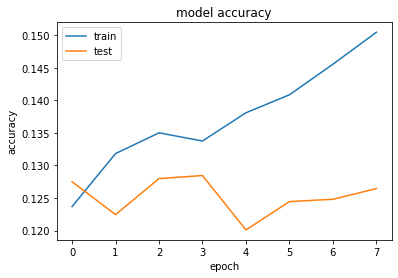

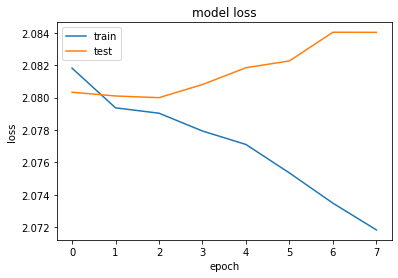

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 3:20

  2/266 [..............................] - ETA: 33s 

  3/266 [..............................] - ETA: 32s

  4/266 [..............................] - ETA: 33s

  5/266 [..............................] - ETA: 33s

  6/266 [..............................] - ETA: 33s

  7/266 [..............................] - ETA: 33s

  8/266 [..............................] - ETA: 32s

  9/266 [>.............................] - ETA: 33s

 10/266 [>.............................] - ETA: 33s

 11/266 [>.............................] - ETA: 33s

 12/266 [>.............................] - ETA: 34s

 13/266 [>.............................] - ETA: 34s

 14/266 [>.............................] - ETA: 35s

 15/266 [>.............................] - ETA: 35s

 16/266 [>.............................] - ETA: 36s

 17/266 [>.............................] - ETA: 36s

 18/266 [=>............................] - ETA: 36s

 19/266 [=>............................] - ETA: 36s

 20/266 [=>............................] - ETA: 36s

 21/266 [=>............................] - ETA: 36s

 22/266 [=>............................] - ETA: 36s

 23/266 [=>............................] - ETA: 36s

 24/266 [=>............................] - ETA: 36s

 25/266 [=>............................] - ETA: 36s

 26/266 [=>............................] - ETA: 36s

 27/266 [==>...........................] - ETA: 35s

 28/266 [==>...........................] - ETA: 35s

 29/266 [==>...........................] - ETA: 35s

 30/266 [==>...........................] - ETA: 35s

 31/266 [==>...........................] - ETA: 34s

 32/266 [==>...........................] - ETA: 34s

 33/266 [==>...........................] - ETA: 34s

 34/266 [==>...........................] - ETA: 34s

 35/266 [==>...........................] - ETA: 33s

 36/266 [===>..........................] - ETA: 33s

 37/266 [===>..........................] - ETA: 33s

 38/266 [===>..........................] - ETA: 33s

 39/266 [===>..........................] - ETA: 33s

 40/266 [===>..........................] - ETA: 32s

 41/266 [===>..........................] - ETA: 32s

 42/266 [===>..........................] - ETA: 32s

 43/266 [===>..........................] - ETA: 32s

 44/266 [===>..........................] - ETA: 32s

 45/266 [====>.........................] - ETA: 32s

 46/266 [====>.........................] - ETA: 32s

 47/266 [====>.........................] - ETA: 32s

 48/266 [====>.........................] - ETA: 32s

 49/266 [====>.........................] - ETA: 32s

 50/266 [====>.........................] - ETA: 32s

 51/266 [====>.........................] - ETA: 32s

 52/266 [====>.........................] - ETA: 32s

 53/266 [====>.........................] - ETA: 32s

 54/266 [=====>........................] - ETA: 32s

 55/266 [=====>........................] - ETA: 32s

 56/266 [=====>........................] - ETA: 32s

 57/266 [=====>........................] - ETA: 32s

 58/266 [=====>........................] - ETA: 32s

 59/266 [=====>........................] - ETA: 31s

 60/266 [=====>........................] - ETA: 31s

 61/266 [=====>........................] - ETA: 31s

 62/266 [=====>........................] - ETA: 31s

 63/266 [======>.......................] - ETA: 31s

 64/266 [======>.......................] - ETA: 31s

 65/266 [======>.......................] - ETA: 30s

 66/266 [======>.......................] - ETA: 30s

 67/266 [======>.......................] - ETA: 30s

 68/266 [======>.......................] - ETA: 30s

 69/266 [======>.......................] - ETA: 30s

 70/266 [======>.......................] - ETA: 29s

 71/266 [=======>......................] - ETA: 29s

 72/266 [=======>......................] - ETA: 29s

 73/266 [=======>......................] - ETA: 29s

 74/266 [=======>......................] - ETA: 29s

 75/266 [=======>......................] - ETA: 29s

 76/266 [=======>......................] - ETA: 28s

 77/266 [=======>......................] - ETA: 28s

 78/266 [=======>......................] - ETA: 28s

 79/266 [=======>......................] - ETA: 28s

 80/266 [========>.....................] - ETA: 28s

 81/266 [========>.....................] - ETA: 28s

 82/266 [========>.....................] - ETA: 27s

 83/266 [========>.....................] - ETA: 27s

 84/266 [========>.....................] - ETA: 27s

 85/266 [========>.....................] - ETA: 27s

 86/266 [========>.....................] - ETA: 27s

 87/266 [========>.....................] - ETA: 27s

 88/266 [========>.....................] - ETA: 26s

 89/266 [=========>....................] - ETA: 26s

 90/266 [=========>....................] - ETA: 26s

 91/266 [=========>....................] - ETA: 26s

 92/266 [=========>....................] - ETA: 26s

 93/266 [=========>....................] - ETA: 26s

 94/266 [=========>....................] - ETA: 25s

 95/266 [=========>....................] - ETA: 25s

 96/266 [=========>....................] - ETA: 25s

 97/266 [=========>....................] - ETA: 25s

 98/266 [==========>...................] - ETA: 25s

 99/266 [==========>...................] - ETA: 25s

100/266 [==========>...................] - ETA: 24s

101/266 [==========>...................] - ETA: 24s

102/266 [==========>...................] - ETA: 24s

103/266 [==========>...................] - ETA: 24s

104/266 [==========>...................] - ETA: 24s

105/266 [==========>...................] - ETA: 24s

106/266 [==========>...................] - ETA: 23s

107/266 [===========>..................] - ETA: 23s

108/266 [===========>..................] - ETA: 23s

109/266 [===========>..................] - ETA: 23s

110/266 [===========>..................] - ETA: 23s

111/266 [===========>..................] - ETA: 23s

112/266 [===========>..................] - ETA: 23s

113/266 [===========>..................] - ETA: 22s

114/266 [===========>..................] - ETA: 22s

115/266 [===========>..................] - ETA: 22s

116/266 [============>.................] - ETA: 22s

117/266 [============>.................] - ETA: 22s

118/266 [============>.................] - ETA: 22s

119/266 [============>.................] - ETA: 21s

120/266 [============>.................] - ETA: 21s

121/266 [============>.................] - ETA: 21s

122/266 [============>.................] - ETA: 21s

123/266 [============>.................] - ETA: 21s

124/266 [============>.................] - ETA: 21s

125/266 [=============>................] - ETA: 21s

126/266 [=============>................] - ETA: 20s

127/266 [=============>................] - ETA: 20s

128/266 [=============>................] - ETA: 20s

129/266 [=============>................] - ETA: 20s

130/266 [=============>................] - ETA: 20s

131/266 [=============>................] - ETA: 20s

132/266 [=============>................] - ETA: 20s

133/266 [==============>...............] - ETA: 19s

134/266 [==============>...............] - ETA: 19s

135/266 [==============>...............] - ETA: 19s

136/266 [==============>...............] - ETA: 19s

137/266 [==============>...............] - ETA: 19s

138/266 [==============>...............] - ETA: 19s

139/266 [==============>...............] - ETA: 18s

140/266 [==============>...............] - ETA: 18s

141/266 [==============>...............] - ETA: 18s

142/266 [===============>..............] - ETA: 18s

143/266 [===============>..............] - ETA: 18s

144/266 [===============>..............] - ETA: 18s

145/266 [===============>..............] - ETA: 18s

146/266 [===============>..............] - ETA: 17s

147/266 [===============>..............] - ETA: 17s

148/266 [===============>..............] - ETA: 17s

149/266 [===============>..............] - ETA: 17s

150/266 [===============>..............] - ETA: 17s

151/266 [================>.............] - ETA: 17s

152/266 [================>.............] - ETA: 17s

153/266 [================>.............] - ETA: 16s

154/266 [================>.............] - ETA: 16s

155/266 [================>.............] - ETA: 16s

156/266 [================>.............] - ETA: 16s

157/266 [================>.............] - ETA: 16s

158/266 [================>.............] - ETA: 16s

159/266 [================>.............] - ETA: 15s

160/266 [=================>............] - ETA: 15s

161/266 [=================>............] - ETA: 15s

162/266 [=================>............] - ETA: 15s

163/266 [=================>............] - ETA: 15s

164/266 [=================>............] - ETA: 15s

165/266 [=================>............] - ETA: 15s

166/266 [=================>............] - ETA: 14s

167/266 [=================>............] - ETA: 14s

168/266 [=================>............] - ETA: 14s

169/266 [==================>...........] - ETA: 14s

170/266 [==================>...........] - ETA: 14s

171/266 [==================>...........] - ETA: 14s

172/266 [==================>...........] - ETA: 14s

173/266 [==================>...........] - ETA: 13s

174/266 [==================>...........] - ETA: 13s

175/266 [==================>...........] - ETA: 13s

176/266 [==================>...........] - ETA: 13s

177/266 [==================>...........] - ETA: 13s

178/266 [===================>..........] - ETA: 13s

179/266 [===================>..........] - ETA: 12s

180/266 [===================>..........] - ETA: 12s

181/266 [===================>..........] - ETA: 12s

182/266 [===================>..........] - ETA: 12s

183/266 [===================>..........] - ETA: 12s

184/266 [===================>..........] - ETA: 12s

185/266 [===================>..........] - ETA: 12s

186/266 [===================>..........] - ETA: 11s

187/266 [====================>.........] - ETA: 11s

188/266 [====================>.........] - ETA: 11s

189/266 [====================>.........] - ETA: 11s

190/266 [====================>.........] - ETA: 11s

191/266 [====================>.........] - ETA: 11s

192/266 [====================>.........] - ETA: 11s

193/266 [====================>.........] - ETA: 10s

194/266 [====================>.........] - ETA: 10s

195/266 [====================>.........] - ETA: 10s

196/266 [=====================>........] - ETA: 10s

197/266 [=====================>........] - ETA: 10s

198/266 [=====================>........] - ETA: 10s

199/266 [=====================>........] - ETA: 10s

200/266 [=====================>........] - ETA: 9s 

201/266 [=====================>........] - ETA: 9s

202/266 [=====================>........] - ETA: 9s

203/266 [=====================>........] - ETA: 9s

204/266 [======================>.......] - ETA: 9s

205/266 [======================>.......] - ETA: 9s

206/266 [======================>.......] - ETA: 9s

207/266 [======================>.......] - ETA: 8s

208/266 [======================>.......] - ETA: 8s

209/266 [======================>.......] - ETA: 8s

210/266 [======================>.......] - ETA: 8s

211/266 [======================>.......] - ETA: 8s

212/266 [======================>.......] - ETA: 8s

213/266 [=======================>......] - ETA: 7s

214/266 [=======================>......] - ETA: 7s

215/266 [=======================>......] - ETA: 7s

216/266 [=======================>......] - ETA: 7s

217/266 [=======================>......] - ETA: 7s

218/266 [=======================>......] - ETA: 7s

219/266 [=======================>......] - ETA: 7s

220/266 [=======================>......] - ETA: 6s

221/266 [=======================>......] - ETA: 6s

222/266 [========================>.....] - ETA: 6s

223/266 [========================>.....] - ETA: 6s

224/266 [========================>.....] - ETA: 6s

225/266 [========================>.....] - ETA: 6s

226/266 [========================>.....] - ETA: 6s

227/266 [========================>.....] - ETA: 5s

228/266 [========================>.....] - ETA: 5s

229/266 [========================>.....] - ETA: 5s

230/266 [========================>.....] - ETA: 5s

231/266 [=========================>....] - ETA: 5s

232/266 [=========================>....] - ETA: 5s

233/266 [=========================>....] - ETA: 4s

234/266 [=========================>....] - ETA: 4s

235/266 [=========================>....] - ETA: 4s

236/266 [=========================>....] - ETA: 4s

237/266 [=========================>....] - ETA: 4s

238/266 [=========================>....] - ETA: 4s

239/266 [=========================>....] - ETA: 4s

240/266 [==========================>...] - ETA: 3s

241/266 [==========================>...] - ETA: 3s

242/266 [==========================>...] - ETA: 3s

243/266 [==========================>...] - ETA: 3s

244/266 [==========================>...] - ETA: 3s

245/266 [==========================>...] - ETA: 3s

246/266 [==========================>...] - ETA: 3s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 2s

249/266 [===========================>..] - ETA: 2s

250/266 [===========================>..] - ETA: 2s

251/266 [===========================>..] - ETA: 2s

252/266 [===========================>..] - ETA: 2s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 1s

258/266 [============================>.] - ETA: 1s

259/266 [============================>.] - ETA: 1s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 41s 151ms/step


In [27]:
# predictions_cards = get_card_from_encoding(predictions)
# true_cards = get_card_from_encoding(test_y)

# compute_statistics(predictions_cards,true_cards)